# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:

# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\---Rohit---\anaconda3\lib\site-packages\fileupload\static -> fileupload
Making directory: C:\Users\---Rohit---\AppData\Roaming\jupyter\nbextensions\fileupload\
Copying: C:\Users\---Rohit---\anaconda3\lib\site-packages\fileupload\static\extension.js -> C:\Users\---Rohit---\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Copying: C:\Users\---Rohit---\anaconda3\lib\site-packages\fileupload\static\widget.js -> C:\Users\---Rohit---\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Making directory: C:\Users\---Rohit---\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload
Copying: C:\Users\---Rohit---\anaconda3\lib\site-packages\fileupload\static\fileupload\widget.js -> C:\Users\---Rohit---\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabli

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    file_contents2 = ""
    for index, char in enumerate(file_contents):
        if char.isalpha() == True or char.isspace():
            file_contents2 += char

    file_contents2 = file_contents2.split()
    file_without_uninteresting_words = []
    
    for word in file_contents2:
        if word.lower() not in uninteresting_words and word.isalpha() == True:
            file_without_uninteresting_words.append(word)
            
    frequencies = {}
    
    for word in file_without_uninteresting_words:
        if word.lower() not in frequencies:
            frequencies[word.lower()] = 1
        else:
            frequencies[word.lower()] += 1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()


If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

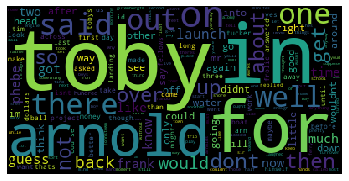

In [4]:
# Display your wordcloud image
file_contents = '''The Project Gutenberg EBook of Keeping His Course, by Ralph Henry Barbour

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using this ebook.

Title: Keeping His Course

Author: Ralph Henry Barbour

Illustrator: Walt Louderback

Release Date: May 5, 2020 [EBook #62027]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK KEEPING HIS COURSE ***




Produced by Donald Cummings and the Online Distributed
Proofreading Team at https://www.pgdp.net







                          KEEPING HIS COURSE




By Ralph Henry Barbour


PURPLE PENNANT SERIES

  The Lucky Seventh
  The Secret Play
  The Purple Pennant


YARDLEY HALL SERIES

  Forward Pass
  Double Play
  Winning His Y
  For Yardley
  Around the End
  Change Signals


HILTON SERIES

  The Half-back
  For the Honor of the School
  Captain of the Crew


ERSKINE SERIES

  Behind the Line
  Weatherby’s Inning
  On Your Mark


THE “BIG FOUR” SERIES

  Four in Camp
  Four Afoot
  Four Afloat


THE GRAFTON SERIES

  Rivals for the Team
  Winning His Game
  Hitting the Line


BOOKS NOT IN SERIES

  Keeping His Course
  The Brother of a Hero
  Finkler’s Field
  Danforth Plays the Game
  Benton’s Venture
  The Junior Trophy
  The New Boy at Hilltop
  The Spirit of the School
  The Arrival of Jimpson


D. APPLETON AND COMPANY, Publishers, New York




[Illustration: “Hold on! Isn’t that a sort of a light over there?”]




                                KEEPING
                              HIS COURSE

                                  BY
                          RALPH HENRY BARBOUR

                               AUTHOR OF
                “HITTING THE LINE,” “WINNING HIS GAME,”
                      “RIVALS FOR THE TEAM,” ETC.


                            [Illustration]


                            ILLUSTRATED BY
                            WALT LOUDERBACK


                         D. APPLETON & COMPANY
                         NEW YORK      LONDON
                                  1918




                          Copyright, 1918, by
                        D. APPLETON AND COMPANY

                          Copyright, 1916, by
                 The Commercial Advertiser Association


                Printed in the United States of America




CONTENTS


 CHAPTER                                    PAGE
     I. TOBY RESENTS AN INSULT                 1
    II. THE _Turnover_                        13
   III. ARNOLD PAYS HIS DEBTS                 26
    IV. FRIENDS AFLOAT                        36
     V. SHOTS IN THE DARK                     49
    VI. PURSUIT AND CAPTURE                   62
   VII. THE STOLEN LAUNCH                     75
  VIII. THE HIDDEN NAME                       88
    IX. “THREE HUNDRED DOLLARS REWARD!”      100
     X. TOBY BLOCKS THE PLATE                112
    XI. TOBY MAKES UP HIS MIND               125
   XII. “T. TUCKER, PROP.”                   143
  XIII. TRICK FOR TRICK                      155
   XIV. TOBY IS DOWNHEARTED                  170
    XV. PHEBE CHRISTENS THE KNOCKABOUT       181
   XVI. LOST IN THE FOG                      193
  XVII. THE LIGHTED WINDOW                   206
 XVIII. MR. TUCKER CONSENTS                  220
   XIX. TOBY ACCEPTS A CHALLENGE             230
    XX. A CLOSE CALL                         243
   XXI. THE DISTRESS SIGNAL                  261
  XXII. INTO PORT                            273




LIST OF ILLUSTRATIONS


 “Hold on! Isn’t that a sort of a light over there?”     _Frontispiece_

                                                           FACING PAGE

 “We’ve gained like anything, Arn!”                                 66

 Toby pegged hard to Tim                                           122

 He consumed a large piece of apple pie                            254




KEEPING HIS COURSE




CHAPTER I

TOBY RESENTS AN INSULT


A boy with light blue eyes that just about matched the slightly hazy
June sky sat on the float below the town landing at Greenhaven, L. I.,
and stared thoughtfully across harbor and bay to where, two miles
northward, the village of Johnstown stretched along the farther shore.
He had a round, healthy, and deeply tanned face of which a short nose,
many freckles, the aforementioned blue eyes, and a somewhat square chin
were prominent features. There was, of course, a mouth, as well, and
that, too, was prominent just now, for it was puckered with the little
tune that the boy was softly whistling. Under a sailor’s hat of white
canvas the hair was brown, but a brown that only escaped being red by
the narrowest of margins. That fact was a sore subject with Toby Tucker.

Perhaps had his hair been really and truly red, beyond all question, he
wouldn’t have minded being called “Ginger” and “Carrots” and “Sorrel
Top” and “Red Head” and all the other names frequently――but usually
from a safe distance――bestowed on him. Perhaps it was the injustice of
it that hurt. That as may be, a hint that Toby’s hair was red――or even
reddish――was equivalent to a declaration of war, and entailed similar
consequences! He wore, besides the duck hat, a sailor’s jacket of like
material, a pair of khaki trousers, and brown canvas “sneakers.” You
wouldn’t have called him “smartly dressed,” perhaps, but what he wore
seemed to suit him and was, at least, clean.

From where he sat, perched on a box labeled “Sunny South Brand
Tomatoes,” he had a clear view of Spanish Harbor, and beyond its mouth
a wide expanse of Great Peconic Bay. Beyond that again lay the green
fields and low, wooded hills of the north shore. A coal barge, which
had lately discharged her cargo at Rollinson’s Wharf, was anchored in
the middle channel, awaiting a tug. Nearer at hand were a half-dozen
pleasure sailboats, a blunt-nosed, drab-hued fishing sloop, and a
black launch, all tugging gently at their moorings on the incoming
tide. On either side of the float a little company of rowboats and
small launches rubbed sides. Behind him, the rusted iron wheels of the
gangplank, leading to the wharf above, creaked as the float swung to
the rising water.



“Grab her!” responded the boy in the launch. “Fend her off!”

Toby grunted. Then there was a crash, the float bobbed and shivered,
and the white launch, finding further progress barred, rebounded from
the obstacle in her path, and, leaving much fresh white paint on the
canvas fender, churned merrily backward. Simultaneously two boys, one
on the float and one in the launch, scrambled to their feet again and
broke into speech.

“Hey, you boob!” yelled Toby. “Look where you’re going! You’ll have her
stern into that dory in a minute. Shut off your engine!”

“Why didn’t you grab her?” demanded the boy in the launch angrily.
“Couldn’t you see she was going to hit?”

“I’d look nice trying to stop her, wouldn’t I?” countered Toby
contemptuously. “Why don’t you learn to run a launch before you come
around here destroying property? What were you trying to do, anyhow?
Climb the gangplank in her?”

“I couldn’t come in any way but straight on, could I? Look at all those
boats along the sides! Why don’t they give a fellow a chance to get up
here?”

“Well, you’re not expected to make your landing at sixty miles an hour,
you silly lubber. Here, hold that out and I’ll pull you in.”

Somewhat disgruntled, the amateur navigator proffered the end of the
boat-hook and in a jiffy the _Frolic_ was alongside. Toby returned
to his seat on the box and watched the other make fast. Conscious of
Toby’s ironical regard, the skipper of the _Frolic_ was flustered and
awkward, and twice got the line tangled around his feet. When he stood
up from his task, he was red of face and out of temper. “That suit your
highness?” he inquired.

Toby grinned. “Well, it ain’t customary in these parts to make a boat
fast with a square knot, but I guess she’ll hold.”

“You think you’re smart, don’t you?” sneered the other.

Toby made no reply to that, merely smiling in a most exasperating
manner. Presently, when the skipper of the _Frolic_ had laboriously
shoved the launch out of the way, he looked questioningly about the
landing.

“Where can I get gasoline?” he asked more affably.

Toby was maddeningly deliberate. “Gasoline?”

“Yes.”

“How much do you want?”

“What’s that got to do with it?” demanded the other impatiently.

“Well, if you want as much as ten gallons it would pay me to get it for
you.”

“I can get it myself if you’ll tell me where they keep it. Don’t they
have it here at this landing? Isn’t this the town landing?”

“Yes.” Toby looked around the float. “I don’t see any gasoline, though;
do you?”

“Well, then, where――――”

“You can get all you want at Tucker’s wharf over there.”

The other followed the direction of Toby’s pointing finger. “At the
boat yard you mean?”

Toby nodded. “Yes; just chug over there to the float where you see the
red tank.”

“Why couldn’t you tell me that before I tied up?”

“You didn’t ask me.” The other grunted and set about casting off again,
during which operation Toby studied him speculatively.

He saw a boy of perhaps a year his senior, and Toby was fifteen,
fairly tall, slim, and undeniably good looking. He had brown eyes
and brown hair, the latter slicked back in a way that was strange
and awe-inspiring to the observer, and his face, with its straight
nose and somewhat pointed chin, lacked the healthy coat of tan that
Toby’s possessed. Yes, he was a good looking chap, Toby decided, but a
most unpleasant and unlikable one. That fact, however, was not going
to prevent Toby from making a sale, and when the visitor had sprung
aboard, Toby glanced doubtfully at his box of groceries, swept the
harbor without seeing anything that looked like the tender from the
_Penguin_, and jumped lightly to the _Frolic_.

“I’ll go over with you and get it,” he said. “Where’s your boat-hook?
All right. Start her up!”

The other viewed him doubtfully. “What have you got to do with it?” he
asked, suspiciously.

“That’s my father’s wharf, and he’s busy up in the shed. If it’s
gasoline you want, I’m your man. Take her across easy now.”

The engine started at half-speed, and the _Frolic_ slid quietly away
from the town landing, past the end of the coal wharf, and across
the Cove to the boat-yard landing. This time the launch’s operator
performed his task more creditably and nestled up against the small
float with no more damage to her paint. While he made her fast Toby
sprang out and ran up the gangplank to the big red tank at the end of
the wharf.

“How much do you want?” he called back.

“About nine, I guess. My tank holds ten, and I think there’s almost a
gallon in it.”

“All right.” Toby held a five-gallon can under the faucet and when it
was full climbed down again and swung it to the bow of the launch.
“Look out for the paint,” requested the other boy. “Wait till I get the
funnel. Go ahead now.”

Toby poured the contents of the can into the tank and returned again to
the wharf. When the final four gallons had been added he set the can
back on the float and observed: “One ninety-eight, please.”

“One ninety―――― Say, how much do you charge a gallon?” exclaimed the
other, incredulously.

“Twenty-two cents. This is the best there is.”

“Twenty-two! Why, I only paid twenty in New York the other day!”

“You were lucky,” drawled Toby. “It’s twenty-two here. What you got
was low-grade, I guess.”

“Well, I don’t intend to pay any twenty-two cents. I’ll pay just what I
paid in New York. Here’s two dollars, and I want twenty cents change.”

Toby, hands in pockets, paid no heed to the proffered bill. Instead
he looked speculatively at the little round hole through which the
gasoline had disappeared. “It’s going to be hard to get it out of
there,” he mused. “Maybe we can do it with a pump, though.”

“Get it out? What for? Look here, twenty cents is enough and――――”

“Not when the price is twenty-two,” replied Toby decidedly. “We charge
the same as everywhere else here. You’d have paid twenty-two at the
town landing just the same.”

“At the town landing! You said they didn’t keep it there!”

“No, sir, I didn’t. I said I didn’t see any.” Toby grinned. “And I
didn’t, either. You can’t, from the float.”

“You’re a smart guy, aren’t you?” said the other angrily. “You make me
come away over here and then try to hold me up! Well, you can’t do it!
You fork over twenty cents and you’ll get this two dollars, you――you
red-headed cheat!”

Toby’s grin faded instantly. “What did you call me?” he asked very
quietly after a moment’s silence.

“You heard it! Now you find twenty cents and――――”

They were standing on the canvas-covered deck at the bow, a precarious
place at the best, with the launch rolling a bit, and not at all the
sort of place the _Frolic’s_ skipper would have selected for battle had
he been allowed a choice. But he wasn’t, for his naughty remarks were
rudely interrupted, rudely and unexpectedly! With something between a
grunt and a snarl, Toby threw himself upon him.

“Take it back!” he panted. “’Tain’t red, and you know it!”

The older boy gave way before the sudden assault, tried to wrest his
arms free from Toby’s grip, failed at that, and, bringing his greater
weight to bear, forced the other back across the tiny decking. They
struggled and panted, only the rubber soles they wore keeping them from
going overboard.

“Let me alone, you silly ass!” grunted the older youth. “We’ll both be
in the water in a second.”

“Take it back, then!” panted Toby. “’Tain’t red, is it?”

“Yes, it is! It’s red as――as fire!” He wrenched an arm free and struck
out angrily. The blow missed, and Toby caught at the arm, trying now
to trip his opponent up. But the law of gravity cannot be trifled with
forever, and what was bound to happen sooner or later happened right
then. Toby’s leg worked behind the other; he bore back and――over they
went, still tightly clasped together, with a splash that awoke the
echoes of the Cove!




CHAPTER II

THE _Turnover_


They came up separately, Toby first. Fortunately for the boy of the
launch, a good eight feet separated him from Toby at the moment of
his emergence, for Toby was by no means satisfied and proved it by an
earnest endeavor to reach his adversary before the latter could splash
and flounder his way around the bow of the launch and throw himself,
breathless and half-drowned, across the edge of the float. From that
position he squirmed not an instant too soon and half-leaped and
half-fell across the gunwale of the launch and seized the boat-hook.

“Now, you wild idiot,” he gasped, “you keep away from me!”

Toby viewed the situation, pulled himself to the float and grinned.
“All right,” he said. “You got the best of it now, but it ain’t red,
and I’ll make you say so sooner or later. Now you pay what you owe me.”

An expression of blank dismay came to the other’s face, and he gazed
anxiously about deck and water. “I dropped it! You made me do it, too!
Now you find it!”

Toby shrugged. “I guess it’s at the bottom now. Let me look.”

“You stay where you are,” commanded the other, threatening again with
his weapon.

“I won’t do anything――honest,” assured Toby. “Not now, that is. Put
that thing down and let me see if I can see your money.”

In a moment the two were leaning over the side of the launch and
peering into the water. But the surface was ruffled and it was
impossible to see much below it. “When did you let go of it?” inquired
Toby.

“How do I know? When you grabbed me, I suppose.”

“Haven’t you got any more money with you?”

“No, I haven’t, and if I had I wouldn’t give it to you,” was the
ungracious reply. Toby considered. Finally:

“Well, I’ll take half the blame,” he decided, “but that’s all. You pay
me ninety-nine cents and we’ll call it square.”

“That’s twenty-two cents a gallon, though.”

Toby nodded. “Sure. That’s the price.”

After a moment’s consideration the other consented. “But you’ll have
to trust me for it,” he said. “That two dollars was all I had.”

“All right. What’s your name?”

“Deering, Arnold Deering. I live on the Head.”

“Spanish Head? Whose house have you got?”

“We live in our own house. It’s called ‘Cedarcroft,’ and it’s the big
one right at the end――――”

“Oh, the new one that was built last winter? All right. Arnold Deering,
eh? I’ll remember. You’re the fellow who owes me ninety-nine cents――and
an apology.”

“You’ll get the ninety-nine cents, all right; I’ll bring it over
tomorrow. But you’ll have to whistle for any apology from me!”

“I can whistle,” answered Toby undisturbedly.

“You’ll have to!” Arnold was having difficulty with the knot he had
tied. Toby looked on quizzically.

“Those square knots――――” he began.

“Oh, shut up!” Arnold finally cast loose and climbed aboard. “You get
off now.”

“I was thinking maybe you’d drop me at the town landing,” replied Toby
calmly. “I’ve got a box of groceries over there.”

“Well, all right, but you’ll have to jump. I don’t intend to stop for
you.”

“Sure. Reverse her when you start and back out. Put your wheel hard
over and――――”

“Say,” inquired Arnold belligerently, “who’s running this thing?”

“You are. How long have you had her?”

“About a week.”

“She’s a nice boat. If I was you I’d learn to run her. Don’t do a boat
any good to ram her into things.”

“Is that so? I’ll bet I can run a launch as well as you can, you――――”

“Careful!” warned Toby.

“You fresh kid!”

“All right. Look out for the coal wharf. Mr. Rollinson would be awfully
mad if you carried away the end of it! Just slow her up and I’ll jump
for it.”

“I hope you fall in,” said the other vindictively. Toby laughed.

“I wouldn’t be much wetter if I did! All right now. Thanks!” He made a
flying leap over the four feet of water between launch and float and
landed safely. Simultaneously Arnold twirled the wheel and the _Frolic_
pointed her nose down the harbor and chugged indignantly away. Not,
however, until Toby had sent a gentle reminder floating after her.

“_Frolic_, ahoy!” he shouted.

Arnold turned an inquiring head.

“Don’t forget that ninety-nine cents! And remember I’m still whistling!”

There was no reply, and Toby, seating himself on the box, chuckled
wickedly and resumed his onerous task.

Toby’s father wasn’t nearly as amused as Toby had expected him to be
when he was told the incident of the last two-dollar bill at dinner
that day. Mr. Tucker was a tall, stooped man of forty-odd years, with
faded blue eyes in a weather-tanned face. The Tuckers had been boat
builders for three generations, and Mr. Aaron Tucker’s skin seemed to
have borrowed the hue from the mahogany that for so many years past
had been sawed and shaped and planed and sandpapered in the big shed
across the harbor road. In the old days Tucker’s Boat Yard had turned
out good-sized fishing and pleasure craft, but business had fallen away
in the last dozen years, and now small launches and sloops and rowboats
constituted the output. And, at that, business was far from brisk.
Perhaps Mr. Tucker had the fact in mind when he inquired dryly who was
to pay for that other four and a half gallons of gasoline.

“I guess I’ll have to,” said Toby, ruefully.

“I calculate you will,” agreed his father.

“At the wholesale price, though,” added the boy hastily; and Mr.
Tucker’s eyes twinkled as he nodded.

But if the story won small appreciation from his father, there was
one, at least, at the dinner table who enjoyed it, and that was Toby’s
sister, Phebe. Phebe Tucker was thirteen, a slim, pretty girl with
hair that Toby called “yaller” and Phebe’s mother termed golden. She
had very bright, brown eyes under long lashes and a skin that, even
though nearly as brown as Toby’s, was clear and smooth. There were no
other children and so Toby and his sister had always been very close
companions, a fact which probably accounted for a somewhat boyish
quality in Phebe. She could sail a boat nearly as well as Toby, catch
quite as many fish, was no mean hand at the oars, and could perform
almost as many “stunts” in the water as he could. She asked no favors
and was always ready for adventure――a jolly, companionable girl with a
wealth of spirits, and good nature and good health.

Neither of the children resembled their mother in looks, for Mrs.
Tucker was small, with dark hair and eyes, and comfortably stout. Her
children called her “roly-poly,” a descriptive term which Mrs. Tucker
pretended to resent. For the rest, she was a quiet, kind-hearted little
woman, who worshiped her big husband and her children, and whose main
ambition was to see that they were happy.

Saturday afternoon was always a holiday for Toby and Phebe, and after
dinner was over they went out to the front steps and pondered what to
do. The cottage was a neat, white-clapboarded little house, perched on
a slope above the harbor road. From the gate a flight of six wooden
steps led to a tiny bricked walk which ran the length of the cottage.

A wistaria vine, venerable with age, was in full bloom at one side of
the doorway, while between house and walk narrow beds held a wealth of
old-fashioned flowers. From the steps one looked across the cobbled,
winding harbor road, tree-shaded in summer, to the boat yard with its
weather-beaten shed and its old stone wharf, and beyond that to the
little harbor and to the nestling village houses on the other side.

“We might go out in the launch,” suggested Toby, “only I’d have to fix
the wiring first.”

“Would it take long?” asked his sister.

“I guess not. I couldn’t find the trouble yesterday, though. We might
take a run around to Shinnecock if I can get her started.”

“Let’s,” said Phebe. “It’s too beautiful a day to stay ashore. You go
ahead and see if you can’t fix it and I’ll be right along.”

So Toby crossed the road, passed around the further side of the big
shed, from which came the tap-tap of hammers and the buzz of the
bandsaw, climbed down a slippery ladder and dropped into the launch.

Toby had made most of that boat himself. It wasn’t as grand as the
_Frolic_ and it boasted little bright work and no gilt. But, in spite
of its name, it was at once safe, roomy and fast. Its name――you had to
look on the stern to find it――was _Turnover_. In lowering the engine
into it the summer before Toby’s assistant had lost control of the
rope, with the result that the engine, at that instant poised over the
gunwale, had descended very hurriedly. The boat, probably resenting
the indignity, had promptly turned its keel to the sky and dumped the
engine to the bottom of the slip in six feet of water. The boat hadn’t
actually turned over, for having got rid of the engine and shipped a
good deal of water it had righted itself very nicely, but Toby had
dubbed it _Turnover_ there and then.

The _Turnover_ was sixteen feet long, with a four-and-a-half-foot
beam, had a two-cylinder engine――purchased second-hand but really as
good as new――capable of sending the launch through the water at a
good twelve-mile gait, and was painted a rather depressing shade of
gray. Toby favored that color not so much for its attractiveness as
because it didn’t show dirt, and it must be owned that the _Turnover_
was seldom immaculate, inside or out. But she suited Toby down to the
ground――or perhaps I should say down to the water――and I doubt if any
one else could have made her go as he did. The _Turnover_ had her own
eccentricities and it was necessary to humor her.

Toby began operations by pushing his duck hat to the back of his head
and reflectively scratching the front of it, a trick caught from his
father. Then, having decided on a plan of action, he set to work.
Before he had discovered the trouble and remedied it, with the aid of
an odd bit of insulated copper wire pulled from a locker, Phebe was
swinging her feet from the edge of the wharf and watching. Experience
had taught her the advisability of keeping out of the way until the
work was done. At last, wiping a perspiring face in a bunch of greasy
waste, Toby threw the switch on and turned the fly-wheel over.

A heartening chug-chug rewarded him, and, tossing the tools back in
the locker, he unscrewed the cap of the gasoline tank, plunged a stick
into it, examined the result, did some mental calculation, and at last
declared himself ready to start. Phebe lowered herself nimbly down
the ladder and seated herself at the wheel while Toby cast off the
lines from the bow and stern. The _Turnover_ backed out of the little
slip rather noisily, swung her pert nose toward the harbor mouth, and
presently was sliding past the moored craft at a fine clip. Once around
the point the breeze met them and the _Turnover_ began to nod to the
quartering waves. Toby slathered oil here and there, gave her more gas,
and seated himself across from his sister.

“She’s going fine,” he said. “I guess we could make Robins Island if we
wanted to.”

“That’s too far, Toby. I’d rather go to Shinnecock.”

“All right. It’s going to be dandy after we get around the Head.
There’s a peach of a swell, isn’t there?”

The launch dipped her way past Nobbs Island, with its squatty
lighthouse, and Phebe turned the launch toward the Head.

“There’s the place that fellow lives,” said Toby, nodding at a fine
new stone-and-shingle house on the point. “The fellow I had the scrap
with, I mean.”

“It’s a lovely house,” said Phebe. “I suppose they have lots of money,
don’t you?”

“Slathers, I guess. He’s a pill. Can’t run that launch any more than
Mr. Murphy can.” (Mr. Murphy was Phebe’s parrot, and, while he had been
through some nautical experiences, he was naturally no navigator!) “He
didn’t do a thing to her paint when he bumped into the float.” Toby
chuckled. “And wasn’t he peeved with me!”

“I guess you were horribly superior and nasty,” said Phebe. “You can
be, you know.”

“Oh, well, I hate fellows to put on a lot of airs just because their
folks have money,” grumbled Toby. “The way he talked to me, you’d have
thought I was a hunk of dirt.”

“Was he nice looking?” asked Phebe.

“Oh, I suppose you’d call him that. Sort of a pretty boy, with his hair
all slicked back like it was varnished. It didn’t look so fine when he
came out of the water, though!”

“That was a horrid thing to do, Toby.” But she smiled as she said it.

“I didn’t do it, sis. He stumbled――sort of――and went over backwards,
and I went with him. You ought to have seen the way he scrambled out
of there when he saw me coming after him! Say, we might run in to their
landing and collect that ninety-nine cents, eh?”

“Indeed, we aren’t going to do anything of the kind!” replied Phebe
severely, and Toby laughed.

“I was just fooling. He’ll pay it, all right. And he’ll apologize for
calling me red-headed, too.”

“I don’t see why you mind that so much,” said Phebe. “I think red hair
is lovely. I wish mine was red, like Nellie Rollinson’s.”

“I don’t. I think it’s awful.”

“Why, Toby, you said once you thought Nellie’s hair was very pretty!”

“Maybe it is, on her. It wouldn’t be on you, though. And I don’t want
any of it, thanks. Take her in a little closer to shore. It’s flood
tide.”

The _Turnover_ was remarkably well behaved today and they ran into the
canal long before two o’clock, and, at Phebe’s suggestion, disembarked
and walked over to the hills and, finally, to the south shore. The
summer season was well begun and there was plenty to see and to
interest them. They had ice cream sodas at a little shop and wandered
back to the launch about three. Instead of making straight home, Toby,
who claimed the wheel now, headed the _Turnover_ toward the middle
of the bay, and, with a nice breeze blowing Phebe’s hair about her
face and enough of a chop to set the launch advancing merrily in the
sunlight, they spent the next hour in running leisurely across to the
north shore and back. It was when the _Turnover_ was pointed homeward
again, about four, that Phebe, curled up in the bow, called Toby’s
attention to a small launch a mile or so distant and some two miles off
Spanish Head.

“They are either fishing or have broken down. I’ve been watching them
for some time.”

“There aren’t any fish there,” replied Toby, viewing the distant
launch. “Guess their engine’s gone back on them. They’ve got their
anchor over. We’ll soon find out.”

“They’re waving at us, I think,” said Phebe a minute later. “Look,
Toby.”

“That’s right.” Toby waved his hat in reply and sent the _Turnover_
along faster. “I wonder what launch that is,” he added as the distance
lessened. “She looks a bit like――――” his voice dwindled. Then he
laughed, and: “That’s just who she is!” he cried gayly. “That’s the
_Frolic_, sis! And, unless I’m much mistaken, that’s Pretty Boy
waving!”




CHAPTER III

ARNOLD PAYS HIS DEBTS


Toby was not mistaken, for presently the _Turnover_ was close enough to
the disabled white launch for him to identify one of her two passengers
as Arnold Deering. Who the other boy was Toby didn’t know, nor did he
much care. He slipped the clutch into neutral and let the _Turnover_
run down alongside the _Frolic_. As he did so he vastly enjoyed the
expression of surprise and annoyance that came into Arnold’s face when
the latter recognized him.

“Hello,” said Toby as the boats bobbed side by side. “Want some more
gasoline?”

“Hello,” answered Arnold gruffly. “This silly engine’s out of whack. We
can’t start her. If you’ll give us a tow I’ll pay you for it.”

Toby considered a moment, or appeared to. Then, as the _Turnover_ was
floating past, he threw in the clutch again and circled around to the
other side. At last: “I don’t know about towing,” he said doubtfully.
“The _Frolic’s_ pretty heavy for us, I guess. I might send some one
out to you when I get in.”

Phebe uttered a low-voiced protest. “Don’t be horrid, Toby,” she said.
“Of course we can tow them.”

But the boys in the white launch didn’t hear that, and Arnold looked
dismayed. “But, look here, whatever-your-name-is――――”

“Well, you said it was Red-head this morning,” replied Toby carelessly.

Arnold flushed. “We’ve been here since half-past two, and we want to
get home. I’ve a rope here, and if you’ll tow us in I’ll give you a
dollar.”

The second occupant of the _Frolic_, an older and bigger boy with dark
hair and eyes and a somewhat sulky expression, chimed in impatiently.
“We’ll give him two dollars. I’ll pay half. I’ve got to get back by
five o’clock, Arn.”

“All right then, two,” amended Arnold anxiously. “Get that half-inch
rope out of the stern locker, Frank, will you?”

“Oh, I’d do it for a dollar,” said Toby, “or I might do it for nothing
at all. It isn’t that.” He ruminated again and again chugged the
_Turnover_ into position. “Tell you what I will do,” he continued then.
“I’ll come aboard and see if I can start her for you.”

“What’s the good of that?” demanded Frank. “We’ve been trying for
nearly two hours. And we want to get in.”

“Maybe I might think of something you haven’t,” answered Toby.

“All right, come ahead,” said Arnold.

Toby slid the _Turnover_ close to the other launch and shut off the
engine. “You hold her, Phebe,” he instructed. Then: “This is my sister,
Phebe,” he added by way of introduction. “Phebe, this is Arnold
Deering. You remember I spoke of him this noon,” he added innocently.

Arnold colored as he murmured a response and then introduced Frank
Lamson. Phebe nodded shyly and Toby clambered aboard the _Frolic_. The
two boys then followed him as he tested the engine by throwing the
spark on and turning the wheel a few times. There was no response from
the cylinders and Toby disconnected the wires from the spark-plugs and
grounded them against the engine one at a time. He got sparks from
three of the four, and, after he had cleaned the fourth plug, from all
of them. An examination of the carbureter followed leisurely, Toby
whistling softly all the time. Presently he followed the gasoline
supply pipe back from engine to tank, having to raise the locker covers
to do so, and at last, snapping the door of the forward locker shut
again, he faced Arnold with a satisfied nod.

“Got it,” he said.

“Really? What was the trouble?” asked the _Frolic’s_ skipper.

“Nothing much. I can fix it in a minute.”

“Go ahead, then,” said Frank Lamson, with a scowl. “We’re in a hurry, I
tell you.”

Toby observed him ruminatively for a moment, and then turned his gaze
to Arnold. “I’m still whistling, you see,” he said, and to prove it
went on with his tune.

“Don’t be a fool,” begged Arnold. “If you can fix it――――”

“Won’t take me a minute――after I get started,” was the untroubled
reply. Toby reached up and took off his hat. “You might just take
another look at my hair,” he continued pleasantly. “When the sun isn’t
on it’s quite a bit darker, I think.”

“Toby!” exclaimed Phebe, in a shocked voice.

Arnold flushed and stammered. “What’s that got to do with it?” he
asked. Frank Lamson looked bewildered.

“Well,” said Toby, “I thought maybe you’d like to see if you weren’t
mistaken about the color of my hair.”

Arnold looked at Frank and at Phebe, and finally at Toby’s gently
smiling countenance and swallowed hard. Finally: “Well, it isn’t as red
as I thought it was,” he muttered. “I suppose the sun being on it――――”

“Sure! But just you take another look; take a good hard one now. Sort
of brown, isn’t it?”

Arnold hesitated, cast a fleeting glance at the exposed hair, and
grinned in a sickly way. “I guess that’s so,” he allowed. “I――I’d say
it was quite brown.”

“Not the least bit red, eh?”

Arnold shook his head: “Not a bit.”

“And, seeing you were mistaken this morning, maybe you’d like to sort
of apologize,” suggested Toby. Phebe was observing Arnold with an
expression that seemed to convey to him an apology for her brother’s
conduct, and perhaps her look helped him over his embarrassment. At
all events, when Frank Lamson, puzzled and resentful, broke in with:
“What’s the fuss about? Who cares whether his hair’s brown or――――”
Arnold interrupted quickly.

“Whoa, Frank! This chap’s right.” He laughed good humoredly. “I take it
back, Tucker, and apologize. You’re all right! And――and you can stop
whistling!”

Toby smiled sunnily and clapped his hat on his head. “Now we’ll start
her,” he said. He went back to the forward locker in which the gasoline
tank was located, thrust in a hand, withdrew it, closed the door again
and returned to the engine. “Now try her,” he said.

Arnold did so and the engine woke promptly to life.

“What was it?” he demanded, surprise and admiration struggling for
supremacy in his face.

Toby laughed. “I’ll tell you so it won’t be likely to happen again,” he
replied. “You’ve got a globe cock on your gasoline supply pipe where it
leaves the tank. Usually that shut-off is down here by the engine, and
I don’t know why they put it there. But they did, and when you pulled
your anchor out of your bow locker you managed to get your cable fouled
with the cock and turned it almost square off. You weren’t getting any
gasoline, Deering.”

“But I tried the carbureter twice and it flooded!”

“Of course it did, because there was gasoline in the pipe. The cock
wasn’t quite closed, and enough kept running into the pipe to show in
the carbureter, but not to explode in the cylinders. If I were you I’d
take a piece of zinc and turn it over that cock; make a sort of hood
of it, you know, so your line won’t get twisted in it.”

“I didn’t know there was any shut-off there,” grumbled Frank Lamson,
“or I’d have looked at it.”

“There’s always one somewhere on the pipe,” replied Toby dryly. “Well,
you’re all right now, I guess, eh?”

“Yes, thanks,” said Arnold gratefully. “And, by the way, Tucker――――” He
pulled a dollar bill from his coin purse and held it out with a smile.
“I guess I’ll pay my debt.”

Toby gravely fished up a penny and the transfer was made.

“I don’t know,” continued Arnold doubtfully, “but what I’d ought to pay
for all that gas.” He made a motion toward his pocket again, but Toby
waved the idea aside.

“No, we settled that,” he said. “I don’t mind paying half. It was worth
it!”

Arnold laughed. Then: “But, hold on! How about this job?” he exclaimed.
“Better let me pay you something for it. I’d rather.”

“Oh, shucks, that’s all right. We don’t charge for helping friends
out of trouble around here,” answered Toby as he climbed back to the
_Turnover_. “So long!”

“Well, I’m awfully much obliged,” responded Arnold, and his thanks
seemed to include Phebe as well. “Good-by.” He took off his cap,
something which his companion neglected to do, and waved a farewell
as the _Turnover_ moved away. Frank Lamson only nodded, but, as the
_Turnover_ circled around toward the harbor, he called across the
water: “Say, we’ll race you back!”

But Toby shook his head. “I’m not in racing trim today,” he called
back. “Some other time!”

The _Frolic_ passed them presently, doing a good ten miles against the
turning tide, and Arnold, standing at the wheel in the bow, waved once
more.

“You ought to have been ashamed, Toby,” said his sister severely, “to
act like that!”

“Act like what?” inquired the boy innocently.

“You know perfectly well.”

“Oh, that! Why, you see, sis, I knew he’d made a mistake, and I knew
he’d want to――to correct it. So I just gave him a chance.”

“But to refuse to fix the engine until he’d apologized!”

“I didn’t refuse. I’d have fixed it if he hadn’t. That was just a
bluff――and it worked!” Toby chuckled. “What did you think of him?”

“I thought he was very――very nice,” replied Phebe, after a moment.

“He isn’t so bad, I guess,” agreed Toby carelessly. “Some one ought to
show him how to run that boat, though.”

“And he is very good looking, too,” added Phebe.

Toby grinned. “You wait till you see me with my hair slicked down flat
with vaseline, sis!”

“Vaseline! The idea! His hair is just naturally shiny.”

“Must be. Anyway, you’ve taken a shine to it! Wonder where he picked up
that Lantern chap?”

“Lamson, it was.”

“Lamson, then. He’s a surly beggar.” Toby frowned. “He came mighty near
getting into trouble, too. He almost said my hair was red. If Deering
hadn’t stopped him just when he did――――”

“Toby, you’re too silly for words about the color of your hair. You
know very well that it is――well, reddish, and I don’t see why you don’t
make up your mind to it.”

“You’ve got a pimple on the end of your nose, but――――”

“Toby! I haven’t!” Phebe investigated agitatedly. “It’s just the
tiniest bit of a one, then. Does it show much?”

“Well, you couldn’t see it across the harbor,” was the unfeeling reply.
“Anyhow, it’s there, and I’ll bet you wouldn’t want folks to tell you
about it. Well, it’s like that with my hair, sis. I know it’s sort of
reddish――in the sunlight, maybe――but I don’t care to have fellows say
so. When they do they either have to fight or apologize.”

“I don’t see how fighting proves anything,” objected Phebe.

“It doesn’t prove anything, no, but it sort of makes you forget the
insult! Here we are. Take the wheel and I’ll fend her off. I hope
there’s something good for supper!”




CHAPTER IV

FRIENDS AFLOAT


Toby saw no more of Arnold for a week, for school kept him busy, but
Mr. Tucker reported that the _Frolic_ had twice been to the wharf for
gasoline and that on each occasion her skipper had inquired for him.
School came to end for the summer that Friday and Toby brought his
books home to his little slanting-walled room with a sigh of relief.
He didn’t mind studying, for he wanted to learn things, but since the
really warm weather had set in, lessons had been a task indeed. One
thing, though, that he could congratulate himself on was that he was
now through grammar school and next fall would start in at high school
over at Johnstown. As long as the weather would allow it, he meant to
make the trip back and forth in the _Turnover_, a matter of three miles
from landing to landing.

When the ice came he would have to walk to Riverport, a good two miles,
and take the train there for Johnstown, and that wouldn’t be quite
so pleasant. Toby’s ambition, though it was as yet not very strong,
was to some day take hold of Tucker’s Boat Yard and make it as big
and busy and successful as it once had been. But Toby’s father didn’t
give him much encouragement. Boat-building at Greenhaven, he declared
pessimistically, had had its day. Launches had taken the place of
honest sailboats, and there were too many launch-makers in that part of
the world. There was no money in it any longer; just a living, and a
bare one at that. Toby thought he knew better, but he didn’t argue it.
There was time enough yet.

In another four years, when he had learned all they had to teach him at
the Johnstown High School, and he was very, very wise, perhaps he would
take hold of the business and show his father that there was still
money to be made in it. Of course, Toby had not figured out just how he
was to do it. There was time enough for that, too!

He and Arnold had their next meeting Saturday morning, a week almost to
the minute after their first. Toby had taken some provisions around to
a houseboat moored in Nobbs Bay, on the other side of Spanish Harbor,
and was chugging lazily back in the _Turnover_, when from across the
water a faint hail reached him. A quarter of a mile away a figure stood
on the new steel pier that extended into the bay at the end of Spanish
Head, and Toby, shading his eyes, recognized Arnold Deering. Since
his errand had been accomplished and there was no more work in sight
just then, he turned the launch toward the landing and was soon within
talking distance. The _Frolic_ was lying beside the float there, in
company with a cedar skiff, and a brilliantly blue canoe rested, keel
up, on the planks.

“Hello, Tucker!” called Arnold in friendly fashion. “Where are you
going?”

“Nowhere much. I took some grub to that houseboat in there. Going out
in the launch?” Toby slid the _Turnover_ up to the end of the float and
Arnold came down the sloping gangplank.

“I don’t know. Maybe I will.” He held the _Turnover_ to the landing
with one rubber-soled shoe on the gunwale. “Say, I met your father the
other day.”

“He told me.”

“He’s awfully nice, isn’t he?”

Toby considered. Finally: “Yes,” he said. “He takes after me.”

Arnold laughed. “Say, you must have thought I was an awful fresh chump
the other day,” he said apologetically. “I’m sorry I was so peevish.”
He smiled reminiscently. “Fact is, you know, I was mad because I’d made
such a mess of that landing.”

“I guess we were both sort of fresh,” answered Toby. “Want to go out in
a good boat?”

“Yes.” Arnold leaped aboard. “Your father said you’d made this
yourself.”

“Most of it. I made the hull, but dad and Long Tim――he works for
dad――helped me a lot with the lockers and so on.”

“I should think you’d be mighty proud of it,” said the other
admiringly. “I would. How did you happen to call her the _Turnover_?”

Toby explained as he started off, and Arnold laughed appreciatively.
“That would be a better name for my canoe,” he said. “She turned over
with me the other day about a half-mile out there and I had to swim all
the way in with her. There’s too much chop around here for canoeing.”

“Which way do you want to go?” asked Toby. “Ever been over to
Johnstown?”

“No, Frank and I started for there last Saturday, the day we broke
down.”

“How did you happen to stop the launch out there, anyway? Were you
going to fish?”

Arnold nodded. “Yes, Frank said there’d be cod there. Then after we’d
got the anchor over we found we’d forgotten to bring any bait.”

“Cod!” laughed Toby. “I guess a sea robin or a sculpin would have been
about all you’d have caught. Who is this fellow Lamson?”

“He lives on the other side over there. He goes to school where I do.”

“Do you like him?”

“Like him?” Arnold had to consider that. “N-no, not a lot, I guess. Do
you?”

“Not so far. He looks all the time as if he’d swallowed something that
didn’t agree with him. And he pretty nearly said I had red hair!”

“Say, I’m sorry I said anything about――about your hair,” said Arnold
contritely. “It was beastly rude.”

“Well, I’m sort of touchy about that,” replied Toby. “Of course my hair
is――er――I mean when you look at it a certain way it does seem a little
bit inclined to be reddish. It isn’t really red, you know, but it――it
has a sort of tinge! Lots of fellows make mistakes about it. The first
year I was in grammar school I was all the time――er――showing fellows
how mistaken they were.”

“The same way you showed me?” inquired Arnold slyly.

Toby nodded, and smiled gently. “About like that. Of course, I don’t
mind a joke, you know. Folks I like can call me red-headed all they
want to. But I don’t seem to care for it from strangers.”

“I see. I won’t ever say anything like that again,” Arnold assured him.

Toby gazed intently toward the island sliding past them to port. “I
wouldn’t care if you did――now,” he murmured. “If I like a fellow”――his
voice dwindled off into silence.

“All the more reason I shouldn’t,” said Arnold. “If I like a fellow I
don’t want to hurt his feelings.”

“No, but――when you like a fellow you don’t mind what he says,” returned
Toby. His eyes sought Arnold’s face for an instant and then returned to
the island. “You can call me Red-head if you want to. I wouldn’t care.”

“I guess I’d rather call you by your real name,” laughed Arnold. “I
would if I was sure of it. Is it Toby?”

“Yes. Funny sort of a name, isn’t it? Tobias it is when it’s all there.
Dad got it out of the Bible. All the male Tuckers have Bible names.
Dad’s is Aaron. When he was a kid the boys used to call him ‘Big A,
little a, r, o, n!’ His father’s name was Jephthah; Captain Jeph, they
called him. I’m glad they didn’t tag me with that name!”

“I think Toby’s a rather jolly name,” said Arnold reflectively. “I like
it better than Arnold.”

“I don’t. Arnold’s got a lot of style to it; sounds like it was out of
a story. What do the fellows at school call you?”

“Arn, usually. Say, this boat can travel, can’t she? How fast is she
going?”

“About ten, I guess; maybe eleven.” Toby advanced the throttle as far
as it would go, listened and pushed it back a little. “She misses if I
give her too much gas.”

“Seems to me she goes faster than the _Frolic_.”

“She’s smaller and you’re nearer the water. That makes her seem to go
faster. There’s the landing ahead. Want to go in?”

“No, let’s just knock around, unless you’ve got something to do.”

“I haven’t as long as I stay away from home,” replied Toby dryly. “Say,
what school do you go to in winter?”

“Yardley Hall.”

“Where’s that?”

“Wissining, Connecticut.” Arnold waved a hand vaguely toward the west.
“Over there on the other side of the Sound. Ever hear of it?”

Toby shook his head. “I don’t know much about schools. It’s a boarding
school, isn’t it?”

“Yes, and it’s a dandy. I wish you could see it. Where do you go, Toby?”

“Me? Next year I’m going to high school here at Johnstown. You can
almost see the building. It’s about a mile up from the landing there,
near where you see that white steeple. I’d rather go to a boarding
school, though. It must be lots of fun. What do you do?”

So for the next half-hour, while the _Turnover_, slowed down to a
four-mile gait, rocked and swayed over the sunlit waters of the bay,
Arnold recited the glories of Yardley Hall School and told of football
and baseball and hockey battles and of jolly times in hall. Perhaps
Arnold drew rather a one-sided picture of life at Yardley, omitting
mention of such things as study and discipline and the periodical
examinations, but that was only natural, for he was proud of Yardley
and wanted to make it as alluring as possible. Toby listened intently,
questioning now and then, because many of Arnold’s references were
quite unintelligible to him, and, when Arnold had reached the end of
his subject, sighed wistfully.

“My, wouldn’t I like that!” he exclaimed. “Are the other fellows nice?
I suppose they’re mostly all swells like you, aren’t they?”

“I’m not a ‘swell,’ thank you! There are all sorts of fellows at
Yardley, though. I guess the kind you call ‘swells’ are pretty few.
Lots of them are just poor fellows――――”

“Like me,” interpolated Toby.

“I didn’t mean that!”

“Oh, I don’t mind. I am poor, you know. I mean dad is. We used to have
a little money, when the boat yard was more――more flourishing, but
nowadays we just sort of scrape along. That’s why I couldn’t go to
boarding school. It would cost too much money. I’d like to, though.
Say, wouldn’t I just!” Toby’s face lighted. Then he laughed. “I guess
it wouldn’t do, though, because I’d have to fight half the school for
calling me red-headed!”

“You’d have your hands full then. We’ve got about three hundred
fellows.”

Toby shook his head sadly. “I wouldn’t last, then, would I? The only
thing I could do would be to dye my hair black. Do you have to study
very hard?”

“Yes, we do,” answered Arnold, frankly. “Especially in fourth and third
classes.”

“What’s your class?”

“I’ll be in third next year. Last year was my first. Say, wouldn’t it
be great if you could get your father to let you come to Yardley?”

“Yes, it would be dandy,” answered Toby, smiling wryly. “And I can see
him doing it! How much does it cost, anyway? Say it slow, will you, so
it won’t sound so much?”

“Well, the tuition’s only a hundred――――”

“Is that all?” asked Toby carelessly. “Would they take a check for it?
Go ahead. What else do you have to pay for?”

“Room and board, of course. That costs from two hundred to three
hundred and fifty, according to your room.”

“Well, I’d want a nice room, of course; one with a southern exposure
and hard and soft water. How much would I have to pay for storing my
automobile?”

“Don’t be an idiot,” laughed Arnold. “That isn’t an awful lot of money,
is it?”

“No, indeed! Oh, no! But I suppose there’d be extras, wouldn’t there?
Maybe I’d have to tip the principal and the teachers, eh?”

“You’d have to pay five dollars a year as an athletic assessment, and
pay for your washing and your books. Books don’t cost much. You can get
second-hand ones usually if you want to.”

“I guess not!” exclaimed Toby indignantly. “Nothing cheap for Tobias
Tucker! Well, I’ll figure it up and think it over. But say, honest now,
do all boarding schools cost like this one of yours?”

“I don’t know, but I guess they’re about the same. Some cost you more,
maybe.”

“Where could I find one of those? I’d hate to get settled at your
school and then find there was a more expensive one! That would pretty
nearly break my heart, it would so! Well, maybe we’d better be getting
back. I suppose you’ve got to polish your diamonds yet.”

“Shut up,” said Arnold, shortly. “If you talk like that I’ll――I’ll call
you ‘Carrots’!”

“Better not,” chuckled Toby. “The last time you did it it cost you two
dollars! Calling me names is expensive!”

“What are you going to do until lunch time?” asked the other, as Toby
headed back toward the Deerings’ landing.

“Me? Oh, I guess I’ll go back to Perkins & Howe’s and see if they’ve
got any more jobs. I made a half-dollar taking that stuff to the
houseboat.” He pulled the coin from his pocket and exhibited it. Arnold
observed it interestedly.

“I suppose,” he said thoughtfully, “a half-dollar seems a lot bigger if
you make it yourself.”

“Oh, I didn’t make this,” said Toby innocently. “I just earned it. It’s
a regular half-dollar.” He flipped it in the air to let it fall on
the seat beside him in proof of his assertion, and it did just as he
intended it should, up to the point when it struck against the wood.
After that it acted most inconsiderately, for, having landed on its
edge, it flew up again and described a graceful curve over the gunwale.

“Grab it!” yelled Arnold. Toby made a frantic clutch for it, but his
hand closed emptily and the coin disappeared into the green water of
Great Peconic Bay!

There was a moment of deep silence during which the occupants of the
launch gazed at each other in surprised consternation. Then:

“I’m awfully sorry,” murmured Arnold.

A slow smile spread over Toby’s face. “So am I,” he replied,
cheerfully. “But that’s what I get for being foolish. I mean that’s
what I don’t get. Well, maybe I earned it too easily, anyhow. I guess
a quarter would have been enough for that job. It puts me back fifty
cents, though, toward getting to Yardley Hall, doesn’t it?”

“Look here,” began Arnold shyly, “I wish you’d let me――――” His hand
moved tentatively toward his pocket. “It was partly my fault,
anyway――――”

“Yes, you rocked the boat,” answered Toby gravely. Then he broke into
a hearty laugh. “Say, Arnold, you and I will have this old bay just
choked up with money if we keep on! They’ll have to begin and dredge
it first thing we know. There’s two and a half already, and here it is
only the first of July!”




CHAPTER V

SHOTS IN THE DARK


That was the beginning of a fine friendship. Toby and Arnold became
well-nigh inseparable. They spent hours and hours together in the
_Frolic_ or the _Turnover_, swam, fished, canoed occasionally, explored
by land and sea, and spent much time curled up in a favorite corner of
the boat-yard building glorious plans for the future. Sometimes Phebe
was their companion, and sometimes, though less frequently, Frank
Lamson. Toby put up with Frank for Arnold’s sake, but never got to like
him. For his part, Frank failed to see why Arnold wanted to associate
with a fellow whose father worked “like a common laborer” and who
“slopped around in clothes you wouldn’t give to the ashman!”

But Frank’s disapproval didn’t influence Arnold to any great extent,
and Frank soon learned to keep it to himself. He viewed Phebe more
tolerantly because she was pretty and presentable, even if her dresses
would have failed to pass muster over at the Head. But what Frank
thought of her bothered Phebe little, since she liked him no better
than Toby did, although she was a trifle more careful to disguise the
fact.

Once and only once Toby went home with Arnold to luncheon. It happened
that a trip down the bay in the _Turnover_ had taken more time than
they had foreseen, and when the launch floated up to the Deerings’
pier to let Arnold off it was long after Toby’s dinner hour. Toby had
resisted a while against Arnold’s pleading, but he was horribly hungry
and Arnold assured him that what he had on wouldn’t matter a bit, and
finally he had yielded. What had happened was not at all terrifying,
for Arnold’s aunt, who, since the death of the lad’s mother many
years before, had presided over the Deering establishment, was very
gracious indeed to the guest; while Mr. Deering was in New York. And
the wonderful things that were placed before Toby tasted finely and
surely filled an aching void. But for all that he wasn’t comfortable.
He had never seen so many dishes and glasses and forks and knives and
spoons, nor so many servants. Nor had he ever had his table manners put
to so severe a test. Afterwards, although Arnold for a while frequently
extended invitations to luncheon, Toby always found some excuse for
declining. He never gave the real reason, however, although possibly
Arnold guessed it. Eventually Arnold gave it up as a bad job, but that
didn’t keep him from partaking of the Tucker hospitality, and he was a
frequent guest at the dinner table in the little cottage above Harbor
Street. Every one liked Arnold, even Mr. Murphy; and Mr. Murphy was
constitutionally suspicious of strangers.

Mr. Murphy sat on a perch in the corner of the dining-room, by
the window that looked along the winding street, an uncannily
wise-appearing old parrot with a draggled tail and a much-battered
beak. Phebe explained that he used to have a perfectly gorgeous tail,
but that he would insist on pulling the feathers out no matter how
she scolded him. Like most parrots, Mr. Murphy had his periods of
inviolate silence and his periods of invincible loquacity. During the
former all enticements failed to summon even a squawk from him, and
during the latter only banishment to a certain dark closet under the
hall stairs would stop the flow of his eloquence. It wasn’t so much
that the parrot’s repertoire was extensive as that he made the most of
it. Unlike Shakespeare, he repeated! Having spent several years of an
eventful life before the mast, he had learned a number of remarks that
brought embarrassed apologies from Phebe. On the whole, though, and in
view of his early environment, his conversation was remarkably polite.

His usual welcome was “Hello, dearie!” followed by “Won’t you take off
your bonnet?” After that he usually laughed jeeringly, sidled across
his perch, lowered himself and gravely hung by his beak. “All hands,
stand by!” was generally delivered in a peremptory shriek that, at
first, had had a devastating effect on Mrs. Tucker’s nerves. As though
realizing the fact, Mr. Murphy thereupon chuckled wickedly and murmured
softly and crooningly: “Well, well, well! Did you ever?” Phebe had
taught him to say, “Come to breakfast,” and he had grown very partial
to the remark, making use of it at all times of the day with cheerful
disregard for appropriateness. For a while he had made the cat’s life
a burden to her by calling “Kitty, Kitty, Kitty! Come, pretty Kitty!”
and then going into peals of raucous laughter the minute the poor
cat’s head appeared around the door. Arnold won Mr. Murphy’s undying
affection by feeding him pop-corn surreptitiously, pop-corn being an
article of diet strictly forbidden by Phebe. He also spent much time
during the summer trying to induce the bird to say “Arnold,” but it
wasn’t until late in August that Toby, passing the dining-room door one
afternoon, heard Mr. Murphy croaking experimentally in a low voice:
“Say Arnold, you chump!”

Toby still performed odd jobs and picked up an occasional quarter or
half-dollar, but it must be acknowledged that he was far less earnest
in his endeavors to find employment than he had been before Arnold’s
advent on the scene. But he was only fourteen――“going on fifteen,” as
he would have put it――and so it isn’t to be greatly wondered at that
he found his new friend’s companionship more enjoyable than running
errands or delivering groceries in out-of-the-way places for Perkins &
Howe. Mr. Tucker at first viewed Toby’s frivolity with displeasure, but
Mrs. Tucker declared that it would do him more good to play and have a
good time with a nice boy like Arnold Deering than to loiter about Main
Street on the lookout for a job. I think that struck Toby’s father as
being good sense, for he never after that taxed the boy with idleness.
Sometimes Toby had qualms of conscience and for a day or two resisted
all Arnold’s blandishments and gave himself up sternly to commerce.
Frequently at such times Arnold likewise eschewed the life of pleasure
and threw in his lot with that of Toby, and together they sat in the
back room of the grocery store awaiting orders; or canvassed the other
places of business on the chance of finding service. It was at such a
time, seated on boxes by Perkins & Howe’s back entrance, with a strong
odor of spices and coffee and cucumbers enveloping them――it happened
that Arnold was seated on the crate of cucumbers――that the plan of
the baseball series between the town boys and the summer visitors was
evolved. The sight of two youngsters passing a ball on the side street
that ran down to the fish wharf put the idea into Arnold’s head.

“Do you play baseball, Toby?” he asked. Toby nodded. “Well, then, let’s
have a game some time.”

“You and me?” asked Toby, with a grin.

“No, silly! We’ll get up a couple of teams, of course. There are plenty
of fellows on the Head and around there to make up one, and you could
find enough here in town for the other, couldn’t you?”

Toby nodded again. “Most of the fellows on the school team would play,
I guess. What would we do, draw lots?”

“Yes; or we could have it summer visitors against town fellows. How
would that do?”

Toby reflected. “I’d rather play on the team with you, Arn,” he said at
last.

“So would I with you, Toby, but it would be more interesting the other
way, wouldn’t it? Where do you play?”

“Me? Oh, most anywhere. I played third base this spring, and last year
I played center field part of the time, and part of the time I caught.
I’m what you call an all-round player, a sort of general utility man!”

“Fine! I played first on my class team this spring. Let’s do it, eh?
Where could we play?”

“I guess we could use the school most any day except Saturday. Does
Frank play?”

“Yes, he’s a pretty good pitcher. I guess I’d ask him to pitch for us.
Who would you get?”

“Tim Chrystal, probably. He’s about the best we have. I don’t know,
though, if he’d have time. He works for his father, you see. When would
we play?”

“Today’s Wednesday, isn’t it? How about Saturday?”

“We mightn’t be able to get the field Saturday. Besides, it’ll take
me two or three days, I guess, to find a team. Let’s say a week from
today.”

“All right. It’ll be piles of fun. You call your nine the ‘Towners’ and
I’ll call mine the ‘Spaniards.’ Couldn’t you go after your fellows
today?”

Toby hesitated. “Maybe. I guess there isn’t anything to do here. I
might start after dinner.”

“Good! And I’ll beat it around the Head this afternoon and see who I
can get hold of. There are two or three fellows I don’t know very well,
but that doesn’t matter, I guess. I wish your folks had a telephone so
that I could call you up this evening and see how you’d got along.”

“Dad says telephones waste too much time. Why don’t you come over in
the launch? It’s moonlight now.”

“I suppose I could,” replied Arnold doubtfully. “I’ve never run her at
night, though.”

“Better begin, then. It’s no harder than running in daylight. Easier, I
guess, because there aren’t so many boats about. Come over about eight
and I’ll meet you at the town landing. It’ll be low tide at our pier,
and you might get aground, seeing you don’t know the cove very well.”

They talked it over further during the next half-hour, and then, as it
was dinner time, they abandoned the search for labor and went their
ways. Toby wanted Arnold to have dinner with him, but the latter was
so filled with his new scheme that he insisted on chugging back to
the Head so he might start right out after luncheon on his quest for
baseball talent. They parted with the understanding that Arnold was to
be at the town landing about eight, and that they were to meet there
and report progress.

The moon was up, a big silver half-disk, when Toby reached the float
at a few minutes before eight, and the harbor was almost as light
as day. He had to wait some time for the _Frolic_, and, when it did
appear, heralded by tiny red and green lights, it was moving slowly and
cautiously. Presently Arnold’s hail floated across the water and Toby
answered.

“All clear at the end of the float, Arn! Come on straight in!”

“All right, but it’s pretty dark where you are. How far away am I?”

“Oh, nearly a hundred yards, I guess. Pull her out and float in. Can
you see those boats at the moorings?”

“Yes; but I can’t see the float yet. They ought to have a light there.”
The chug-chug of the _Frolic_ exhaust lessened, and the white launch
slid silently into the shadows. Presently:

“Way enough,” called Toby. “Reverse her a couple of turns, Arn.”

In a moment the _Frolic_ thrust her bow into Toby’s waiting hands, and
he fended her off and brought her side-to. “Want to tie up?” he asked.
“Or shall we run around awhile?”

“If you’ll take her,” replied Arnold. “I don’t like this moonlight
business. It’s awfully confusing after you get into the harbor.”

“All right. Swing your wheel over hard and I’ll push her off. That’s
the ticket.” Toby sprang aboard and took the wheel from Arnold and the
launch set off again. Once outside the harbor, with the engine throttle
down until it made almost no sound, the two boys compared notes.

“I’ve got seven fellows,” Arnold reported, “and I know where I can get
four more. Frank will pitch for us and a chap named Dodson is going to
catch. Frank says he’s a dandy. All I need now is a good shortstop and
another fielder. All the fellows,” he added ruefully, “want to play the
bases――or pitch. It’s funny how many of them are wonderful pitchers,
when they tell it! How did you get on?”

“Me? Not very well. Tim Chrystal has promised to pitch if he doesn’t
have to do any practicing, and I got three other fellows to promise
to play. The trouble is, you see, most of them are older than I am
and they don’t like the idea of my being captain. Tim said he thought
Billy Conners ought to be. What do you think?”

“Nothing doing! You’re getting up the team, and you’re captain, of
course. If they don’t like it, get some one else.”

“Yes, but there aren’t so awfully many, you see. I’ve still got to find
five or six more. There’s Tony George, but he has to be at the fruit
stand.”

“At the what?” asked Arnold.

“Fruit stand. His father’s the Italian man who has the stand next to
Chapin’s drug store. He’s a mighty good third baseman, too, Tony is,
and I wish he could play.”

“Looks like this was going to be a sort of international affair,”
laughed Arnold. “Americans, Spaniards, and an Italian!”

“And my second baseman’s a Portuguese, Manuel Sousa. He’s pretty good,
too. How old will your fellows be?”

“They’ll average about sixteen, I guess. Dodson must be seventeen, but
most of them are about my age. I hope you can find the rest of the
fellows you need, Toby.”

“I guess I can. I wish they didn’t all want to be captain, though. I
don’t mind not being, but they can’t all have it.”

“You’re going to be captain,” replied Arnold, decisively. “If you
aren’t we won’t play you. You can tell them that, too.”

Toby sighed. “All right. I’ll stick out for it. I guess lots of the
others would do it better, though. You see, Billy Conners captained our
school team, and――――”

Toby stopped abruptly, and the two boys turned their heads and stared
startledly across the moonlit water of Nobbs’ Bay.

“What was that?” asked Toby.

“Sounded like a shot, didn’t it? Over that way. There!”

Two tiny yellow flashes of light pricked the darkness of the further
shore, followed by as many sharp reports, and then, more faintly, a
shout. Instinctively Toby swung the launch shoreward.

“Some one on that houseboat, I guess,” he said. “Probably shooting at a
bottle or something in the water. That’s about where she’s moored.”

“Anyway, it was a pistol, all right,” murmured Arnold. They listened,
but heard no more shots, and Toby was straightening the _Frolic_ out
again for the run around the Head when the sound of a muffled exhaust
reached them. Toby looked intently into the shadows of the Head.

“That’s funny,” he muttered. “There’s a launch just kiting along over
there and not a light showing. Can you make her out, Arn? She’s about
half-way to the Head, from the sound.”

But nothing was visible in the darkness there. Only the throb of an
exhaust reached them. And then, startlingly loud, came a cry across the
bay:

“Thieves! Thieves! Stop them!”

Some one on the houseboat had seen the _Frolic’s_ lights and was
shouting through a megaphone. And at that moment a shadow seemed to
detach itself from the shore and slip away into the moonlight beyond
the point. The cry from the houseboat was repeated.

“What shall we do?” cried Toby.

“Go after them!” Arnold jumped toward the throttle and pulled it
down, and the _Frolic_, responding instantly, leaped forward as Toby
unhesitatingly swung the wheel over.




CHAPTER VI

PURSUIT AND CAPTURE


“I don’t believe we can catch them,” Toby muttered, his eyes on the
tiny dark spot half a mile away. “And if we do we’ll probably get
filled with bullets.”

“Who do you suppose they are?” asked Arnold, excitedly. Toby shook his
head.

“I don’t know, but that launch of theirs can certainly go. What can the
_Frolic_ do at her best, Arn?”

“Twelve, or a little better. How fast are they going?”

“Can’t tell. Not more than that, I guess. She’s smaller than this, and
sits pretty low. Built for speed, I’d say. I wonder if they really
swiped anything.”

“They must have tried to, anyway. Where’s that oil can?” Arnold found
it and doused the engine liberally. Not being able to see very well,
he took no chances, and oiled everything at hand and turned down the
grease-cups.

“She’s changed her mind,” exclaimed Toby, “and is going down around the
Head. How much gas have you got?”

“The tank’s almost three-quarters full.”

“How far will that take us?”

“’Most a hundred miles, I guess. She eats it pretty fast at this pace,
but seven gallons――――”

“Well, we’re not going any hundred miles,” responded Toby, “and I don’t
believe those fellows mean to, either. They’ll either make for the
canal and get out into Shinnecock Bay, or they’ll run straight along
toward Shelter Island.”

“Are we gaining any?” asked Arnold, anxiously.

“I don’t think so. It’s hard to tell. I guess they’re not going to try
the canal. If they were they’d be turning by now. Maybe they think they
can shake us off.”

“Then they’ll have to go some,” said Arnold. “Where is she?”

“Dead ahead. See that black spot?”

For a moment Arnold failed to detect the fleeing launch, and when he
did he uttered a grunt of disappointment. “We’re certainly not gaining,
Toby. She looks further away than she did.”

“Yes, but she’s stern-to. I don’t think we’ve lost any.” They were well
past the Head now, and Nobbs Island Light was falling away to port.
“What I’m wondering,” continued Toby, “is what we’re to do if we should
catch her!”

Arnold had no answer ready, and Toby went on: “There’s probably at
least a couple of men in that launch, and they’ve got pistols――――”

“How do you know?” demanded Arnold.

“We heard them.”

“I don’t think so. The shots we heard were aimed away from the
houseboat, Toby. If they hadn’t been we wouldn’t have seen the flashes.
I guess it was the folks on the houseboat who did the firing.”

“That’s so. Still, it’s mighty likely that there’s a pistol on that
launch, just the same, even if they didn’t use it. And we haven’t any;
and wouldn’t know what to do with it if we had. So what are we to do
when we catch them?”

“They won’t know who we are or how many there are of us,” replied
Arnold. “And they won’t know that we haven’t plenty of revolvers,
either. We’ll bluff them!”

Toby chuckled. “I’d rather have something to back up my bluff, I guess.
I’m game if you are, though, Arn. Besides, I dare say we needn’t
trouble about what’s to happen when we get them, for I don’t believe
we’re going to.”

“Have they gained any?”

“No,” replied the other decisively. “They may not be any closer, but
I’m certain they haven’t gained on us. There are the lights from
Shinnecock over there. We’ve done about six miles since we left the
landing.”

The fleeing launch was headed straight for the passage between the
southerly point of Robins Island and Cow Neck, and was now about
half-way between Spanish Head and the mile-wide passage. The lights
of Shinnecock lay three miles off to the southeast. The throb of the
scurrying _Frolic_ alone broke the silence of the moonlit night for
several minutes, and then Toby, his gaze fixed on the launch ahead,
uttered an exclamation of satisfaction.

“I’m not sure, Arn,” he said, “but I think we’re closing up a little.
Doesn’t she look nearer than she did?”

Arnold agreed and once more seized his oil can. A cruising launch sped
past them a quarter-mile to the north, her port light glowing wanly
in the moonlight. Toby’s eyes scarcely left the dark spot ahead and
presently he said, with conviction: “We’re overhauling her fast now,
Arn! You’d better get that bluff in working order, I guess.”

“I――I’ll get the megaphone ready,” muttered Arnold. “Then we can talk
to them from a safe distance.”

“The safer the better,” agreed Toby. “I wouldn’t mind if we could talk
to them by wireless. What does it feel like to get a bullet in you,
Arn?”

“Don’t be a chump,” begged Arnold. “Just keep your head down and they
can’t hit you.”

“I’m going to,” answered the other dryly. “I’m thinking about putting
it in the gasoline tank. Hello!”

The launch ahead lengthened slightly in the uncertain light.

“She’s making in toward North Sea Harbor,” muttered Toby. “Now what’s
the idea, I wonder. She can’t belong there. Maybe she’s just bluffing,
though. No, she isn’t! She’s headed right in! And we’ve gained like
anything, Arn! She sees that, I guess, and is going to quit――or make a
fight for it! Call all hands, Arn, to man the guns!”

[Illustration: “We’ve gained like anything, Arn!”]

Robins Island was off the _Frolic’s_ port bow now, but instead of
holding her course in the middle of the channel, the other launch had
edged in toward the shore and was presently running straight along it,
as though bent on dodging through the narrow harbor entrance a mile
or so beyond the point. There was no longer any doubt about it:
the _Frolic_ was gaining on the enemy hand over hand. Her engine was
working like a charm, with never a skip, and for the past forty-five
minutes had churned the water at better than a twelve-mile clip.
Arnold, the megaphone in one hand and the oil can in the other, watched
breathlessly. There were no shadows here to hide the launch ahead and
the two boys exulted as the distance lessened between pursued and
pursuer.

“Now, if she’s making for the harbor she’ll have to turn,” muttered
Toby, straining his gaze. “There she goes!” There was a doubtful moment
and then: “She’s headed out again. She missed it, Arn! See, there it
is over there. I’ll bet those fellows don’t know this shore at all.
Now, she’ll have to keep on, for there’s nothing beyond except a cove
until we get to Noyack! And we’ll get them inside of ten minutes! Do
you know what I think? I think they’re short of gas, Arn. You know they
started out as if they meant to cut straight across to Johnstown or
Franklinville or some place over there. That would have been only two
or three miles. Instead we’ve chased them a good ten miles, and they’re
getting short of gas. There! She’s hitting it up a bit again! Go it,
Sal! But we’ll get you long before you reach Jessup’s Neck. Only――only
when we do what are we going to do with you?”

“I wish my father was here,” murmured Arnold, “with his revolver!”

“So do I! You don’t think we’d better turn around and beat it back
before they get to popping at us, do you?”

Arnold hesitated. It seemed very much as though he wanted to say “Yes,”
but he didn’t. Instead, he took a good deep breath and answered: “I’d
rather see it through, Toby, if you aren’t scared.”

Toby laughed shortly. “Oh, I’m scared, all right, but I’m with you,
Arn. It would be a shame to come all this way and use up all that gas
and then turn tail. No, we’ll try that bluff of yours, Arn. If we have
to run we can do it. She’s slowing down again, isn’t she?”

She was, very perceptibly. More than that, she had turned her nose
straight for the shore!

“But there’s no water there!” exclaimed Toby.

“They’re going to run her aground and escape!” cried Arnold.

“Perhaps; but I guess we’ll slow down a little. I don’t want to get too
near.”

Arnold throttled the _Frolic_ down to half-speed. The other launch
worked cautiously in toward the shore and floated quietly in the
moonlight. It was easy enough now to make her out and to count her
occupants.

“Three of them,” whispered Toby, as the _Frolic_ drew nearer and
nearer. “Get your megaphone, Arn, and hail them. Keep down, though.
Slide her into neutral and be ready to start up again if they try to
plug us.”

Some three hundred feet of water separated the two launches as Arnold
threw the clutch out. The _Frolic_ slid slowly on to pass well astern
of the other craft and Arnold raised the megaphone to his lips.

“Launch, ahoy!” he shouted in his deepest tones. There was silence for
an instant, and then the hail was answered:

“Hello! What do you want?” floated across.

“We want the stuff you stole from the houseboat. Hand it over and we’ll
let you go. If you don’t, we’ll begin to fire!”

Another silence, longer this time, and then the voice again:

“Who are you, anyway?”

“Never mind,” answered Arnold sternly. “There are six of us here and
we’ve got you all covered.”

“We don’t know what you’re talking about.” It was another voice this
time, a deeper one. “You start shooting and you’ll get the worst of it,
pardner! We never saw no houseboat.”

“Pick out your men, fellows,” said Arnold in a loud aside, “and aim at
their bodies.” Then, addressing the launch again: “We’ll give you two
minutes to get out of that boat and beat it. If you’re not on shore by
that time we’ll fire on you. And any one of you taking anything ashore
will get a bullet. Now, make up your minds, quick!”

Toby left the wheel and scuttled astern, keeping out of sight. Once
there he raised himself so that his head and shoulders showed above the
gunwale. Then he hurried back to the bow and repeated the operation. He
couldn’t be five men, he decided, but he could manage to look like two
at least. Perhaps that ruse decided the matter, for, after a moment or
two, during which the low voices of the three occupants of the other
launch muttered and growled, the first speaker spoke again.

“I guess you’ve got us,” he said quite cheerfully, “but you wouldn’t
have caught us in a thousand years if we hadn’t run out of gas.” Toby’s
sigh of relief mingled with Arnold’s. “Can we run this tub on the beach
so’s we can get off?”

Arnold hesitated and Toby prompted with a whispered “No.”

“No, you can leave the launch where she is and hustle out of her.”

“We can’t swim!” called a third voice.

“Then drown,” answered Arnold gruffly. “Your time’s up. What’s it going
to be?”

The answer from the launch was profane but decisive. In substance it
stated that they were going to get out and that they earnestly hoped
the occupants of the white launch would meet with a vast amount of
misfortune!

“They’re taking some of the plunder with them,” whispered Toby,
watching across the gunwale. “Tell them to drop it, Arn!”

“You heard what I said about taking stuff with you,” threatened Arnold,
his voice doubtless sounding quite terrifying through the megaphone.
“Drop it quick or we’ll nab the lot of you!”

Mutters and some hesitation then, followed by a splash as one of the
men dropped into the water. A second lowered himself very cautiously
over the stern, which had swung around nearest to the shore, and the
third, pausing long enough to voice his disapproval of the whole
proceeding and of the pursuers especially, took a flying leap and
cut through the water with long, businesslike strokes, passing his
companions half-way to the beach and tossing them a grim jest as he
left them astern.

“It worked!” exulted Arnold, jubilantly, to Toby.

“Great! But give them time to get away from shore. That big fellow had
something in his mouth, I think; the one who dropped over so mighty
carefully. Bring her around, Arn, and be ready to take her in.”

Arnold threw in the clutch, advanced the throttle and the _Frolic_
swung slowly about in a wide circle, while Toby, his hands on the wheel
but his eyes on the figures nearing the shore, watched cautiously.

Along the steep and narrow beach ran a fringe of bushes and stunted
trees, and when the three men were free of the water they drew together
on the beach, seemed to confer for a moment, and then, shouting
something unintelligible but doubtless far from complimentary, made
their way leisurely out of sight between the bushes.

“All right, now?” asked Arnold eagerly.

“Wait,” advised Toby. “I’m certain one of them has a pistol, and for
all we know may be drawing a bead on us from those bushes. I tell you
what, Arn. Start her up and we’ll try to keep their launch between us
and them as we go in. But wait another minute.”

“Shall we search the launch here or take her further out?” asked Arnold.

“Get a line to her and tow her back with us, of course,” was the reply.
“She’s contraband of war, or whatever you call it. I wouldn’t be
surprised if they’d stolen her somewhere, anyway. Have you got a spare
rope handy?”

“No, but we can use our painter.”

“All right. She may have one; she probably has. If not, we’ll use the
_Frolic’s_. Do you suppose they’ve gone?”

“Of course! They were frightened to death.” Arnold laughed softly. “I
must have sounded pretty fierce!”

“You did! You sounded as if you were about six feet tall and weighed
200 pounds! Well, I suppose we might as well take a chance. If they’re
still there, they’ll probably stay, and there’s no use trying to tire
them out. All right. Start her easy. Here we go. Keep out of sight
until we get to the launch, and then I’ll grab her.”

“Better let me,” said Arnold. “You keep the wheel.”

“All right, then; you grab her, and I’ll look for her painter.”

The _Frolic_ chugged slowly in toward the abandoned launch, Toby doing
his best to keep the latter between them and the place where the
burglars had disappeared.

“Way enough,” he whispered presently. “Let her run. Now, then, get her!”

Arnold reached across the gunwale and seized the side of the other
launch, and Toby, dropping the wheel, sprawled across the _Frolic’s_
decking.

“No line in sight,” he muttered, and with quick hands he took the
_Frolic’s_ neatly coiled painter, and slipped it over the cleat on the
little forward deck. Then, squirming back, he started aft. As he did so
a bullet sang overhead and the sound of the shot awoke the silence.




CHAPTER VII

THE STOLEN LAUNCH


“Duck!” cried Arnold.

But Toby had already dropped to the hatching, and Arnold, releasing his
grasp of the smaller launch, tumbled down beside him. Another shot rang
out and somewhere overhead a second bullet sped whistling past.

“Can you start her without showing your head?” gasped Toby.

“Yes!”

“Then do it, and I’ll take the side wheel. Look out for this line when
she tightens. Let her go!”

Kneeling, his head still below the sides, Arnold grasped the lever and
pulled it back, and the _Frolic_ jumped away. Toby, crouched by the
side wheel, frantically lashed the free end of the painter about the
steering post.

Bang!

There was a sound of splintering wood, and then shouts from the shore.

“Hit us somewhere!” panted Toby, tugging at the small wheel in his
effort to swing the _Frolic_ around. “Better lie flat, Arn!”

“Lie flat yourself, you silly fool! They’ll get you if you sit up like
that!”

Toby crouched lower. “This line’s choked around the wheel and I can
hardly turn her,” he panted. “Is she coming, do you think?”

“Isn’t your line taut?”

“Yes, but――――”

Two more shots sounded above the noise of the engine. A bullet went
harmlessly over the launch and another struck the hull somewhere with a
thud. By this time the _Frolic_ was doing her best and after a moment
Toby sent a cautious glance behind. Even if the thieves had more
cartridges, and Toby didn’t think they had, the distance was now too
great for them. Behind the _Frolic_ came the captured launch.

“All right, Arn!” called Toby. “They couldn’t get us now with a siege
gun! Take that wheel there while I change this line to the stern, will
you?”

Arnold stood up, surveyed the receding beach and laughed gleefully as
he took the wheel.

“I guess we’re bad, Toby!” he exulted. “Talk about your revenue
officers! What’s the matter with us, eh?”

Toby, fixing the towing line at the stern, laughed. “We’re a couple of
marvelous bluffers, Arn! Say, wouldn’t those chaps be peeved if they
ever found out they’d been fooled by a couple of kids?”

“Wouldn’t they? Say, I hope they do find it out some way. Do you know
what I think, Toby? I think they thought we were just going to search
their launch and leave her! And when they saw us putting the line on
her they tumbled and got busy with that revolver. Well, we fooled them
good and plenty!”

“That’s what! Say, what time is it? It must be near midnight.”

“Midnight! It’s only 9.27,” answered the other, holding his watch to
the starboard lantern. “But doesn’t it seem later?”

“I should say so! Then if everything goes all right we ought to be home
by ten-thirty. We’ll just hand this launch over to the Trainors and let
them see what’s in her.”

“You mean the houseboat folks? Well, but they don’t get the launch, do
they?”

“Not so you’d notice it,” answered Toby. “We’ll call around tomorrow
and get it. And then we’ll see if anybody’s lost one. If they haven’t,
we’ll sell her, eh?”

“Or keep her ourselves. She looks pretty good, doesn’t she?” Arnold
peered back at the following launch. “Wonder what her name is?”

“Maybe it’s painted out. She’s a jim-dandy little launch, all right,
and that makes me think those fellows stole her. Look at the lines of
her. She can’t be much over four feet wide. If she only had some gas in
her tank we could get home a lot quicker, because one of us could get
in and run her.”

“It would be you, then,” replied Arnold promptly. “Is she holding us
back much?”

“I guess we’re doing about nine. That’s fast enough. Only dad will give
me the dickens when I get home!”

“He won’t when you tell him what you’ve been doing,” said the other
encouragingly.

“Won’t he?” Toby asked grimly. “You don’t know my dad!”

The journey back was uneventful, which was just as well, since the two
boys were surfeited with adventure for once, and a little bit tired as
well. Sleepy they were not, and Arnold declared that he didn’t believe
he would ever get to sleep before morning. But by the time Nobbs Island
Light was showing well the conversation had begun to dwindle and Toby
was yawning frankly.

Ten o’clock struck over in Johnstown long before the Head was reached,
and it was fully a quarter past before the _Frolic_ pointed her bow
around the point and chugged past Arnold’s residence on her way up
the shore. “Give them your whistle,” said Toby as they ran cautiously
toward the darkened houseboat. Arnold obeyed and the echoes threw back
the alarming screech. “Once more,” Toby called, and again the shrill
sound went forth. Then a dim light showed aboard the shadowy hulk and,
as the _Frolic_ slowed down, a voice hailed them.

“What do you want?” inquired a sleepy voice.

“We’ve got your things,” answered Arnold.

“Got what? Oh! Well, all right! Come on!” Voices sounded aboard, a
light glimmered from a window, a lantern appeared on deck, and the
houseboat awoke to activity as the launch sidled up to her. Two men,
hastily attired, deluged the boys with questions.

“We caught them over near North Sea Harbor. They ran out of gas. We
made them leave the launch and I guess everything’s in there. We’ll
pull her up and you can have a look. If you don’t mind, we’ll leave her
here until morning. Did they steal much?”

“Not a great deal; just some blankets and a lot of provisions,”
answered one of the men as Toby pulled the smaller launch up and handed
the painter over. “At least, that’s all we’ve missed. We were on shore
and got back before they’d had much of a chance, I suppose. My brother
fired three shots at them, but it was too dark to see much.”

“Just blankets and grub!” said Arnold disappointedly. “Gee, I thought
they’d got away with your solid silver and jewels! Well, anyway, I
guess you’ll find the stuff there all right. We’ll call for the launch
in the morning.”

“We’re very much obliged to you,” replied one of the men, raising the
lantern and peering at the boys. “Who was with you?”

“With us? No one.”

“What! You mean that you two kids chased those chaps and made them give
up the whole shooting match? Why, there were four or five of them,
weren’t they?”

“Three,” answered Toby, with a yawn. “They couldn’t see how many we
had. Arn bluffed them finely.”

“Well, what do you know about that?” gasped the other man. “Say, you
chaps are wonders! What are your names?”

Arnold told him, and just then a woman’s voice spoke from behind a
darkened window. “Jim, dear, ask them if they wouldn’t like a cup of
coffee or something. They must be tired out.”

“No, ma’am; thanks,” replied Arnold. “We’re all right. Only sleepy. If
you’ll look after their launch until morning――――”

“We will. And, I say, how about――er――――”

“Of course, Jack!” chimed in the woman. “They ought to have something.
I’ll find my purse.”

“No, thanks,” said Arnold, hurriedly. “We don’t want anything. We just
did it for the fun of it. And――and we’ve got the launch, anyway. Toby
thinks they stole it, and maybe the owner’s offered a reward. I’m glad
we got your things back, ma’am.”

“It was awfully brave of you. And I do think we ought to give you
something besides just our thanks. Why, they might have hurt you!”

“Yes’m,” said Toby. “They did try to. They fired at us, but they didn’t
hit anything but the launch. Come on, Arn.”

“Well, all right, fellows,” said the man called Jack. “It’s up to you.
We’d be glad enough to slip you a fiver. If you won’t take that, why,
you won’t. We’ll keep the launch safe for you. Much obliged to you
both. See you in the morning. Good-night.”

“Good-night,” replied Arnold, and “G’night,” muttered Toby, and the
_Frolic_ backed off and headed across the bay.

“Blankets and grub!” said Arnold disappointedly when they were out of
hearing. “Isn’t that the limit? No wonder those fellows were so willing
to give them up!”

“Where we fooled them,” said Toby, “was in taking their boat. Look
here, Arn, supposing that launch is really theirs?”

“But you said you thought they’d――――”

“Yes, and maybe they did. But supposing they didn’t? Then what?”

“Then,” answered the other after a moment’s consideration, “they’ll
have to come and get it!”

“They’d be likely to!” jeered Toby. “I don’t see but what we may be
thieves ourselves!”

“Well, that isn’t bothering me much,” answered Arnold. “What is
bothering me is that I’ve got to come all the way back from town alone.”

“If you like you can leave the _Frolic_ at the landing and I’ll take
you back in the _Turnover_.”

“No, I guess not. After chasing robbers and being fired at, I suppose
I ought to have nerve enough to run a launch! Much obliged, just the
same.”

An hour later two very tired boys were fast asleep, and, although
nearly three miles apart, their dreams were strangely similar!

The next morning they were at the houseboat bright and early. In fact,
the owners were still at breakfast on deck when the _Turnover_ ranged
alongside.

Seen by daylight, the Trainors――Mr. and Mrs. Trainor and Brother
Jim――were very nice, jolly-looking folks, and very hospitable folks,
too, for they insisted on the boys joining them at breakfast, and
wouldn’t take “No” for an answer. And so, although they didn’t actually
sit at the table, which was a modest if well-laden affair, they did
partake of strawberries and cream and some delicious hot rolls and some
equally delicious coffee. And while they ate, Arnold, occasionally
prompted by Toby, gave a detailed account of the pursuit and bloodless
defeat of the thieves. Mrs. Trainor, who was small and pretty,
applauded delightedly and quite forgot her breakfast, while her husband
gravely arose and shook Arnold and Toby by the hands.

“Boys,” he said. “You’re a brace of heroes! I take off my hat to you!
Or I will when I get it on!”

Brother Jim echoed the sentiments, even if he didn’t stop eating for a
moment.

“And you chaps have got a real prize in that launch, too,” said Mr.
Trainor, reseating himself at the little table. “She’s a wonder. I’ll
give you five hundred for her any time you say the word.”

Toby and Arnold stared at each other in amazed silence. Finally: “Five
hundred!” stammered Toby. “You’re fooling, I guess!”

“You take a look at her,” replied the man, nodding his head toward
the shoreward side of the houseboat. “We tied her around there for
safekeeping. She’s somebody’s darling, that’s what she is!”

The boys set down their plates and hurried around the deck. There,
nestling against the rail of the houseboat, was as trim and pretty a
speed launch as either had ever seen. Mr. Trainor, who had followed
them, smiled at their amazement. “I suppose you couldn’t see much
of her last night,” he said. “Look at that engine, will you? A
six-cylinder Thurston and as light as a feather! If that launch can’t
do her twenty-two or -three miles I’m a goat! See the way she’s cut
down aft, eh? Some lines, boys! And just cast your eyes over her
fittings, will you? Everything A-1, and just about as complete as they
make them. Why, some one paid a good round thousand for that little
sixteen feet of boat! She’s dirty and her brass is tarnished, and some
idiot has daubed a coat of gray paint over a dandy mahogany hull,
but she’s a peach, just the same, and it’s dollars to doughnuts that
those thieving rascals never owned her in their lives. They swiped her
somewhere around here, I’ll bet, and I guess you’ve only to read the
papers to find her owner. When you do find him, fellows, you make him
hand over some real money.”

“Gee, she’s sweet, ain’t she?” murmured Toby.

“A beauty!” agreed Arnold, in awe.

“I guess some one will claim her, all right,” mourned Toby.

And Mr. Trainor laughed.

“That’s the way I felt when I saw her, son. I wanted awfully to hide
her some place where you couldn’t find her! If you shouldn’t hear from
the owner, and you want to sell her, why, my offer stands for all time.”

“If she was really mine,” said Toby, simply, “I wouldn’t sell her for
anything, Mr. Trainor!”

“Tucker, you have the soul of an artist!” replied the man, patting him
on the shoulder. “Those are my sentiments exactly.”

“She――she’d be pretty unsteady, though, wouldn’t she?” asked Arnold.
“She isn’t very wide across.”

“Well, she isn’t meant for rough seas, Deering. She’s a racer, pure and
simple, and I’ll wager anything she’s won more than once. Still, maybe
not, for she can’t have been built more than a year. Everything looks
too new. Question now is, what are you going to do with her, boys? If
we had some gasoline we might try her out.”

But Toby shook his head. “I’d rather not do that, sir. I――I’d be afraid
I wouldn’t ever want to give her up again!”

“By Jove, I believe you’re right! You’d better tow her home with you.
If you leave her around here I might steal her. She’d be a constant
temptation to dishonesty! Take her away! Take her away!”

Mr. Trainor gestured dramatically.

“I’ll pull her around and get the line to the launch,” said Toby
soberly. “Wasn’t it a shame to smear that old gray paint on her, sir?
Will it ever come off again all right?”

“Oh, yes, a painter can take that off. She’d have to be revarnished,
of course. I tried to see her name under the paint, but couldn’t.”

Presently the boys said good-by to their hosts, receiving three very
hearty invitations to come again, and, with the stolen launch swaying
gracefully behind the _Turnover_, set off for Greenhaven.




CHAPTER VIII

THE HIDDEN NAME


Toby was very silent, but the fact that he spent most of his time
looking back at the tow indicated where his thoughts were. Arnold,
less affected by the beauty of the speed launch, was eager to get the
morning papers and see whether she was advertised.

“How much reward do you suppose we ought to ask, Toby?” he inquired.
Toby shook his head.

“A hundred anyway, eh?” continued Arnold. “Maybe there’s a sum offered.
I know if I’d lost a boat like that I’d be glad to pay almost anything
for her!”

“If she’s stolen property, though,” replied Toby finally, “the owner
wouldn’t really have to pay any reward; unless he wanted to, I mean.”

“He will want to, you bet! Where’ll we take her? To your wharf?”

“Yes, I think so. If we leave her at the town landing some one will
be messing around her all the time. She can berth where I keep
the _Turnover_. This old tub”――Toby ran a disparaging eye over his
launch――“can stay out in the harbor.”

Once ashore, the two boys hurried up the street and bought a copy of
every morning paper that the news store had. Then they scuttled back to
the boat yard, perched themselves in the lee of a dismantled sloop, and
began a systematic search of the various “Lost and Found” columns. As
each paper was laid aside without results Toby heaved a sigh of relief
and Arnold one of disappointment. When the last paper had been perused
Arnold observed his chum blankly.

“Not in any of those,” he said, regretfully. “Gee, that’s mean, isn’t
it?”

Toby nodded silently. After a moment he said, “I suppose you――you
wouldn’t want to keep her if――if we didn’t find an owner, Arn?”

“Why, no, I don’t think so. Would you? She wouldn’t do for rough
weather, you know. Mr. Trainor said so. I’d be scared to death to go
out of the harbor in her. If we don’t find her owner it would be great
to sell her to Mr. Trainor, I think.”

Toby nodded again, but with no enthusiasm. “I suppose it would be silly
for us to keep her,” he said, “only――only she’s the most beautiful
launch I ever saw, Arn.”

“Yes, she’s a beauty, all right, but what would we do with her? She’d
cost money, too.” After a moment’s silence he said: “Look here, Toby,
maybe she was stolen a long while ago and they’ve stopped advertising
for her. Maybe if we looked through some old papers we’d come across
something.”

“Where would we find the old papers, though?”

“A library would have them. Is there a library here?”

“No, but there’s one in Johnstown. What we ought to do, I guess, is put
an advertisement in ourselves, Arn.”

“That’s so! I never thought of that! Let’s go and write one.”

“All right.” Toby gathered the discarded papers and arose. “You do it,
though. I――I haven’t got any heart for it!”

But that advertisement was never written, for on the way past the shed
Toby thought of his father, and Mr. Tucker was invited to view the
prize.

“That’s a nice little boat, Tobe,” said Mr. Tucker, as he looked down
on her from the wharf. “Made for quiet waters. Who built her?”

“I don’t know, sir,” answered Toby.

“That means you didn’t look,” replied his father, descending the
ladder and jumping into the launch. “There’ll be a maker’s plate on
her somewhere, unless it’s been ripped off.” He went forward and
peered amongst the instruments there, and presently gave a grunt
of satisfaction. “Here it is. ‘Built by Wells-Stotesbury Company,
Moorcett, Conn.’ Now, what’s her name, Tobe? Oh, they painted that out,
did they? Run up to the paint closet and get that can of paint-remover
and a handful of waste.”

A few minutes later the gray paint began to dissolve from a patch on
the slanting stern and her name appeared letter by letter, faint, but
legible. “_Ollow M_” read Toby. “That’s a queer name.”

“You wait a bit,” advised Mr. Tucker, and extended his operations with
the evil-smelling concoction in the can. “There it is,” he said at
last. “_Follow Me._ Now, all you’ve got to do is write to the builders
and ask who she belongs to. Where was your gumption, Tobe?”

Toby shook his head sadly, but whether the sadness was caused by an
appreciation of his lamentable lack of gumption or by something else
didn’t appear. At the boys’ request Mr. Tucker indited a letter at
the littered desk in one corner of the boat shed and they bore it to
the postoffice. Toby watched it disappear through the letter slot with
emotions of despair! He spent all the rest of the day, to Arnold’s
disgust, in shining the brass on the _Follow Me_ and cleaning her up,
and Arnold, after toiling with him until noon, went off in something
very like a huff and didn’t come back that day. Probably Toby missed
him, but he didn’t seem unhappy. He rubbed and scrubbed until supper
time, whistling a tune all the while, and when Phebe, sent to fetch
him, exclaimed admiringly as she viewed the glistening brass and
immaculate varnish, Toby was fully rewarded. After supper Phebe helped
him stretch a tarpaulin over the _Follow Me_ and sympathetically
listened to Toby’s enraptured comments on her and agreed with them all.

“Perhaps,” she said, hopefully, as they made their way across the boat
yard in the twilight, “some day you’ll have one just like her.”

But Toby sighed and shook his head. “Probably when that time came I
wouldn’t want it so much,” he said.

“Oh, I meant real soon,” said Phebe cheerfully.

“If I had enough money to buy me a launch like that soon, I wouldn’t
buy it,” replied her brother. “I’d rather go to boarding school.”

Mr. Tucker had assured them they couldn’t count on hearing from the
launch builders until the second day after they had written, and so
Arnold took up the task of forming the Spanish Head Baseball Club where
he had left off and was able the next morning to inform Toby that the
“Spaniards” were ready for the fray. But Toby hadn’t made any such
progress and reported that he was still shy two players, even if he
provided no substitutes. Arnold was severe with him.

“You haven’t been trying,” he charged. “You’ve been monkeying around
that silly launch. You needn’t say you haven’t, for I know you have.
He has, hasn’t he, Phebe? Besides, look at your hands all grimed with
paint or something.”

Toby obediently observed his hands, and made a grimace. “They’re as
sore as anything. I got some of that paint-remover stuff on them, and
dad says I oughtn’t to have. He says maybe the skin will all be gone by
tomorrow!”

“That’s lye,” said Arnold.

“What?” Toby stared. “You’d better not let dad hear you say so!”

“Say what?” asked Arnold, in puzzlement, while Phebe laughed and Mr.
Murphy chimed in with his absurd chuckle and then hung by his beak from
the end of the perch.

“Say what he said was a lie,” answered Toby.

“I didn’t!”

“What did you say, then? Didn’t you say――――?”

“He said the paint-remover was lye,” gurgled Phebe. “L-y-e, lye; and
so it is, and it’s no wonder your hands are sore. I should think they
would be.”

“Ought to be, too,” grumbled Arnold. “Messing around that boat all day
long! When are you going to get that nine together, I’d like to know?”

Toby looked penitent, and then, having attempted to put his hands in
his pockets with painful results, annoyed. “I’ll find the rest of the
fellows today,” he answered. “There’s lots of time.” Then he recovered
his good humor and smiled. “Besides, we can beat you fellows with six
men any day!”

Arnold jeered. “Yes, you can! We’ll make you Towners look like a lot of
pikers when we get at you! You’d better come and see that game, Phebe.
It’s going to be some slaughter!”

“Yes, we’re going to treat you the way Admiral Dewey treated those
other Spaniards,” laughed Toby. “You may fire when ready, Gridley!”

“I’m not worrying. Aren’t you fellows going to practice any before you
play us?”

“Oh, we might get together Tuesday. We don’t want to be too good, you
know.”

“Don’t be silly, Toby,” advised his sister. “You ought to get the boys
together and practice a lot. You know very well that you won’t be able
to play a bit well if you don’t. Why, Arnold says they’re going to
practice every day.”

“Of course, they’ll need to,” answered Toby calmly. “Anyway, we can’t
practice until we get a team, and we’ve only got six so far. How’d you
like to play with us, Phebe?”

“Love to!” laughed Phebe. “But I’m afraid I’d get sort of dirty sliding
to bases.”

“Who’ll we get to umpire?” asked Arnold.

“Mr. Murphy,” suggested Toby. “He’s quite impartial, aren’t you, you
old rascal?”

The parrot blinked thoughtfully and sidled along his perch. Then he
shrieked. “All hands, stand by!” at the top of his raucous voice and
chuckled wickedly when Phebe put her hands to her ears.

“There’s Mr. Gould,” said Toby. “He umpired for us this spring. Only I
don’t know if he could leave his store on a Wednesday.”

“I was thinking that maybe Mr. Trainor would do it for us,” said
Arnold. “I mean the youngest one.”

“Brother Jim?” Toby nodded. “He’d be all right. We might ask him. I
guess he could do it, eh?”

“Yes. I asked Frank about him and the others, you know, and Frank said
Mr. Trainor, the one that’s married to Mrs. Trainor, is a great swell.
He’s crazy for me to take him over there and introduce him. He says the
brother goes to Yale and played on the varsity nine this spring. They
come from Philadelphia.”

“I wouldn’t hold that against him,” replied Toby gravely, “if he did a
good job and gave the Towners all the close decisions. Let’s go over
and ask him now.”

Arnold agreed on the condition that Toby was to come right back to town
and look up the rest of the members for his team, and so they all three
chugged around to the houseboat in the _Frolic_, were warmly welcomed
and obtained Brother Jim’s consent to act as umpire. “I’ve never tried
it,” he said, “but I’ll do my best for you. I warn you right now,
though, that if I’m struck with anything heavier than a bat I’ll throw
up the job!”

Toby told of the discovery of the name and makers of the stolen launch
and Mr. Trainor sighed sympathetically. “I guess you’ll have to give
her up, Tucker. Unless――I say, here’s an idea! How would it do if I
went over to your wharf some dark night and took her away? We’d go
halves on her and――but, there, I forgot. Deering’s part owner, isn’t
he? We might buy him off, though; pay him hush money. Think it over,
Tucker!”

Mrs. Trainor took greatly to Phebe and showed her through the houseboat
while the others were talking on deck. Then they embarked again and
went back to town, and Toby set off, with no great gusto, to complete
the roster of his nine, Arnold consenting to remain for dinner.

Toby returned warm but triumphant at a little after twelve and
announced that he had filled the vacant positions. “I’ve got ten
fellows altogether,” he said, “and it’s going to be mighty hard to
decide which is the tenth! I guess we’ll have to draw lots to see which
one of us is the substitute. We’re going to practice tomorrow, if
enough fellows can get off. I guess that’s where you’ll have the best
of us, Arn. You can practice any time you like.”

“Well, you said you didn’t need to practice.”

“Maybe an hour or so wouldn’t hurt. There wasn’t any letter from those
folks, was there, Phebe?”

“No. You know father said it couldn’t come before tomorrow, Toby.
Arnold and I have talked it all over. You’re to stand out for two
hundred dollars reward, Toby, and Arnold’s going to put his share into
a sailboat, and he’s going to have father build it for him!”

“And then I’m going to get you to show me how to sail her,” added
Arnold.

“Get Phebe,” was the reply. “She can sail a boat as well as I can. I
guess, though, the fellow who lost that launch isn’t going to pay any
two hundred dollars to us.”

“You can’t tell,” said Phebe. “She’s worth lots more than that. Father
said he wouldn’t build her hull for less than four hundred dollars, and
that the engine――――”

“What would you do with your share if we did get that much?” asked
Arnold.

Toby shook his head. “I’d――I don’t know,” he acknowledged. “But I guess
I could find a use for it!”

The next morning Toby dashed out of the house at a little after eight,
pulling his hat on as he ran, and hurried to the nearest telephone.
Over at the Head, Arnold listened to a confused message and then,
slamming the receiver on the hook, bolted down to the landing and took
a flying leap into the _Frolic_.




CHAPTER IX

“THREE HUNDRED DOLLARS REWARD!”


Toby and Phebe awaited him at the boat-yard wharf and as soon as he
had hastily secured the _Frolic_ to the stern of the _Follow Me_ and
climbed the ladder they pulled him in triumph to the shed.

“Here he is, dad!” called Toby. “Where is it?”

Mr. Tucker laid down his mallet and led the way to the desk very
leisurely. Then, while Toby and Phebe looked on with shining eyes, he
placed an envelope in Arnold’s hand. The postmark was “Moorcett, Ct.,”
and there was some printing in one corner, but Arnold didn’t stop to
read that. Instead, amidst a deep silence, he opened the envelope and
drew forth not the folded sheet of paper he expected but a roughly torn
section of newspaper. He viewed the others in bewilderment.

“Read it!” cried Toby and Phebe in chorus.

“‘Lost, on Fifth Avenue, between――――’”

“No, no! Further down!” said Toby impatiently.

“Oh, further down! ‘Three hundred dollars reward will be paid for the
return of mahogany launch _Follow Me_――――’” Arnold gasped and went back
to the beginning again. “‘Three hundred dollars’――Gee!”

“Isn’t that corking?” demanded Toby, gleefully.

“Just think of it!” exclaimed Phebe, dancing on her toes amidst the
shavings. “Three hundred dollars, Arnold!”

“But――but are you sure this is the――the――――”

“Read the whole of it, Arn!” prompted Toby, trying to see over his
shoulder. “Read it aloud!”

“‘Three hundred dollars reward will be paid for the return of mahogany
launch _Follow Me_, stolen from my landing at Hastings, N. Y., night of
April 27, and no questions asked. Built by Wells & Stotesbury, sixteen
feet long, four feet four inches beam, engine six-cylinder Thurston,
brass trimmed, name on stern, but possibly painted out. Communicate
with Paul Langham Townsend, Hastings-on-Hudson, or Eastern Launch Club,
New York City.’

“What do you know about that!” gasped Arnold, and the piece of paper
slipped from his fingers to the littered floor.

“You boys are in luck,” said Mr. Tucker. “Not that you don’t deserve
it, though; for you do. Now we’ll write to this man Townsend and tell
him to come and get her.”

“How long will that take?” asked Arnold eagerly.

Mr. Tucker laughed. “Well, we’ll write this minute, and I guess he’d
ought to get it this afternoon. Then, if he’s as anxious as you are,
Arnold, he’s likely to be around pretty early tomorrow.”

“Yes, sir! And――and could you say, ‘Bring reward with you,’ or
something like that?”

“I guess he’ll have a checkbook handy,” replied Mr. Tucker. “Now, the
question is where’ll we send the letter to? New York or Hastings?”

“Hastings, dad,” advised Toby. “He mightn’t be at that club today.”

“That’s so. All right. Elbow room, Phebe! Where’s that pesky pen got
to? Oh, here it is. I wonder if there’s a piece of paper here. You
don’t happen to see―――― Oh, thanks, daughter. Now, then! ‘Mr. Paul――――’
What’s the middle part of it, Toby?”

“Paul Langham Townsend.”

“An awful lot of name, ’pears to me. ‘Mr. Paul Langham Townsend,
Hastings-on-Hudson, N. Y. Dear sir: This is to inform you that your
launch the _Follow Me_ is at Tucker’s boat yard, Greenhaven, L. I., and
same can be had by calling and paying reward advertised in the――――’
Hold on! What paper’s that now?”

“You can’t tell, sir,” said Arnold. “Better just say ‘in paper.’”

“All right. Got to scratch out ‘the’ though. ‘Reward advertised in
paper. Respectfully yours, Aaron Tucker.’ There we are. Now where’s an
envelope?”

They dropped the letter in the postoffice at twenty minutes after nine,
just in time for the collection, and spent the succeeding half-hour
figuring how long it would take Uncle Sam to get it across to New York
and then up the Hudson to Hastings. Arnold said they had been silly not
to telephone Mr. Townsend instead of writing to him. “Then maybe he’d
have come over here this afternoon,” he added.

“It would cost a lot to telephone away up there,” objected Toby.

“A lot! Shucks; it wouldn’t have been more than a dollar, I guess! And
what’s a dollar when you’re going to get three hundred?”

“A dollar would be a lot if something happened and we didn’t get the
three hundred,” replied Toby. “That launch was stolen a long while
ago――over two months ago now――and maybe he’s given her up and has
had another one built. If he has he wouldn’t want the _Follow Me_, I
guess.” Toby’s voice sounded almost hopeful at the end, and Arnold
observed him in surprise.

“Toby, I really believe you’d rather have that launch than the reward!”
he exclaimed.

Toby’s gaze wandered. “I――I don’t know,” he murmured. “She’s an awfully
nice little boat!”

“But――but think of a hundred and fifty dollars! Why, you can――you can
do almost anything with a hundred and fifty dollars, Toby!”

“I know. It’s a lot of money. I’m not saying it wouldn’t be fine to
have it, but――――” his voice dwindled away. Arnold looked incredulously
at Phebe as he held the gate open. “Anyway,” continued Toby, “I’ll wait
until I get my hands on it before I think too much about it!”

Practice was not a great success that afternoon. In the first place,
the older boys of the town were using the school diamond and Toby’s
team had to do the best they could in a distant corner of the field;
in the second place only eight of the ten members showed up, and in
the third place Toby’s mind wandered so far from baseball that his
companions grew sarcastic and told him frankly that if he didn’t pay
more attention to the matter in hand they’d quit. Add these drawbacks
to the fact that there was a scarcity of gloves and bats, and that the
only mask they possessed had a loose wire that threatened to put the
wearer’s eye out every minute, and it will be seen that the Towners
labored under disadvantages that Saturday afternoon!

Arnold, although cordially invited to attend the rival aggregation’s
practice, had declined, stating his reason to be that he didn’t want
to learn the Towners’ signals! Consequently Toby saw no more of him
until the next day. When the Tucker family got back from church that
noon they found Arnold sitting on the front steps and holding a rather
one-sided conversation through the open window with Mr. Murphy. “I’ve
been trying to teach him to say, ‘Arnold,’” he explained, “but he just
stares and chuckles. I’m going to have dinner with you, if you’ll ask
me, Mrs. Tucker.”

“Indeed I will, then! Come right in out of the hot sun, Arnold. You
might have gone in the back door and been comfortable. We never lock it
from one year’s end to the other.”

“Heard anything yet?” whispered Arnold to Toby as Mr. Tucker unlocked
the door.

“Not exactly. Last night they sent for dad to go to the drug store.
They said he was wanted on the telephone. But either he couldn’t
understand, or the wires were bad, or something. He came stamping back
as mad as anything. But they told him it was New York calling, and so I
wouldn’t be surprised if it was he.”

“Must have been! I wish we knew whether he was coming today or not.
When is the next train, Toby?”

“Gets to Riverport at 3.12. Then it takes about half an hour to drive
over. So he couldn’t get here much before 3.45. Seems to me if he was
coming he’d have come this morning. I tried to get dad to let me stay
home from church, in case he did, but he wouldn’t see it.”

“You don’t suppose he’s been and gone away again?” gasped Arnold. “You
don’t suppose he――you don’t suppose he’s taken the launch?”

“Of course not! He wouldn’t do that, and――――”

But Arnold had flown down the steps and across the road and was already
hiking through the boat yard! He returned presently, perspiring and
panting, but vastly relieved, to report the prize still there. The
boys, and Phebe too, for that matter――and perhaps the older folks in
spite of their unnatural calm――were too excited to do justice to Mrs.
Tucker’s very hearty Sunday dinner. Arnold kept glancing at the old
mahogany-framed clock on the mantel, while Toby, although he tried
not to appear impatient, turned his head toward the window every time
footsteps or carriage wheels sounded in the road below.

But when Toby had proclaimed a quarter to four as the earliest possible
moment at which Paul Langham Townsend could reach Greenhaven, he had
failed to take into account that magic chariot, the automobile, and so
when, just as Mrs. Tucker was serving one of her biggest and juiciest
rhubarb pies, a big, dust-covered car came to a stop at the gate, no
one was prepared for it.

Less than an hour later the _Follow Me_ was out of sight around Spanish
Head, the dust-covered car was gone again, and Toby and Arnold and
Phebe were staring awedly at a marvelous slip of blue paper, which bore
the legend: “Pay to the order of Tobias Tucker and Arnold Deering Three
Hundred Dollars!”

That little piece of paper looked far too tiny to mean what it said!

“It’s a pile of money, isn’t it?” muttered Toby thoughtfully. “But he
seemed awfully glad to get his launch back.”

“He’d have paid more than this, I guess,” responded Arnold. “I dare say
he’d have given us five hundred if we’d said we had to have it!”

“Why, you’re a regular Shylock, Arnold!” exclaimed Phebe.

“I’m not either,” answered the accused indignantly. “But we had a right
to ask more if we’d wanted to. That’s business.”

“I don’t think it’s business,” said Toby quietly, “to make money from
people’s misfortunes. I sort of wish we’d just let him have his boat
and not said anything about the reward.”

“That’s nonsense,” replied Arnold vigorously. “Mr. Townsend has lots of
money and it was worth three hundred dollars to him to have his launch
back. And if it hadn’t been for us he wouldn’t have got it again. He’s
satisfied, Toby. Don’t you worry.”

“What’ll we do with this?” asked Toby. “We have to put it into a bank
or something, eh?”

“Of course. I’ll get father to cash it, if you like. Then we’ll each
take half. We have to sign our names on the back, though. Let’s do it
now. You sign first, because he put you first.”

But Mr. Tucker, overhearing from the window, vetoed that plan. “You
boys had better give that check to me now,” he said. “Tomorrow’s
plenty of time for indorsing it. Remember this is the Lord’s day,
Toby.”

So they yielded up the fascinating slip of engraved paper, but
that didn’t stop them from talking about it or discussing their
plans, although, to be exact, it was Arnold only who dwelt on the
matter of expenditure. “I am going to have your father build me a
twenty-one-footer, Toby, like the _Sea Snail_ he built for Mr. Cushing.
She’s a dandy! I suppose it would cost more than a hundred and fifty
dollars, but father said yesterday he’d help me pay for it. Then you’re
going to show me how to sail it.”

“Mr. Cushing’s _Sea Snail_ is a knockabout,” said Toby. “Wouldn’t you
rather have a boat with a cabin house?”

“It would cost a lot more, Toby. No, I don’t think so. I guess father
wouldn’t let me do any cruising, and just for sailing around here a
boat like the _Sea Snail_ would be fine. Maybe next year I’ll have the
_Frolic_ housed in forward. I could, you know. It wouldn’t be any trick
at all. I suppose your father wouldn’t like me to ask him about the
boat today?”

“I’m sure he wouldn’t.” This from Phebe, and very decidedly. “He never
likes to talk business on Sunday. You’d better wait until tomorrow.”

“All right. Say, Toby, you haven’t said what you’re going to do with
your half of the money. You could fix up the _Turnover_ and get a new
engine for her, if you wanted to.”

But Toby shook his head. “I haven’t decided――yet,” he answered slowly,
“but I think I’ll just――just keep it.”

“Now who’s the Shylock?” demanded Arnold triumphantly.

“That’s very different,” said Phebe. “That’s just being saving.”

“I don’t mean that I’m going to keep it forever,” explained Toby
defensively. “But I’m going to keep it until I find out what I really
want to spend it for. If you put money in a bank they’ll pay you
interest, won’t they?”

“Yes, but you won’t get much on a hundred and fifty dollars,” replied
Arnold carelessly. “They pay three or four per cent., and that would
only be about five or six dollars a year.”

“Six dollars a year,” remarked Toby thoughtfully, “would be a dollar
and a half for three months, wouldn’t it? Well, a dollar and a half
will take you fifty miles on the railroad.”

“But who wants to go fifty miles on an old railroad?” asked Arnold.

“Well, I was thinking I might. Would you mind asking your father to
take my hundred and fifty and put it in a bank for me? He’d be likely
to know of one that was perfectly safe, wouldn’t he?”

“Sure! He knows dozens of banks. Why, he has accounts in two or three
himself!”

“Then you might ask him to pick out the one he knows best,” said Toby
anxiously. “I wouldn’t want to lose that money!”




CHAPTER X

TOBY BLOCKS THE PLATE


The baseball game between the Towners and the Spanish Head boys came
off on the following Wednesday, strictly according to schedule. By
that time Toby and Arnold had somewhat recovered from the excitement
incident to coming into possession of so much money and were able
to give their minds to the event. Toby was the satisfied owner of a
passbook on a New York bank which showed him to have on deposit the
sum of one hundred and fifty dollars, subject to interest at four per
cent., while Arnold had that morning witnessed the laying of the keel
of his knockabout in Mr. Tucker’s shed. Of the two, perhaps it was Toby
who was able to give the most thought to playing ball that afternoon.

Long before the contest began it became evident that they were not
to lack an audience. Mothers, brothers, sisters, and friends of the
Spanish Head fellows came to the number of nearly one hundred, and the
road along the field was well lined with automobiles and traps. The
townsfolk turned out in far fewer numbers, but some of them came, among
them Phebe, looking very pretty in a new muslin dress and accompanied
by two girl friends. The accommodations for spectators being limited to
one small tier of seats, the visitors from the Head watched the game
from their carriages and cars. Mr. Trainor, appropriately attired in an
ancient Yale sweater, officiated to every one’s satisfaction and got,
as it appeared, a whole lot of fun out of his job!

There was a marked contrast between the rival nines when, at a few
minutes past three, they faced each other on the somewhat dusty field
of battle. The “Spaniards” to a boy wore uniforms, and although only
two of their number were dressed alike――the two being Arnold and Frank
Lamson in Yardley Hall attire,――they presented a rather more neat and
pleasing appearance than their opponents. Of the Towners fully a third
met the demands of the occasion by removing their coats, rolling up
their sleeves and turning up their trousers, another third compromised
by wearing portions of uniforms, and the rest were appropriately
attired in baseball togs of a sort. Toby, I regret to say, was of the
second class, appearing in a grammar school shirt and his everyday
khaki trousers. He had fully intended dressing the lower portion
of him in baseball pants and blue stockings, but the search for the
stockings had been only half successful. That is, he had found only one
of the pair. The idea of presenting himself before the public with one
bare leg had occurred to him, but had not appealed.

All being in readiness, and one of six new balls philanthropically
supplied by the umpire having been shorn of its tissue and glistening
foil, Frank Lamson walked to the pitcher’s box, his team mates arranged
themselves over the field, and Mr. William Conners, better known as
Billy, stepped to the plate. And after Frank Lamson had whizzed a few
balls across by way of warming-up and George Dodson had pegged the
last in the general direction of second base, and Arnold Deering and
Hal Mason had sprinted half-way to center field to get it, Mr. Trainor
called “Play ball!” in a very umpirical voice. And, lest you look for
that word “umpirical” in the dictionary, I’ll tell you right now that
you won’t find it. I just made it up!

I have no intention of following that very notable contest inning by
inning. You’d find it tiresome, and so would I. Besides, only four of
the nine sessions supplied real interest. The others often supplied
runs and errors――plenty of errors――but no great excitement. The Spanish
Head contingent of spectators were well-bred enough to only smile
discreetly at the sight of “Tubby” Knowles sliding to second base in
that first inning, but I’m certain that they really wanted to laugh
outright. Tubby was, as his nickname suggests, rotund, and he wore a
pair of trousers of an interesting black and brown plaid that were
very much too large for him around the waist and almost as much too
long for him in the legs. Picture Tubby, then, when, having reached
first by an error, subsequent to Billy Conners’s retirement, he saw
his chance to win glory and another base by a steal. Tubby’s run was a
series of convulsions in which every portion of his anatomy took part.
It wasn’t a fast performance, but it was earnest and whole-hearted――and
whole-bodied! Tubby’s strange plaid-attired limbs fairly twinkled
along the path, Tubby’s mouth opened itself wide, Tubby’s eyes fixed
themselves almost agonizingly on the middle sack, and Tubby stole!

Down sped the ball from Dodson’s hand. Arnold blocked the bag. Tubby
threw his hundred and forty pounds of body recklessly forward――and
confusion ensued! Over and over rolled Tubby, in the manner and with
all the grace of a rolling barrel. Plaid trousers filled the air for
an instant; plaid trousers and dust together, that is. And then Mr.
Trainor, trotting up, spread his hands and cried “Safe!” very loudly
indeed, but with a strange break in the middle of it, and Arnold gazed
as one stricken with bewilderment while Tubby, breathing loudly, pulled
himself to the bag and sat upon it in triumph!

I’m not accusing Mr. Trainor of partiality or blindness or any other
fault undesirable in an umpire, but it did look as though that ball met
one of Tubby’s wildly waving legs before Tubby reached his goal. Still,
Mr. Trainor was where he could see! And Mr. Trainor had a nice sense of
justice! And, out or not out, Tubby certainly deserved that base!

And yet, in spite of Tubby Knowles’s heroic act, the Towners failed
to score in their half of the first. Tubby got no farther than that
hard-won second sack, for Tony George struck out miserably and Gus
Whelan only popped a weak fly to shortstop. Nor, for that matter,
could the Spaniards do any better. Tim Chrystal’s slants were by no
means crystal when it came to seeing through them, and both Tracey
Gay, who led off for the visitors, and Arnold himself, who followed at
the plate, fanned very promptly, and when Sam Cushing had been easily
tossed out at first the inning ended.

In the second the Towners scored their first run on an infield error,
a hit, and a sacrifice fly, Manuel Sousa crossing the plate with the
initial tally of the game. The Head came back a few minutes later with
two runs, however, and so the Towners had but a brief enjoyment of
their lead. Two to one the score stood until the fourth. Then things
happened.

Frank Lamson had pitched a very creditable game so far. He had a
couple of curves that broke nicely for him and he had a canny way of
mixing them in with his straight ball that made them more serviceable.
Something that he called his “fade-away” was less successful and
usually “faded away” several feet in front of the plate. But he got to
the fourth inning with only some six hits set down against him in the
scorebook, and as those six had been well scattered he had been in no
danger. But in that memorable fourth, Tony George, coming to bat for
the second time, took a sudden and unexpected liking to Frank’s very
first offering and sent it screaming away into deep right field about
three yards beyond the point that Tracey Gay reached in his frantic
effort to get to it. That hit yielded two bases on its merits and a
third when Tracey threw in wildly and the ball rolled past first base.
Tony got to third with seconds to spare.

Toby stationed himself at first, hitched up his trousers at the knees,
and coached loudly and incessantly, while Billy Conners, back of third,
followed his example to the best of his ability. Harry Glass stepped to
the plate and seemingly dared Frank to “put ’em over!” Just what did
happen during the next ten minutes is not for me to attempt without the
scorebook to refer to. I know that Harry Glass tried to bunt and was
thrown out at first and that “Snub” Mooney took his place. You’re to
bear in mind that during these proceedings Toby’s voice was cannoning
across the diamond and that Billy Conners’s voice was flying back like
a startling echo! And this had its effect on Frank Lamson. Snub tried
hard to find something to his liking, but Frank only put one good one
over and Snub walked. Whereupon Toby’s voice arose to greater heights.

“All right, fellows! We’re on our way! He hasn’t a thing! Watch that,
will you? Take a lead, Tony! Take a good one! Oh, more’n that! He won’t
throw it! He wouldn’t dare to! He’s tired out. O-oh, what a bluff! Come
on again, Tony! Now then, Tim, whale it! If you don’t want to hit,
wait him out! He’ll give you the base if you wait! Here we go! Here we
go! Here we go!”

Tim, being a pitcher, was not supposed to hit, but this time he did,
and the ball went straight between Arnold, playing second, and the
shortstop, and Tony trotted home. Tim went to first and might almost
have reached second. Then Toby, batting last, whacked out a two-bagger
that scored Tim. Billy Conners put Toby on third with a scratch hit
down third base line, and Jim Lord dropped a foul and Toby scored.
After that, well things got confused. Errors multiplied and Frank gave
some two more passes and there were some more hits, one, by Gus Whelan,
a three-bagger. When the inning was at last over the Towners had
accumulated a nice lead of five runs, and the score stood 7 to 2!

Tim Chrystal had his bad innings as well, and Toby, who was catching
him, and doing a very good job, too, spent some anxious moments. The
sixth was especially trying to Tim and the Towners, for in that inning
the visitors got to Tim for four hits with a total of six that sent
three more runs over. Meanwhile Frank Lamson had settled down again and
the Towners made no more circuits until the eighth. Then, when Harry
Glass got to first base on the third baseman’s fumbling of an easy
ball and was sacrificed to second by Snub Mooney, Tim Chrystal took it
into his head to bunt and laid the ball down in front of base. George
Dodson faked a throw to first and then wheeled and pegged down to third
to get Harry Glass. Harry, seeing a world of trouble ahead, doubled
back to second again, found Tim speeding along from first, changed his
mind as the ball passed him into Arnold’s hands, and streaked once more
for the corner sack.

By that time about half the Spaniards had gathered along the base line
to take a hand in the festivities. Back and forth sped the ball and
back and forth dodged Harry, always escaping by a hair’s breadth. Now
and then, by way of adding an extra thrill, some one would fumble and
Harry would get a new chance of life. But in the end they got him,
though goodness knows how the official scorers scored that play, and
George Dodson, somewhat relieved, tossed the ball along the ground to
the pitcher’s box. As it happened, Frank Lamson had been taking part
in the pursuit and was as far from the ball as any one, a fact which
struck Tim Chrystal, on second now, at that instant. Tim promptly
legged it for third. Three or four dismayed Spaniards hustled for the
ball. George Dodson got to it first, scooped it up and hurled it to
third. But, as the third baseman was several yards from the bag, the
ball continued busily into the outfield and Tim continued on his way
rejoicing, bringing home the eighth run for the Towners and joy and
hilarity to his friends.

Again, in their half of the eighth, the visitors decreased the lead. It
was Arnold who was directly responsible, for he got a two-bagger off
Tim and stole third standing up a minute later. Then Pete Lord smashed
one at Manuel Sousa that that youth couldn’t handle cleanly and Arnold
beat the throw to the plate by inches only. After that another hit, and
an error by Tony George, gave the Spaniards one more tally. And the
ninth began with the score 8 to 7, the visitors but one run behind.

The Towners tried desperately to add to their margin of safety, but
Frank Lamson, although he passed the first man up, struck out the
next, made the third fly out to center fielder and himself tossed the
ball to first for the final out. Toby was very glad that the opponents
were down to the tail-end of their batting list when that last half of
the ninth inning commenced, for Toby felt that it would be rather too
bad to lose the game after securing the lead they had secured in the
fourth. Many of the spectators from the Head had trundled away by now,
for it was close on 5 o’clock, but the townsfolk stayed loyally on.

Frank Lamson was first up, and Frank, who had not distinguished himself
greatly with the stick, was bent on getting at least one good whack.
Besides, he had the feeling that, on the whole, Tim Chrystal had
out-pitched him, and he wanted to do his bit to spoil that youth’s
record. And after Tim had got two nice strikes across and had only
wasted one ball in the operation Frank saw something coming that looked
good and let go at it. Toby, watching the ball streak safely into short
left field, remorsefully told himself that that was his fault, for he
had called on Tim to “sneak one over,” and Frank had outguessed him.

Then Hal Mason, center fielder, bunted and Tim threw wide and Hal was
safe. Toby knew he would steal and watched him closely. But with Frank
Lamson on third he didn’t dare throw down to second. Instead, he pegged
hard to Tim and Tim very neatly relayed the ball to third and Frank was
caught a yard off the base. After that Toby breathed easier, for with
one out and two strikes on Catcher Dodson things looked brighter.

[Illustration: Toby pegged hard to Tim.]

But Tim fell down badly and Dodson walked to first and the head of
the visitors’ batting list came up. That was Tracey Gay, and Tracey had
at least two hits to his credit to the best of Toby’s recollection.
Tracey was evidently bent on sending a fly to the outfield, for he
dropped two fouls outside the base lines before Tim had had a ball
called on him. Then, with the Spaniards’ coaches howling at him, Tim
got nervous and the first thing Toby knew the bases were full with only
one out!

“Here’s where we run away from you,” said Arnold as he stepped up and
tapped the plate with his bat. “Sorry, Toby.”

“That’s all right, Arn.” Toby smiled, although it was an awful effort.
“I’m not worrying any. You’ve got to hit out of the infield to get a
run, so go ahead and let’s see you do it.”

“Oh, I might stand here and let him pass me,” laughed Arnold. “I won’t,
though, if he will give me a chance to hit.”

“You’ll get plenty of chances. Just be sure you don’t miss them, Arn!
Play for the plate, fellows! Next man now! Let’s have ’em, Tim! Right
over, you know!”

A wide one that Mr. Trainor very properly called a ball, a drop that
went as a strike by the narrowest of margins, a high one that floated
past above Arnold’s shoulder and then――――

Whack!

Toby’s hands dropped emptily. Down at second Harry Glass was leaping
into the air. From third raced Hal Mason. Every one was shouting at
once. There was a slap as Harry’s upraised hand speared the ball. Then
the sphere was speeding back to the plate. Toby straddled the base,
tossing aside his mask, and held out eager hands. On came the runner,
fast and hard, threw himself off his feet and slid in a cloud of dust.
Smack came the ball into Toby’s mitten. Toby, plucking it out with
his right hand, dropped to his knees, blocking the plate, and jabbed
forward with it. Then Toby and the runner were tossed apart, the dust
arose in a yellow cloud and somewhere above it a voice cried “He’s
out!”




CHAPTER XI

TOBY MAKES UP HIS MIND


“We’ll play you again next Wednesday,” said Arnold as the two nines,
victor and vanquished, trailed back to the village.

“Yes, and beat you, too,” growled Frank Lamson. “You fellows had all
the luck today and most of the decisions!”

“We may have had some luck,” responded Toby, “but you can’t say Mr.
Trainor didn’t umpire fairly. And I guess our fellows will be all ready
for you any time you say. If you want to play again Wednesday――――”

“Make it a week from Wednesday,” advised George Dodson, nursing a hurt
finger solicitously. “We need more practice than we’ve had, Deering.”

“A week from Wednesday, then,” agreed Toby. “We’re always glad to show
you chaps how to play.” And he smiled provokingly at Frank. Frank only
growled.

Arnold was on hand bright and early Monday morning to watch the
interesting operation of fixing the ribs to the curving keel of the new
knockabout. It was all Toby could do to persuade him to leave the shed
and go fishing, and when Arnold did finally allow himself to be dragged
away he was so full of his sailboat that he fell over every obstacle in
the yard and talked incessantly about it until the _Turnover_ was well
out of the harbor. They chugged across to the flats above Johnstown and
cast their lines over. It was a good day for fishing, with a cloudy sky
and a favorable tide, but for some reason doubtless known only to them
the fish refused the invitations extended. Arnold didn’t mind much, for
he preferred talking to fishing today. With the launch tugging at her
anchor they whiled away the most of the forenoon, Arnold at last fairly
talking himself out on the subject of the knockabout.

“What would you name her?” he asked. “How do you like _Sea Swallow_ or
_Sea Lark_?”

“I like _Sea Cow_ better,” replied Toby, pulling up his line to look
disgustedly at the untouched bait. “Get something with more zip to it.
Like _Dart_ or _Scud_――or――or _Slap-Bang_. _Slap-Bang_ would be a good
name for a knockabout, for that’s just the way they go, slapping the
water and banging down on the waves.”

But Arnold wasn’t very enthusiastic about that suggestion. He said
something “more――more romantic” would be better, and Toby, anxious to
oblige, suggested in rapid succession _Polly_, _Mary_, _Moonlight_,
_Lillian_, _Corsair_, _Pirate_, and _Mayflower_. But Arnold was hard to
please, and turned up his nose at all of those. After that the subject
was momentarily abandoned and Arnold reverted to the question of Toby’s
expenditure of that one hundred and fifty dollars. It seemed to hurt
Arnold to think of that magnificent sum lying idle in the bank, and he
was all for action. He had more schemes for getting rid of it than Toby
could remember.

“How much did you say it would take to go to Yardley Hall for a year?”
Toby asked finally, putting fresh bait on his hook and absent-mindedly
wiping his hands on his trousers.

“Yardley? I don’t remember what we figured it. Why?”

“I was just thinking,” murmured Toby. “Seems to me we said it would be
about three hundred and fifty dollars for everything.”

“I guess so. Let’s see. A hundred and fifty for tuition, say two
hundred for room and board, and about ten or fifteen for other things.
How much is that?”

“Three hundred and sixty-five,” replied Toby promptly. “I’d have to
have two hundred and fifteen more, wouldn’t I?”

“Say!” Arnold sat up very suddenly. “You’re not thinking of――of――――”

Toby nodded. “Yes, I am thinking of it, but I guess it won’t get
beyond the thinking, Arn. Where’d I get two hundred and fifteen
more? Maybe dad could spare me fifty; say twenty-five at first and
another twenty-five in the winter, but that would leave a hundred and
sixty-five to be got somewhere. I don’t suppose a fellow could――could
earn anything there, could he?”

“I don’t believe so,” answered Arnold dejectedly.

“I didn’t know. You read about fellows at college cutting grass and
shoveling snow and――and things like that, you know, and helping
themselves a whole lot. I thought maybe a fellow could do something of
that sort at Yardley.”

“Well, maybe he could,” said Arnold cautiously. “I wouldn’t say he
couldn’t, Toby. Wouldn’t your father come across with more than fifty?”

“I don’t say he’d come across with any,” answered Toby. “He isn’t
making much money nowadays, although things look better this summer.
He’s got four orders so far, counting yours, and one of them’s a
pretty big one. But I wouldn’t want to ask him to let me have more than
fifty, anyhow. If there was only some way to earn some money around
here!” Toby gazed thoughtfully across at the near-by shore. “Running
errands doesn’t get you much. I’ve thought of about everything.
Sometimes you can do pretty well fishing and selling to the summer
folks, but when the fish don’t bite any better than they’re biting
today――――”

His voice dwindled away into silence and for a minute only the lap-lap
of the water was heard. Then it was Arnold who began again, prefacing
his remark with a long sigh. “Gee, Toby, it would certainly be great
if you could come to Yardley,” he said wistfully. “Think of the dandy
times we could have! And playing ball like you did Saturday, I wouldn’t
be surprised if you’d make your class team right off! And then there’s
football and hockey――――!”

Toby nodded agreement. “I’d sure like it,” he muttered.

“Isn’t there any way to earn that much?” pursued Arnold. “Look here,
couldn’t you do anything with this launch? Couldn’t you sell her for
something?”

Toby looked startled. “I hadn’t thought of that,” he said slowly. “She
wouldn’t fetch much, though. Besides, you can buy plenty of second-hand
launches around here. They are as thick as blackberries. Maybe――maybe
I’ll think of some way, though. I――I’ve sort of made up my mind to go
to that Yardley Hall place, Arn, and when I make up my mind I most
always get what I’m after. It’s funny, but that’s the way it is.”

“Well, then, you make up your mind hard!” laughed Arnold. “And I’ll
make up mine hard, too. And――and maybe it’ll really happen!”

“Maybe. Sometimes it seems to me as if when you want a thing you’ve
just got to set your mind on it and――and steer right straight for it,
and you’ll get it. I don’t suppose it always happens like that, but
pretty often it does. You’ve got to sort of concentrate, Arn; forget
other things and pick up your marks and――and keep your course mighty
steady.” Toby drew up his empty hook and began reeling the line.
“Anyway, I’m going to try it.”

For the next several days Toby had queer periods of thoughtfulness,
going off into trances without warning and quite alarming Arnold, who
feared, or professed to fear, that his chum’s mind was giving way.
“It’s having all that money to think about,” declared Arnold. “If you’d
only spend it for something it wouldn’t worry you.”

“As long as that bank doesn’t bust,” answered the other, “I’m not
troubling about the money. Your father said it was a very safe bank,
didn’t he?”

“Safe as any of them,” teased Arnold, “but, of course, you never can
tell when the cashier or――or some one will take it into his head to
start off to Canada!”

“Huh! They fetch ’em back now,” said Toby. “That doesn’t scare me. Dad
says I might have put it in the postoffice, though.”

“Buy stamps with it?” asked Arnold in a puzzled voice.

“No, put it in the Postal Savings Bank. The government looks after it
for you then, and I guess the government would be pretty safe, eh?”

“So’s that bank you’ve got it in. If it wasn’t safe do you suppose
father would keep money in it?”

“N-no, I guess not. I wouldn’t want to lose that hundred and fifty
though. I――I’ve got a use for that!”

“Have you asked your father about Yardley yet?”

Toby shook his head. “I thought I’d better wait until I had some more.
Only thing is”――he frowned deeply――“I don’t know how to get any more!
I’ve been thinking and thinking!”

“Oh, well, there’s lots of time yet. Come on down to the shed and see
how the boat’s getting along.”

The knockabout was coming fast and Arnold never tired of watching Mr.
Tucker and “Long Tim” and “Shorty” at work. Long Tim’s full name was
Timothy Tenney. He stood fully six feet three inches tall when he
straightened up, but that was seldom since the bending over to his work
for some forty-odd years had put a perceptible stoop to his shoulders.
Long Tim was thin and angular and weather beaten, with a fringe of
grizzled whiskers from ear to ear, and very little in the way of hair
above the whiskers. He loved to talk, and was a mine of strange, even
unbelievable information which he was quite ready to impart in his
nasal drawl. “Shorty” was Joe Cross, a small, square chunk of a man who
had come ashore years before from a Newfoundland lumber schooner and
had forgotten to return until the schooner had sailed again. Shorty
had a family somewhere in Canada, and was forever threatening to go
back to it, but never got further than New York. Long Tim came from a
family of boat-builders, but Shorty had learned the trade under Mr.
Tucker. Both were capable workmen, although Long Tim looked on Shorty
as still merely an apprentice, and shook his head dolefully when he was
entrusted with any more particular task than driving a nail.

If Arnold could have had his way he would have spent most of his waking
hours sitting in the boat shed with his feet in sawdust and shavings
and auger chips watching the knockabout grow and listening to the
ceaseless drawling of Long Tim. But Toby wasn’t satisfied to dawdle
like that and hailed Arnold off to various more lively occupations.
Several afternoons during the next ten days were spent by Arnold, none
too enthusiastically, in practicing ball with the Spanish Head team in
preparation for that approaching game.

Toby, too, put in a little time in a similar way, but the trouble with
Toby’s team was that it was impossible to get all the fellows together
at the same time. Usually they were shy from one to four players and
were forced to fill up the ranks with such volunteers as were on
hand. Arnold brought stirring tales of practice over at the Head and
predicted overwhelming victory for his nine. But Toby refused to become
alarmed. The Towners had won once, and he believed they could do it
again. Even if they couldn’t there was still no harm done. Baseball
was only baseball and some one had to lose!

It was on a Wednesday, just a week after that first contest, that Toby
stood on the town landing float and waited for Arnold to come over from
the Head in the _Frolic_. At low tide it was finicky work getting up
to the boat-yard pier, and Arnold tied up at the town float instead.
The hour was still early, for in the Tucker cottage breakfast was
at six-thirty in summer, and Toby had cleaned the spark-plug on the
_Turnover_, mended a window screen, walked to the grocery store and
back on an errand, and reached the landing, and, behind him, the clock
in the church tower showed the time to be still well short of eight.
Arnold had promised to come across early, however, since they had
planned to run up to Riverport and get some hardware for the knockabout
which was waiting for them at the freight depot. Save that Toby was
seated across the bow of a dory instead of on a box, he presented
much the same appearance as at our first meeting with him. Perhaps
his skin was a little deeper brown, and perhaps, as he gazed again
across the harbor and bay, his face was a trifle more thoughtful――or
his thoughtfulness a bit more earnest. And he was whistling a new
tune under his breath, something that Phebe had of late been playing
incessantly on the old-fashioned square piano in the cottage parlor.
The harbor was quiet and almost deserted. On a black sloop, moored well
off the landing, a man was busy with pail and swab, but, excepting
for the gulls, he was the only moving thing in sight until footsteps
sounded on the pier above and a man descended the gangplank.

He was a middle-aged man in a suit of blue serge and square-toed shoes,
and he carried a brown leather satchel. He looked like a person in a
hurry, Toby concluded, although there was no apparent reason for his
hurry. He looked impatiently about the float and then at Toby.

“Isn’t there a ferry here?” he demanded.

“No, sir. Where do you want to go?”

“Johnstown. I thought there was a ferry over there. I was told there
was.” He viewed Toby accusingly.

Toby shook his head. “There used to be, sir, about six years ago, but
the man who ran it died, and――――”

“Great Scott! Do you mean to tell me that I’ve got to go way around by
Riverport? Why, that’ll take me two hours! And I’ve got an appointment
there at nine! What sort of a place is this, anyway? No ferry! No place
to get any breakfast! No――no――――!” he sputtered angrily.

“I guess it’ll take most of two hours by carriage,” agreed Toby, “but I
can put you over there by eight-thirty, sir.”

“You’ve got a boat?”

“Yes, sir, but――――”

“Where is it?” The stranger’s gaze swept over the bobbing craft. “I
suppose it’s a sailboat and we’ll drift around out there half the
morning. Well, I’ll try it. Good gracious, only seventy miles from
the city and no――no accommodations of any sort! No place to eat, no
ferry――――”

“Yes, sir, we’re sort of slow around here,” agreed Toby, calmly.

“Slow! I should say you were slow! Well, where’s the boat? Bring it
along! There’s no time to waste, young fellow!”

“Well, if you don’t have to be there before nine”――Toby looked over his
shoulder at the church clock――“you’ve got plenty of time to have some
breakfast before we start. It’s only three miles across and I’ve got a
launch that’ll do it in twenty minutes easy.”

“Launch, eh? That’s better! Show me where I can get a cup of coffee
then. I haven’t had anything to eat since last night. I left
Southampton at six and there wasn’t time. Got a restaurant here
somewhere, have you?”

“Not exactly a restaurant,” replied Toby, “but if you’ll come with me
I’ll show you where you can get some coffee and bread and butter. The
launch is over there, anyway, so it won’t take much longer.”

“Look ahead, then,” said the man. “I’ll go most anywhere for a cup
of coffee!” The prospect of food seemed to better his humor, for all
the way up the landing and around the road to the cottage he asked
questions and conversed quite jovially. When, however, he discovered
that the boy had led him to his home he was all for backing down.

“It’s very kind of you,” he said, “but I wouldn’t want to bother any
one to make coffee for me. I’ll wait till I get to Johnstown.”

“It won’t be any trouble, sir, and my mother will be glad to do it.
Gee, she’d like it if I’d bring some one around to be fed every day!
Please, come right in, sir, and sit down, and mother’ll have something
ready for you in no time.”

Hesitatingly, the stranger allowed himself to be conducted up the steps
and into the sitting room, and Toby went to the kitchen and acquainted
his mother with the needs of the occasion, producing in Mrs. Tucker
a fine flurry of excitement and an enthusiastic delight. Ten minutes
later, refreshed and grateful, the stranger――he had introduced himself
as Mr. Whitney of New York――followed Toby through the yard, down the
slippery ladder, and into the _Turnover_. If he felt dubious about
trusting himself to that craft and to Toby’s seamanship, he made no
sign. Toby cast off and then faced his passenger.

“I guess,” he announced, “we’d ought to agree on a price before we
start, sir.”

“Eh? Oh, yes! Well, you’ve got me where I can’t say much, young fellow.
Just be easy and there won’t be any kick from me. What’s the damage
going to be?”

“Well, sir, it’s three miles over there, and gasoline’s worth
twenty-three cents this week, and――――”

“Don’t frighten me to death!” laughed the man. “Will five dollars do
the trick?”

“Five dollars!” Toby gasped.

“Not enough? Call it seven-fifty then.”

“It’s too much! Why, a dollar――or maybe, a dollar and a half――――”

The stranger laughed loudly. “Go ahead, then! But you’ll never be a
millionaire if you do business that way. When any one offers you five
dollars, young fellow, it’s poor business to take less.”

Toby smiled as he put the handle in the fly-wheel. “Seems to me, sir,”
he said, “it’s just as poor business to offer five dollars when the
job’s only worth a dollar and a half!”

“Well, that’s right, too!” The man chuckled. “Maybe that’s why I’m not
a millionaire yet. Want me to do anything in the way of steering?”

“No, sir, thanks. I’ll steer from here.”

The _Turnover_ backed away from the pier, turned and crept out of the
narrow channel, across the cove and into the harbor. Half-way to the
entrance they passed a surprised Arnold at the wheel of the _Frolic_
and Toby called across to him that he would be back about a quarter
past nine. Arnold nodded and waved and the white launch and the gray
swept past each other. The passenger came forward and made himself
comfortable opposite Toby as the _Turnover_ pointed her nose across the
bay. In the course of the conversation that ensued above the clatter of
the little engine Toby learned that Mr. Whitney was a contractor and
that he was going to Johnstown to consult with a man about building a
cottage there.

“I’m doing some work at Southampton,” he explained, “and it’s going
to be awkward for a while getting from one place to the other. Guess
I’ll have to buy me one of these things, eh? Unless――look here, want
to arrange to take me back and forth now and then? I’ll pay you three
dollars the round trip.”

“Yes, sir, I’d be glad to,” agreed Toby eagerly. “When would you want
to go again?”

“I don’t know that yet. This little tub seems pretty seaworthy. Run her
a good deal, have you?”

“Yes, sir, and others before her. She isn’t much to look at, but she’s
a good boat.”

“What do you call her?”

“The _Turnover_.”

“The which?”

“_Turnover_, sir,” repeated Toby, smiling.

“Well, that’s a pleasant, reassuring sort of name for a launch! Does
she――does she do it――often?”

“No, sir, she’s never done it yet,” laughed Toby. “You can’t tell much
by names, Mr. Whitney.”

“H’m; well, I’m glad to hear it. I was thinking that maybe we’d better
call that bargain off! Is that the landing ahead there?”

“Yes, sir. We’ll be in in a minute or two.”

“I suppose you get mail in Greenhaven? Well, I’ll drop you a line some
day soon and tell you when I’ll be along next. Let me see, what’s your
name?”

“Tucker, sir; T. Tucker.”

“T? For Thomas?”

“N-no, sir; for Tobias; Toby for short.”

“I see! Toby Tucker, Greenhaven, Long Island.” Mr. Whitney set the
address down in a memorandum book. “All right, Toby, you’ll hear from
me.” He replaced the little book in a vest pocket and pulled out a
wallet. “Now, we’ll settle up for the present trip and start fair the
next time.” He took a five-dollar bill from the purse and handed it
across.

“I――I can’t change that, sir,” said Toby. “You can let it go until next
time.”

“I don’t want you to change it, Toby. I guess five isn’t too much for
that breakfast and this trip. It’s worth it to me, anyway.”

“There isn’t any charge for breakfast,” Toby protested.

“Well, then, we’ll call it a bonus on the contract. Stick it in your
pocket, young fellow, and don’t look as if it was poison.”

“But it’s a lot more than it ought to be,” stammered Toby.

“Don’t you worry about that,” laughed the man. “It’s worth ten times
five dollars to me to get here on time. Here we are! Much obliged to
you, Tobias. See you again. Good-by!”

Mr. Whitney, bag in hand, jumped nimbly to the float, waved a hand, and
hurried away, leaving Toby the happy possessor of the magnificent sum
of five dollars, a beatific prospect of more, and a wonderful idea!




CHAPTER XII

“T. TUCKER, PROP.”


The wonderful idea he explained to Arnold as, half an hour later, they
started off in the _Frolic_ for Riverport.

“What he said about the ferry put it in my head,” said Toby. “There
used to be a ferry across to Johnstown five or six years ago. I guess
there weren’t many passengers then, but it must have paid or else old
Captain Gould wouldn’t have run it so long. And it seems to me there’d
be more folks wanting to get across now than there was then. Why, six
years ago there wasn’t a half dozen summer cottages around Greenhaven.
And the hotel at Johnstown wasn’t built, either. I guess if folks knew
there was a regular ferry across they’d use it. Don’t it seem so to
you, Arn?”

“Sure! But would the _Turnover_ be big enough, Toby?”

“She’ll hold eight without crowding, and I guess if I ever get eight
folks at once I’ll be pretty lucky.”

“How much would you charge?”

“Fifty cents,” replied Toby promptly. “Do you think that’s too much? I
could make a round trip rate of seventy-five, maybe.”

“No, fifty cents isn’t much for a three-mile trip. How often would you
make it?”

“Four times a day, twice in the morning and twice in the afternoon.
I could leave here at nine, say, and come back at ten. Then I could
go over again at eleven, two, and four. Even if I carried only four
passengers a day it would be two dollars, and that would make twelve
dollars a week. And there’s twelve weeks yet, and that would be a
hundred and forty-four dollars!”

“You’ve got to think about gas and oil, though, Toby.”

“That’s so! Well, gas would cost me about twenty cents a day, and
oil――say, five, although it wouldn’t come to so much. That would make
it a dollar and seventy-five cents instead of two, wouldn’t it? How
much would I have at the end of the summer?”

Arnold did some mental arithmetic and announced the result as a
hundred and twenty-six dollars. “But you’d ought to get more than four
passengers a day, Toby, after folks heard about it. You could put up
notices, couldn’t you?”

“Yes, and I’d have a sign on the landing, and――――” he paused and
frowned. “I wonder if they’d make me pay for using the town landing.
They might, you know.”

“I don’t see why. It would be a――a public accommodation!”

“I can find out. Anyway, they couldn’t ask much, I guess.”

“If I were you I’d change the name of your launch, though,” Arnold
advised. “Ladies might feel sort of――of nervous about going in a boat
with a name like that.”

“What would you call her?” asked Toby, dubiously. “Changing the name
might change the luck, and my luck’s been pretty good lately.”

“I don’t know. You could find another name all right. Say, Toby, why
couldn’t I come in on it? I wouldn’t want any of the money, of course,
but we could use the _Frolic_ any time we had a lot of passengers.
Would you mind if I helped?”

“No, I’d be awfully glad to have you, only――do you think your father
would want you to?”

“He wouldn’t mind. I’ll ask him tonight. I could bring this boat over
in the morning and then we could use whichever one we wanted to. Maybe
if there were ladies going over they’d rather go in the _Frolic_.”

“I guess maybe they would,” laughed Toby. “But there wouldn’t be many
ladies, probably. I suppose if I took other folks over to Johnstown for
fifty cents I couldn’t ask Mr. Whitney to pay any more, could I?”

“Why not? He made a bargain with you, didn’t he? If you got a dollar
and a half from him, besides what you made from other people――――”

But Toby shook his head. “It wouldn’t be fair. I’d ask him the same
as the rest. Only, maybe there won’t be any rest. It wouldn’t do any
harm to try it for a couple of weeks, though, eh? And it might turn out
fine!”

“It will! I’ll bet there’s lots of folks over at the Head who’d be
mighty glad to get over to Johnstown if they didn’t have to go all
around by road. Why, it must be ten or twelve miles by the road!”

All the way up the river to the landing at Riverport, all the way to
the freight house, all the way back, laden with a forty-pound box
of yacht hardware, and all the way home again they talked over the
ferry scheme, Arnold becoming even more enthusiastic than Toby. They
developed the plan until, in their imaginations, they could see a whole
flotilla of ferryboats crossing the bay to Johnstown and Riverport
and around to Shinnecock and even as far as Mattituck! And real
ferryboats, too; fine white and gold cabin launches holding as many as
thirty persons! And Toby was to stand at the wheel and navigate while
Arnold, in a resplendent white duck suit and cap with crossed anchors
on it was to collect the fares!

The only thing that worried Arnold was that he would be so busy helping
Toby operate the ferry line that he wouldn’t have time to use the new
knockabout. But Toby brought partial consolation by pointing out that
there’d be time, between trips, maybe, and that, anyway, they’d have
the evenings. Even baseball went to the discard for the rest of that
week, so busy were they planning and perfecting the new ferry service.
Frank Lamson, whose one desire just then was to wreak vengeance on the
town ball team, threatened mutiny, declaring that if Arnold didn’t call
practice and attend it he and the other members of the Spanish Head
team would take affairs into their own hands and elect a new captain.
Arnold managed to put him off until Monday, however, and by that time
“Tucker’s Ferry Line” was about ready for business. Toby had decided to
wait until Thursday before starting the service in order to play that
ball game on Wednesday. Arnold would have canceled it willingly, but
Toby declared that it wouldn’t be fair to the fellows who had joined
his team, and practiced more or less faithfully, to disband without at
least one more game.

“After Wednesday I’ll tell them I can’t play any more and then they can
choose another captain and keep on if they want to. Maybe if the ferry
doesn’t succeed we can have some more games. It wouldn’t interfere
with your playing, Arn, because we wouldn’t both have to attend to the
ferry.”

But Arnold denied that vigorously. “I’m going to do my full share of
the work,” he declared. “Besides, I can play baseball most any time.
Those fellows can find a new captain, if they like, and go on playing.
I guess Frank will be glad to take the job. He doesn’t much like the
way I’m doing it, anyway,” he concluded with a laugh.

On Friday, Long Tim, painter as well as carpenter, planed down a
four-foot pine plank after hours, sandpapered it, braided a small
half-round along the edges, and covered the whole with a priming coat
of white paint. And then, the following evening, while Toby and Arnold
stood over him, breathless and admiring, he traced out the inscription
“Johnstown Ferry,” filled in the letters with black, put another coat
of white on the remainder of the surface, and finally finished up by
placing a black border around all. The boys viewed the result with
enthusiastic approval and sighed with regret when Long Tim turned it to
the wall to dry. They found a new name for the _Turnover_ that evening
by the simple expedient of chopping off the first and last letters, and
the launch became, for the summer at least, the _Urnove_.

On Monday morning Toby parted with two dollars and a half of that
precious five in exchange for fifty cardboard placards which announced
startlingly:

                    GREENHAVEN-JOHNSTOWN FERRY

    Commencing Thursday, July 17, launches _Frolic_ and _Urnove_
    will leave the town landing for Johnstown daily except Sunday
    at 9 and 11 A. M. and 2 and 4 P. M. Returning, leave Johnstown
    one-half hour later. Fare, one way, 50 cents. Round trip, 75
    cents.

                                                 T. TUCKER, PROP.

Armed with the placards, Toby and Arnold made the round of the
principal stores in Greenhaven and Johnstown and saw them obligingly
placed in the windows. The hotel at Johnstown was similarly honored, as
was the postoffice there and in their own town. And after that they
tacked the notices wherever they thought they would attract attention
without entailing a penalty. The final placard――no, not the final one,
either, for Arnold kept that to go up in his room at school, but the
next to the last one was tacked to the side of Hawkins’ leather store
at the corner of the alley that led to the landing, and, lest some one
might be in doubt as to the location of the town landing, Arnold added
a hand, which pointed quite dramatically down the little lane.

Long Tim put the sign in place that evening. Mr. Hawkins was very
complaisant, perhaps thinking that some of the patrons of the ferry
might be attracted to his stock, and gave ready permission to attach
the sign to the alley side of the store so that it jutted out well over
the sidewalk and was visible a block away. The boys were certain of
that, because they hurried along the street to a position in front of
the postoffice and looked! They spent most a quarter of an hour viewing
Long Tim’s handiwork from various places at various angles, and would
have stayed longer if it hadn’t got dark.

The question of paying for the privilege of using the landing was still
unsettled. It had been left to Mr. Tucker, who was himself one of
the selectmen, and Mr. Tucker reported that the other members of the
board were unable to reach any conclusion in the matter and proposed
postponing a decision until the next town meeting, which was scheduled
for November. Meanwhile he advised Toby to go ahead as long as no one
interfered with him, which Toby did.

Mr. Tucker, rather to Toby’s surprise, approved of the ferry enterprise
warmly. “Likely,” he said, “you won’t make a pile of money, Toby, but
it’ll keep you out of mischief and give you something to do. And I’m
not saying it won’t pay, either. I guess there’s folks that’ll be glad
to run over to Johnstown that way instead of driving to the Port and
taking the train. What you going to do with all your wealth, Toby,
anyhow? Maybe you’d like to buy into the business, eh?”

Toby hesitated a minute, but it seemed a very good opportunity to
tell his father of his ambition to go to Yardley Hall School, and he
did so. Mr. Tucker listened without comment until Toby had somewhat
breathlessly finished. Then he did what was very characteristic. He
pushed back an imaginary hat――the conversation took place in the
cottage one evening just before bedtime――and scratched his head
thoughtfully. At last:

“That’s a pile of money, son, to spend for a year’s schooling. What are
you going to get out of it that you can’t get over at Johnstown? Do they
teach you more things at this school you’re telling of?”

“N-no, sir, not more, exactly. Maybe they do, though, too. But it’s
being at a place like that that’s the fun, Dad.”

“Fun, eh? Sure it isn’t just the fun you’re thinking of? Three or four
hundred dollars is a sight of money to spend for fun!”

“I’m not thinking of only that, Dad. I――I guess I can’t explain very
well, but it’s meeting other fellows and――and making friendships and
learning how to――to look after myself that I’m thinking of.”

“Seems to me you could do all that at high school, Toby. And high
school won’t cost more’n a fifth as much, fares and all. It’s your
money and I suppose you ought to have the spending of it, so long’s
you don’t spend it plumb foolishly. But what occurs to me is that this
Yardley Hall place is a mighty poor place for a boy who hasn’t plenty
of money. Mostly rich boys, ain’t they; those that go to it?”

“No, sir, Arnold says there are lots of fellows who aren’t rich;
fellows about like me, Dad.”

“H’m, well, I don’t know. We’ll think it over. What you going to do
next year for money? One year won’t do you much good, I guess.”

“I don’t know. Only, somehow, I’ve got a hunch that if I can get
through the first year I’ll manage the others, Dad.”

Mr. Tucker shook his head. “I wouldn’t put too much faith on ‘hunches,’
as you call ’em, Toby. I’ll talk to Arnold about this school some day.
If it’s going to give you something the high school can’t give you,
son, and you’ve got the money to pay for it, why, I don’t know as I’m
going to interfere none. But you’ll have to get your ma’s consent.”

Toby agreed, feeling fairly certain that he could obtain that without
much difficulty, although he knew that his mother would view his
absence from home with alarm and sorrow. When Phebe was told of the
plan she disappointed Toby by her lack of enthusiasm at first.

“You mean that you’ll be away from home for months at a time?” she
asked dolorously. “Won’t you be coming home ever, Toby?”

“Maybe, but I guess I couldn’t afford to come home very often even if
they’d let me. Of course, I’d be home at Christmas and――and Easter.”

“Christmas is a long time from September. I suppose it’ll be perfectly
dandy for you, Toby, but――but I’ll be awfully lonesome!”

“You wouldn’t be after awhile. I guess I’d be, too, at first. But we
don’t have to worry about that, because maybe there won’t anything come
of it.”

But Phebe refused to be consoled so easily. She assured him that she
“just felt that he would go!”

And Toby, although pretending to have no faith in her premonition,
secretly hoped it would prove correct.




CHAPTER XIII

TRICK FOR TRICK


Wednesday didn’t promise very well at first for the baseball game, for
the morning dawned dark and lowery, with a thick fog rolling in from
the bay. But by noon the fog-horns had ceased bellowing, the mist had
burned off and the sun was out again. The audience was flatteringly
large when the game began at half-past three, the Head being
represented by an impressive array of cars and carriages which, after
climbing the hill by a stony and devious lane, parked along the edge of
the field. Mr. Trainor was again on hand to umpire, and his brother and
Mrs. Trainor sat on the grass back of first base under a vividly green
sunshade and poked fun at him and “rooted” enthusiastically for the
Towners. Toby’s team contained a new player in the person of “Chuck”
Morgan, who took Harry Glass’s place at shortstop, Harry being confined
at home with the mumps. The Spaniards, too, presented a stranger in
their line-up, a large youth named Phillips, who held down third base.
Toby and the other Towners viewed Phillips with misgiving and some
indignation, for he must have been nineteen years old if he was a day.
Toby sought Arnold and registered an objection vigorously.

“We didn’t agree to play with grown-ups, Arn,” he said. “We haven’t a
fellow over sixteen on our team.”

Arnold was apologetic. “It’s Frank’s doing, Toby,” he explained. “Sam
Cushing’s away and Frank said he knew of a fellow to take his place,
and I told him to get him. I didn’t know he was so old. If I had I
wouldn’t have let him on. But there isn’t any one else we can get now.
Still, if you say you won’t play against him, all right. Maybe we can
borrow a fellow from you.”

“He looks like a pretty good player,” murmured Toby, mollified, but
still dubious. “Is he?”

“I don’t know much about him. I’ll ask Frank.”

Frank Lamson was summoned to the conference and the question put to
him. “Phillips?” replied Frank, carelessly. “No, I guess he isn’t much
at baseball. He played football at Townsend School last year, but I
never heard he was much of a baseball shark. Anyway, we’re only playing
for fun, Toby, so what does it matter?”

“Well, he’s a heap older than us fellows,” Toby objected. “It doesn’t
seem quite fair, that’s all.”

“You’re afraid of getting licked,” laughed Frank. “Be a sport, Toby!”

“If Toby doesn’t want us to play Phillips,” began Arnold.

“We haven’t any one else, though,” said Frank impatiently. “We can’t
play them with only eight men!”

“All right,” said Toby. “Go ahead. Maybe it won’t make any difference.”

But it did make a difference, as was soon apparent. For when Tracey
Gay had reached first on Tony George’s poor peg to Billy Conners,
and Arnold had sacrificed him neatly to second, Phillips stepped to
the plate in a knowing way, swung at Tim Chrystal’s first offering,
and slammed it into deep right for two bases, scoring Gay. One more
tally was added before the Towners succeeded in disposing of the third
Spaniard, and that two-run lead held until the fourth inning. Then
Tony George, first man up for the home team, got a scratch hit past
shortstop and Gus Whelan sent him to second on a bunt, being thrown out
at first. The next two men went out, and it was up to “Snub” Mooney
to rescue the runner on second. This Snub did by dropping a “Texas
Leaguer” behind third, Tony George getting to third on the hit and
racing home when the fielder unwisely threw to second to get Snub. Snub
slid into the bag unchallenged, and Tony got to the plate before the
ball from second baseman reached the catcher.

But the Spaniards came back in their inning and added two more tallies,
making the score 4 to 1. In the fifth the Towners went down in one,
two, three style, for Frank Lamson was pitching a much better game
than a fortnight before and the whole team from the Head was playing
together in very snappy form. There was some improvement in the Towners
as well, but they displayed an unfortunate disposition to make errors
at critical times. Tim Chrystal was slanting them over in good shape,
but both Phillips and George Dodson found him for long hits every
time they came up. The game held more excitement than had the first
contest, and Mr. Trainor, very warm and perspiring, was forced to make
a number of close decisions at bases. Whenever he did so loud hoots of
derision came from under the green sunshade! Mr. Trainor’s office was
no sinecure that hot afternoon!

It was the seventh that saw things happen. Manuel Sousa waited and got
his base. Morgan laid down a bunt half-way to the pitcher’s box, and
Frank juggled the ball and both runners were safe. “Snub” Mooney went
out, third baseman to first, advancing the runners. Tim Chrystal, who
had so far failed to connect, smashed a line drive into short center.
Sousa and Morgan tallied, but Tim was out in an attempt to reach second
on the throw-in. With two gone, the inning looked about over, but Toby,
next up, took advantage of Frank’s momentary let-down and pushed the
ball down the third base line just out of reach of the accomplished
Phillips, who had so far fielded his position like a veteran――which
he probably was. After that, although Frank threw to first repeatedly
in an effort to catch him, Toby stole second on the third delivery,
beating the throw by inches only,――but beating it. Billy Conners fouled
off two strikes, watched two balls go past him, fouled another for good
measure, and then landed on a drop and raised it high and far into
center field.

Hal Mason had scarcely to move out of his tracks to take it, but
somehow he let it get away from him after it had settled into his
hands, and Toby, legging it like a jack rabbit, raced around third
and slid the last ten feet to the plate in a cloud of yellow dust and
scored without question. Then Tubby Knowles, desperate and determined,
tried his very best to bring Billy Conners in from second but only
succeeded in popping a fly to shortstop. But the score had changed to 4
to 4, and the Towners had bright visions of another victory.

Tim Chrystal began badly, though, by passing Frank Lamson. Then Mason
singled to left and George Dodson sent a long fly to Tubby Knowles,
which that rotund youth captured after a breath-taking sprint, almost
to the foul line. Frank took third and Mason reached second.

Tracey Gay rolled one toward third. Frank scored and Tracey was safe
at first on a wide peg by Tony George. Tracey stole and a moment later
Arnold worked Tim for a pass and filled the bases with but one down.
Things looked bad then for the Towners, and no better when the renowned
Phillips, after a conference between Toby and Tim, was purposely
passed, forcing in another tally. Then, however, Pete Lord struck out
and the Spaniard’s shortstop, after knocking two screeching fouls in
among the carriages and automobiles and almost producing heart failure
in the Towners, popped a weak fly to Billy Conners at first, and Toby
drew a deep breath of relief.

The Towners came back in the eighth with another tally, making the
score 6 to 5, when Manuel Sousa, with one down and Gus Whelan on
second, landed on one of Frank’s fast ones and drove it far out into
right field. Tracey Gay got under it and made a spectacular catch, but
his throw-in was short, and by the time Arnold had got it and relayed
it to the plate Gus Whelan had tallied. Try as they might, however, the
Towners could not even up the score, for Chuck Morgan, after beating
out a slow bunt, was caught going down to second.

The Spaniards went to bat with the evident intention of putting the
game on ice there and then, for First Baseman Lord connected with the
first ball Tim offered him and slammed it so hard at Chuck Morgan that
Chuck had to drop it and hunt around before he could get his stinging
hands on it once more. Then Frank tried to bunt twice and failed, and,
with two strikes and one ball on him, rolled one down to third.

Tony George threw to second too late and both runners were safe. Then,
however, Tim struck out Hal Mason and Dodson, and, swinging fearsomely,
only succeeded in sending a foul to Tony George which that youth
juggled but eventually saved. Tracy Gay got a safety past third, but
Lord decided not to try for the plate, since Tubby Knowles had come in
fast and had scooped up the ball before Lord was well around third.
With the bases full, Arnold went to bat looking very determined. But
there were two down and, as Tim refused to send him anything he could
line out, he finally brought the inning to an end by flying out to
center fielder.

Snub Mooney, first up for the Towners in the ninth, drew a base on
balls, but was out when Tim Chrystal hit to shortstop. Tim went on
second when Toby placed a short fly behind first base that no one
could reach. Then Billy Conners hit down the alley between shortstop
and third, and suddenly the bases were full with only one out, and
the Towners on the bench and their friends in the stand were shouting
joyfully. Perhaps it was the noise and the vociferous coaching of the
opponents that affected Frank Lamson’s command of the ball. At all
events, after pitching two into the dirt and one over Tubby Knowles’s
head, he worked a drop over for a strike and then plugged Tubby
in the ribs. Tubby very promptly sat down on the plate and stared
speechlessly, breathlessly, and accusingly at the pitcher until Tim
trotted in from third and prodded him into activity with his toe.

“Beat it, Tubby!” said Tim. “Go ahead down! You’ve tied the score!”

Tubby, amidst laughter and wild acclaim, got to his feet groaning
loudly and, a hand pressed anxiously to his side, limped to first. The
Towners whooped joyously. The score was 6–6, the bases were still full,
and there was but one out!

Frank Lamson and Catcher Dodson met and talked it over, and then Arnold
walked in from second and they talked it over some more. And the enemy
hooted and gibed and demanded action. Frank went back to the mound
and Arnold to his position. On the bases the runners, encouraged by
shrill shouts from the coachers, took long leads. Toby, at third, ran
half-way to the plate on Frank’s first wind-up, with the result that
the delivery was wild and Dodson only prevented a tally by blocking the
ball with his body. Then Frank threw to third quickly and unexpectedly
and Toby had a narrow escape. Once more Frank tried it, but this time
Toby was watchful. Then Frank walked out of the box and signaled to
Phillips, and the third baseman advanced some ten feet from base to
meet him. Frank kept an eye on Toby while he and Phillips conferred,
and although Snub Mooney raised a wonderful racket back of base and
Toby threatened dashes to the plate, the latter had no chance to get
home. Frank and Phillips whispered with heads very close and then
Phillips returned to the bag, Frank walked back to the box, apparently
rubbing the ball with his hands, and Toby danced along the path again.
And then――well, then Phillips took the ball from under his arm, stepped
after Toby and dug him none too gently in the ribs with it! And Mr.
Trainor waved his hand and said, “Out at third!” in a rather disgusted
tone of voice. And Toby, surprised, dismayed and, it must be confessed,
decidedly peeved, dropped his head and joined Snub on the coaching line.

“That’s a kid trick,” he said to Phillips, contemptuously.

“Bush league stuff,” supplemented Snub. “Why don’t you play the game
fairly?”

The big third baseman grinned mockingly as he turned after throwing the
ball back to Frank. “Keep your eyes open, fellows,” he replied. “You’re
easy!”

By that time the Towners had flocked across from the bench, protesting
angrily. “Hiding the ball’s forbidden,” declared Gus Whelan. “How about
that, Mr. Umpire?”

“He’s out,” replied Mr. Trainor, calmly. Gus and the others sputtered,
but Toby sent them back.

“There’s no rule against the hidden-ball trick,” he told them. “It was
my fault. I ought to have seen it. It’s all right, though, fellows. We
only want one run. Let’s have it. Hit it out, Tony!”

But Tony swung helplessly under one of Frank’s fast ones and let the
third delivery go by and heard it called a strike.

“Gee, I wish he could hit it,” muttered Toby to Snub. “If we can only
get Billy to third we can get him in. I’ll coach here. You beat it down
to first, Snub, and take it there. Manuel’s up after Gus.”

Frank tried the batter with a wide one that didn’t fool him, and it was
two and two.

“It only takes one, Tony!” called Toby. “Pick out a good one!”

And Tony did that very thing the next instant when Frank tried to
sneak one over in the groove. Tony met it not quite squarely, but he
met it and the ball shot across the infield and for the first moment
looked like a safe hit. But Arnold dashed to the right and, although
he couldn’t make the catch, knocked the ball down. Billy Conners was
turning third, but Toby seized him and shoved him back by main force,
for Arnold had recovered the ball and finding that he was too late to
get the runner at second or first, was pegging to the plate.

“I could have made it!” gasped Billy, disappointedly.

“You didn’t have a chance,” answered Toby. “Now listen. Hug your base
until I shout ‘GO!’ and then don’t stop to look or anything. Just beat
it! Understand?”

“All right.” Billy got his foot on the base while Frank received the
ball back from the catcher and glanced around the field. The bases
were filled once more and at the plate Gus Whelan was tapping his bat
eagerly.

“Two gone, fellows!” called Arnold. “Play for the batter!”

Frank folded his fingers around the ball and settled for the wind-up.
And at that instant Toby stepped across the base path and held up his
hand.

“Hi, Frank!” he called. “That ball’s ripped! We want another one!”

Frank looked the ball over. “No, it isn’t. It’s perfectly all right.”

“I tell you it is ripped! Let’s see it!”

“Go on and play the game,” shouted Phillips.

“I want to see that ball,” demanded Toby, advancing into the diamond.

“It’s all right, I tell you,” replied Frank impatiently. “Get off the
field, Toby.”

“If it’s all right show it to me then.”

Frank muttered, stepped out of the box and tossed the ball to Toby.
“Have a look, then, and hurry up,” he growled.

“Go!” yelled Toby. Instantly Billy Conners streaked for the plate, Toby
stepped to one side and the ball went bounding across the base line.
Pandemonium reigned. From second came Tubby, galloping for all he was
worth, from first raced Tony. Phillips, after an instant of surprise,
scurried after the ball. Billy swept across the plate. Toby waved Tubby
on. Over near the fringe of the autos and traps Phillips was scooping
up the ball. But by the time he had rescued it Tubby was rolling over
and over in a cloud of dust across the plate and Tony was sliding, more
scientifically but no less effectually, into third!

The entire infield flocked about the umpire. Six voices shouted
together. At first Toby smiled gently and winked at Tony George. And
Tony, breathless but delighted, sat on the bag and winked back.

“One trick,” murmured Toby pleasantly, “calls for another.”

All the protests failed to aid the Spaniards and Mr. Trainor patiently
explained that as time had not been asked for or called, the ball was
still in play. “Your pitcher,” he said, “threw the ball out of the
field and the runners scored, as they had a perfect right to do.”

“But Tucker called for the ball!” exclaimed Frank. “It was a trick! He
hadn’t any right――――”

“There’s nothing in the rules forbidding that,” answered the umpire
gently. “You didn’t have to throw it to him, you know.”

“You call that fair playing?” demanded Phillips bitterly.

“According to the rules of the game it’s fair,” was the response. “I
can’t go back of the rules.”

“It’s a low-down, measley trick!” declared Frank hotly. “Those runners
ought to be sent back, Mr. Trainor.”

“It was a trick, of course,” was the reply. “But so is hiding the ball,
don’t you think? One isn’t any worse than the other and the rules don’t
prohibit either, Lamson. Play ball, please.”

But it was several minutes later before the Spaniards accepted the
inevitable with bad grace and went back to their positions. As for
Arnold, though, it is only fair to say that he made little protest,
for he was possessed both of a sense of humor and a sense of justice.
Phillips, however, scowled darkly at Toby and Tony as he returned to
his base.

“Cheating,” he said grumpily, “is the only way you fellows could win.”

“Keep your eyes open,” replied Toby sweetly.

Then the game went on. But the Spaniards had lost their grip, and
Frank Lamson, too angry to care much what happened, passed Gus Whelan
and allowed Manuel Sousa to land against a straight ball and send it
speeding over shortstop’s head. Tony trotted home unhurriedly and Gus
took second. Chuck Morgan brought the inning to an end by fouling out
to the catcher.

After that, with the score 9 to 6, the Towners had only to hold their
opponents for the last of the ninth, and, although Tim Chrystal
threatened to make trouble for himself by passing the first man up, he
soon settled down again, and by the time the runner had stolen second
and reached third on a put-out at first there were two down, and Frank
Lamson ended the contest by ignominiously striking out.

The Spaniards’ cheer for the victors was noticeably faint.




CHAPTER XIV

TOBY IS DOWNHEARTED


The next morning the Johnstown ferry began operations, at least
theoretically. As a matter of fact, no one had appeared by nine
o’clock, and, after pondering the matter, the boys decided to omit
the first trip, arguing that if there were no passengers at this end
there’d be none at the other, or, if there were, it wouldn’t hurt them
to wait until 11.30! Toby was disappointed and showed it. He hadn’t
expected that the capacity of the _Urnove_ would be taxed on its maiden
voyage as a ferryboat, but he had looked forward to having at least one
passenger. Sitting idly there in the hot sun on the hard seats of the
little gray launch made one feel decidedly flat! Arnold, though, was
not in the least downcast. He had more perfectly plausible reasons for
the lack of patronage than Toby, in an unnaturally pessimistic frame of
mind, could counter. “You wait until eleven,” said Arnold cheerfully.
“Bet you we’ll have three or four then!”

When it was evident that there was to be no excuse for making the
nine o’clock trip they went up the gangplank and found seats in the
shade of a shed at the end of the wharf, and presently Toby forgot
his disappointment. They talked of yesterday’s ball game and Arnold,
who had gone off the field a little bit peeved, today laughed at his
grouch. “You surely turned the trick on us, Toby! Frank was as mad
as――as――――”

“As mustard,” interjected Toby helpfully.

Arnold accepted the simile doubtfully. “Well, he was some peeved,
anyhow. He says you didn’t play fair, but I told him――――”

“I didn’t,” responded Toby.

“Well, no more did we.”

“That wasn’t any reason for my pulling that raw trick, though. The
trouble was that I got mad at being caught off third like that, and
wanted to get square.”

“Well, I don’t blame you. That hide-the-ball business was got up by
Frank and Phillips. I didn’t know anything about it until they pulled
it. I don’t like that sort of piffle. Toby, I say if you’re going to
play ball, why, play ball!”

“Yes, we both――both teams, I mean――played baby. I wished afterward I
hadn’t done it. Even when you win like that you don’t really feel right
about it. Anyway, I don’t.”

“Shucks, what’s the odds! I’ll own I was sort of sore yesterday, but
now I’m glad you did it. It was only what we deserved. Besides, it’s
made Frank so grouchy he can’t see straight. He’s going to keep the
team going and try to get you fellows to play again. He called me a
quitter and got quite nasty about it.”

“If he keeps at it long enough,” observed Toby dryly, “he’s bound to
beat us. What time is it?”

“Twenty-five to ten,” answered Arnold. “We don’t have to sit here, so
let’s go over and see how the boat’s getting on. Say, I wish we could
think of a name for her.”

“All names I like you don’t,” said Toby as they ascended the lane to
Harbor Street. “Why don’t you do the way we did with the _Turnover_?
Knock off the first and last letters, I mean.”

Arnold stared blankly. “Knock off―――― But we haven’t got any letters
yet, you idiot!”

“That’s so,” replied Toby demurely. “Let’s go to the postoffice.”

Arnold swung about obediently before he thought to ask, “What for?”

“To get some letters,” said Toby.

Arnold tried to reach him with the toe of one water-stained white
buckskin shoe, but was foiled by Toby’s agility, and they went on
again. “There was a yawl I knew once called _Saucy Sal_,” observed
Arnold presently.

“How well did you know her?” asked Toby.

“You’re too bright for anything today!” said the other, in a grieved
tone. “If you’re so smart why don’t you think of a name for me?”

“I didn’t know you wanted one. I can think of several,” said Toby
significantly, “but you mightn’t like them.”

“I mean for the boat, you chump! It’ll be ready to launch before we
know it, and you just can’t launch a boat without a name!”

“All right, Arn, I’ll put my giant intellect at work tonight. I always
think better after I’m in bed, don’t you?”

“No, I don’t. When I get to bed I go to sleep.”

“So do I after a while, but I always think things over first.”

“Now don’t forget that we ought to be back at the landing at a quarter
to eleven. The trouble with you is that when you get in there looking
at that knockabout you forget everything.”

“There’s one thing I don’t forget,” chuckled Arnold, “and that’s
dinner!”

They were back on the float at a little past the half-hour and Toby
seized a rag and performed a lot of quite unnecessary polishing during
the ensuing wait. Perhaps it relieved his nervousness. At a quarter
to eleven Chuck Morgan and Snub Mooney descended the gangplank. Chuck
had thirty-five cents and Snub twenty-two, and they tried to engineer
a deal whereby they were to be taken across to Johnstown and back for
fifty-seven cents in cash and a promise of eighteen cents more at some
future date. Snub said he thought Toby ought to make a special rate to
his friends.

“I will,” said Toby. “I’ll take one of you over and back for
fifty-seven or I’ll take you both one way for it. Which do you choose?”

“Oh, go on, Toby! Have a heart! Honest, we’ll pay you the other
eighteen, won’t we, Chuck? I’ll give it to you tomorrow, or maybe next
day.”

“This is business, Snub,” answered Toby emphatically. “If you fellows
want to make the trip over and back I’ll take you this once for
nothing. But the next time you’ll have to pay full fare, friends or no
friends.”

“All right,” agreed Snub cheerfully. “I guess we won’t ever want to go
again! Anybody else coming?”

Toby looked at the town clock and shook his head, trying not to appear
disappointed. “I guess not this trip,” he replied.

“Better wait five minutes more,” said Arnold, “in case some one’s late,
you know.”

But Toby shook his head resolutely. “They’ve got to be on time if
they’re coming with me. This ferry sails right on the hour. Cast off
that line, Arn, will you?”

And so, after all, the _Urnove_ made its first trip, if not without
passengers, at least without profit. But when she was out of the
harbor, with the waves slapping at her bow and the fresh breeze
ruffling damp hair, both boys forgot to be downcast and they had a very
merry sail across the smiling blue water. They tied up at the little
spindly pier at Johnstown promptly at eleven-twenty and waited. Now and
then, ostensibly to get the cooler breeze above, Toby climbed to the
pier. The approach to it was in sight for a couple of hundred yards and
always, before returning to the float, Toby’s gaze wandered anxiously
and longingly up the road. But eleven-thirty came without a passenger
and the _Urnove_ cast off again and began her homeward voyage. By that
time Toby was frankly despondent, and he had little to say on the way
back. It was becoming painfully evident that the Johnstown ferry was
not to be a financial success!

But when he got home for dinner――Arnold had resisted the temptation
to accept Toby’s invitation and had chugged back to the Head in the
_Frolic_――the gloom was slightly illumined by a letter which Phebe put
in his hand. Toby had almost forgotten Mr. Whitney, but the letter
corrected that, for it announced that the contractor would be at the
landing the next morning at eight to be carried over to Johnstown.
Toby’s face brightened. Mr. Whitney would pay three dollars! Then he
recalled the fact that he had decided that Mr. Whitney was to pay
the same as others, and his countenance fell again. Still, if the
contractor arrived at eight it would mean a special trip, and a special
trip was a different matter! He determined to lay the question before
Arnold after dinner, being, of course, quite certain of Arnold’s
decision! But that letter cheered him up and he had no difficulty in
eating a very satisfactory meal, and felt a whole lot better after it.

Phebe made the trip across with them at two, and again at four, and if
it hadn’t been that Toby was horribly disappointed over the absence
of patronage they’d have had a pretty good time. Even as it was they
enjoyed it. Between trips they sat, the three of them, in a shady and
breezy corner of the boat yard, from where, by craning their necks a
bit, they could see the town landing, and tried to decide on a name
for the knockabout. They canvassed every name they had ever heard of or
could think of, but none seemed to please Arnold. Toby at last told him
he was too hard to suit.

“There aren’t any more names, I guess,” he said. “Not unless you get
a city directory and go through it. I think _Slap-Dash_ is the best.
Don’t you, Phebe?”

“I like _Foam_ better. It’s prettier.”

“Girls,” said Toby sententiously, “always want something pretty. Gee,
I’ll bet there are eighty-eleven million boats called _Foam_!”

“That doesn’t matter, does it?” asked Phebe. “I suppose there are lots
of boats called _Slap-Dash_, too.”

“Not near so many. Besides――――”

“I don’t like either of those names much,” said Arnold apologetically.
There was a discouraged silence then until Phebe observed:

“I don’t see why you don’t call it the _Arnold_. _Arnold’s_ a pretty
name――――”

“Wow!” jeered Toby. “There’s one for you, Arn. A pretty name for a
pretty boy, eh?”

Arnold threw a chip at him. “A fellow wouldn’t want to name a boat
after himself,” he demurred.

“There was a man around here a couple of years ago,” said Toby, “who
had a sloop he called the _A. L._ We used to say it stood for always
last, but it was really just his initials. You might call yours the _A.
D._”

Arnold considered. “_A. D._,” he murmured. “Say, that isn’t so bad, is
it? It――it’s sort of short and――and neat, eh?”

“Yes, and you could call it _Anno Domini_ for long,” laughed Toby.

Arnold’s face clouded. “Yes, I suppose fellows would get up all sorts
of silly meanings for it. If it wasn’t for that――――”

Phebe clapped her hands. “I’ve got it!” she cried. “Call it the
_Aydee_!”

“That’s what we said,” began Toby.

“No, not the letters, Toby,” explained Phebe. “‘A-y-d-e-e,’ _Aydee_! I
think that would be lovely!”

“That’s not so worse,” commented Arnold, reaching for a chip and his
pencil. “Let’s see what it would look like.” He printed it in capital
letters, viewed it, and passed it around. “I think it’s clever, Toby.
Folks wouldn’t know it stood for anything, would they? It sounds
like――like a name out of the ‘Arabian Nights,’ or――or something.”

“_Aydee_ it is, then,” declared Toby. “Funny, but I was just going to
suggest that myself!”

“Yes, you were!” Arnold jeered. “Like fun! That’s Phebe’s name, and
Phebe will have to christen her! We’ll have a regular christening
ceremony, folks, and break a bottle of――of――――”

“Root beer,” suggested Toby.

“Well, something over her bow as she glides――glides――――”

“And I’ll recite ‘The Launching of the Ship,’” said Toby, “and you’ll
wave a couple of flags and――――”

“And Mr. Murphy will scream ‘All hands!’” laughed Phebe. “It will be a
perfectly wonderful affair, Arnold!”

“Well, it will. You wait and see.” Arnold jumped up. “Come on and we’ll
go and tell Long Tim what her name is. Would you have it painted on in
gold, Toby, or would you put brass letters on?”

“Brass letters. Gold-leaf comes off too easily. You two go ahead. I’m
going back to the landing. It’s almost four.”

After the _Urnove_ had returned from her last trip and was tied to
the boat-yard pier again, and Arnold had slipped out of sight in the
_Frolic_, Toby and Phebe walked across the yard and the road and
perched themselves on the stone steps of the cottage. “I guess,” said
Toby after a little silence, “it isn’t going to go.”

“I’m awfully sorry,” murmured Phebe. “But you won’t give up after just
one day, will you?”

“N-no, I guess I’ll finish out the week. There’s just tomorrow and
Saturday. If something doesn’t happen by then I’ll call it off. It’s
funny, too, sis, for I’ll just bet you anything lots of folks went over
to Johnstown today by road. Why couldn’t they let me take ’em over? It
wouldn’t have cost any more. Not so much!”

“Maybe they don’t know about it yet,” said Phebe encouragingly. “It
takes time to――to get things started, you know.”

“Some one ought to know about it by this time,” replied the boy
disconsolately. “If we’d only had one passenger it wouldn’t have been
so bad, but not to have had any――――”

“Toby, I’m just as sure as anything that you’ll do better tomorrow!”

“Well, I couldn’t do much worse,” Toby answered ruefully. “Let’s go
in.”




CHAPTER XV

PHEBE CHRISTENS THE KNOCKABOUT


Mr. Whitney was prompt the next morning, and the trip across was made
in record time, the little _Urnove_ doing a good twelve miles an
hour. On the way Toby told about the ferry line, and Mr. Whitney was
interested and sympathetic. “Better give it a fair trial before you
decide that you’re beaten,” he advised. “Holding on is a wonderful
thing, my boy. I know, for I’ve tried it. If I’d given up every time
I seemed to have been beaten I’d be――well, I guess I’d be back at
the bench where I started. Lots of times I wanted to let go, but
didn’t, and won through just holding on. Remember the story of the two
flies――or was it frogs?――that fell in the pan of milk? One gave up and
drowned――couldn’t have been a frog, I guess!――and the other kept on
swimming and churned the milk into butter and climbed out! You’d better
keep on swimming a bit longer, T. Tucker!”

Mr. Whitney refused to compromise on the price of the fare. Toby,
conferring with Arnold, had decided that a dollar would be about right
for passage one way and a dollar and a half for the round trip. But the
passenger insisted on sticking to the agreement. “If I go over with
you on a regularly scheduled sailing,” he said, smiling, “I’ll pay the
regular ferry price, but if it’s a special trip you’ll have to take a
dollar and a half each way. Sorry to have to refuse you, son!”

Toby grinned. “It doesn’t seem quite fair, though. When will you be
coming back, sir?”

“Let me see, now. When’s the last regular sailing?”

“Four-thirty, sir, from this side.”

“Too early. How about five-fifteen or five-thirty? Can you come over
for me then?”

“Oh, yes, sir. Only, of course, if you could get the four-thirty it
would be cheaper.”

“T. Tucker, I can do enough work in that hour to make up the
difference!” Mr. Whitney’s eyes twinkled. “There are two kinds of
economy, my boy, good and bad. When you lose twenty dollars to save one
it’s bad. Five-thirty, then!”

Arnold was waiting at the town landing when the _Urnove_ nosed up to it
again, a good twenty minutes before nine. He was all excitement. “Say,
Toby, what do you think? There was a man down here a bit ago asking
about the ferry! He――he wanted to know what boat ran over there and I
showed him the _Frolic_. He said he’d be back.”

Toby laughed. “That means we’ll have to run the _Frolic_ then. He might
not go if we asked him into this tub! Are you――do you think he will
come back?”

“Yes, he said he was just going up to the store and would be back
before nine. I tried to get him to stay, but he edged off.”

“Well, then we’ll tie this old lady up and use the _Frolic_. Got plenty
of gas?”

“Full up! Gee, Toby, I hope he comes back!”

“So do I,” agreed Toby.

And he did! He came shuffling down the gangplank at five minutes to
nine, carrying so many bundles that Toby wondered whether he ought to
charge him freight! No one else appeared and the _Frolic_ cast off and
headed for Johnstown. The passenger seemed greatly delighted with the
_Frolic_ and the method of transportation, and vowed he was going to
tell his neighbors about them. “I generally come over here a couple
of times a month,” he explained. “I traded a horse last winter to Job
Trasker, the feller that has the store up near the church, and I’m
takin’ it out in groceries and things. I’m right pleased to get over
and back this way, boys, because it used to take me most half the day
to make the trip by train. I ain’t got any horse now, so I can’t drive
over. Why, I had to get up close to five o’clock this mornin’ to get
the early train and be back by ten!”

“The next time,” said Toby, “you could take the nine-thirty ferry from
Johnstown and get the eleven o’clock back, I guess. You’d have more
than an hour in Greenhaven.”

“That’s what I’ll do. I ain’t so fond of pilin’ out o’ bed at five
o’clock as I used to be. I’m getting on now.”

Perhaps he was, but he didn’t look it, for he was straight and tall and
wiry, and, save for the wrinkles on his leathery face and the grizzled
hair above, he might have been mistaken for a man of not over fifty.
But he owned proudly to seventy-one! “Sensible livin’ did it,” he
declared. “Plenty o’ work in the fresh air, good victuals and not too
much of ’em, and bed every night at nine o’clock.”

Arnold said he didn’t think he’d like the last feature, which set Mr.
Griscom――Artemus Griscom was his whole name, he told them――off on a
homily regarding the benefits of “early to bed and early to rise”
that brought them to the landing. Toby bade Mr. Griscom good-by with
sentiments of gratitude, and the old gentleman went off assuring them
that he had had “a right nice ride in your boat.”

No one appeared to go back on the _Frolic_, although they watched
the road anxiously until the last moment. But Mr. Griscom had, as it
proved, broken the ice, for two passengers were on hand for the eleven
o’clock trip, a lady and a little girl of about eight. Toby was so
pleased that he readily acceded to the lady’s request that the little
girl be charged only half-price! “That’s what I pay on the railroad
for her,” she explained, “and on the trolley I don’t pay anything,
but I guess you wouldn’t want to carry her for nothing,” she added
apologetically. Toby acknowledged that he wouldn’t and declared himself
satisfied with half-fare. The lady was rather nervous during the trip,
but the child had a fine time and would undoubtedly have been over the
side into the water if Arnold hadn’t detailed himself to restrain her
antics!

There were no more passengers that day, but Toby was encouraged. “We
took in a dollar and a quarter,” he said, “and if we did that every day
it would be――it would be seven dollars and a half a week! And then
there’s the three dollars from Mr. Whitney!”

“It’s too bad he doesn’t have to go across every day,” said Phebe, who
had joined the boys on the wharf in time for the final trip. “I should
think he’d need to.”

“You might suggest it to him,” laughed Toby as he prepared to return
to Johnstown to keep his five-thirty appointment. “You get in and come
over with me, and you can tell him about it on the way back.”

But Phebe shook her head, and she and Arnold got into the _Frolic_, and
the two launches raced out of the harbor and half-way across the bay.
But Toby’s little boat was no match for the _Frolic_, and after a while
the white launch came around, Phebe and Arnold waving their hands as
they passed the _Urnove_ on their way back. Mr. Whitney was waiting at
the landing, and as he seated himself in the boat he took his hat off
and laid it beside him. “It’s been a hot day, T. Tucker,” he said with
a sigh. “Take all the time you want going back. This breeze is fine!”

So Toby not only let the engine idle but stood straight across to the
Head and then turned back along the shore, lengthening the trip, to Mr.
Whitney’s pleasure and his own satisfaction, for he felt that he was
coming nearer to earning that three dollars! “I ought to pay more this
time,” said the passenger, as he disembarked at the town float. “You
didn’t bargain to take me on a pleasure cruise!”

But Toby smiled and said that part was a present, and Mr. Whitney went
off to find a carriage to take him over to the railroad after arranging
for another trip to Johnstown on Monday morning. Toby chugged across
the cove and tied up at the home dock and then hurried to supper,
jingling the coins in his pocket in time to the tune he was whistling.
Four dollars and a quarter! Toby had visions of opulence! And, better
still, he had visions of Yardley Hall School!

The next day he realized that he should have added the words “Weather
permitting” to his notice, for there was a south-east gale blowing and,
although Toby would willingly have made the trip if necessary, he knew
that no one would think of trusting themselves to the launch today. He
begrudged the possible loss of income, but was well enough satisfied
to stay on land. It rained at times, but never enough to flatten out
the waves that piled themselves up outside the harbor. Arnold came over
on foot after dinner, clothed in oilskins, and they spent the rest of
the day watching Long Tim put the first coat of paint on the _Aydee_,
now almost ready to take the water, and in putting away most of a pan
of fudge which Phebe made. They also tried to add to Mr. Murphy’s
education, but with no success. The parrot was in a most unreceptive
mood today and only eyed them morosely from his perch. Arnold’s
attempts to make him say “Toby is a chump” met with no response except
sober winks.

The gale held most of Sunday, but Monday was fair again, the wind
having shifted around to the west over night. Mr. Whitney went over
to Johnstown at eight and returned again at two-thirty. Toby brought
his first passenger from the other side on that trip, a wizened little
man who explained that Art Griscom had told him about the ferry.
Apparently, like the stranger at the funeral, he “only just went for
the ride,” for after getting to Greenhaven he remained safely in the
launch and went back in it at four, paying his seventy-five cents quite
enthusiastically and promising to come again soon and bring his wife
with him.

But no one else took advantage of the ferry that day, and Toby began
to have doubts again. On Tuesday, however, business looked up with a
vengeance, for Arnold had been talking of the ferry to his friends
at the Head, and at nine o’clock the _Frolic_ set sail with eight
passengers, most of them members of the ball team. Frank Lamson was
with them, and Frank, just at first, was inclined to be stand-offish
with Toby. But by the time that last game had been talked over and
threshed out, and George Dodson and Tracey Gay and Arnold had declared
that Toby’s trick had been no more than they deserved, and others had
agreed, amity was restored, and Frank thawed out. The crowd explored
Johnstown and returned again at eleven-thirty and Toby pocketed the
munificent sum of six dollars!

That, as it proved, was the turning point. From that time on the
success of the ferry line was never in doubt. You couldn’t have
called its success phenomenal, for there were plenty of days when
two passengers were all that patronized the launch, and when, as
infrequently happened, a storm kicked up the waters of the bay there
weren’t any! But at the end of a fortnight of operation Toby discovered
that he had actually averaged the four passengers a day that, when
planning the project, had seemed quite fabulous. Now, though, he was
far less satisfied with that scanty number and set his heart on seeing
it doubled. He never did, but there was a gradual increase of patronage
as the summer advanced and folks learned that they could visit the
neighboring town quickly, comfortably and safely. There is no denying
that many a passenger viewed Toby doubtfully on the first trip, but
never afterward, for the boy, in spite of his youthfulness, could
manage a motorboat as well as any man in Greenhaven. Arnold usually
made the trips with his chum, but now and then, as the novelty wore
off, he “turned up missing.” The _Frolic_ was used only infrequently
for the reason that Toby held himself to strict account for gasoline
and oil and it was something of a bother measuring out pints and ounces
to replace what had been used.

Meanwhile the ball games between Towners and Spaniards went on and
the boys from the Head at last achieved a victory, defeating the team
captained by Billy Conners by the, to them, satisfactory score of 12
to 4. After that, in the four contests that occurred, the two teams
split even. But it was an ironical circumstance that the particular
one of those later contests in which Arnold took part, playing his old
position at second base, was the one in which the Spaniards were most
conclusively worsted! After it was over Arnold confided to Toby that he
guessed he would stick to being a ferryman!

However, he didn’t, because at about that time the _Aydee_ was
launched with much pomp and ceremony and Arnold bought himself a very
nautical outfit of white duck and whistled “A Life on the Ocean Wave,”
much out of tune but with a fine persistence!

The launching took place bright and early one Friday morning. Long Tim
declared that “a boat launched on a Friday would never have no luck,”
but Arnold was too impatient to wait another day. Phebe, standing on a
board――it lacked an hour of high tide and the mud at the foot of the
little railway was particularly soft and black and clinging――broke a
bottle of spring water against the bow and declaimed “I christen thee
_Aydee_!” Whereupon Mr. Tucker eased on the tackle, the knockabout slid
down the ways, and, amidst the cheers of Toby and Arnold and Long Tim
and Shorty, floated out on the cove. The reason that Phebe didn’t join
her voice with the others in exultant acclaim was that the _Aydee_, on
its way to the water, had impolitely pushed against her and for the
ensuing minute she was very busy waving the neck of a broken bottle,
adorned with a light blue hair ribbon, in an effort to maintain her
balance on the plank.

The rest of that day and all of the next was devoted to stepping the
mast and adjusting the rigging. And then Long Tim got busy with his
paint-pots again, and so it was Monday before the proud skipper could
slip his mooring and put to sea on the trial trip.




CHAPTER XVI

LOST IN THE FOG


The _Aydee_ conformed to the limitations of the nearby yacht clubs and
was along the lines of many similar boats that Mr. Tucker had built.
She was twenty-one feet load water-line by seven feet and three inches
beam, with a free board of twenty-two inches. She was half-decked,
had no bowsprit, and carried some five hundred square feet of canvas
in her mainsail and working jib. She was painted white, with a single
gold line, and bore her name on the stern in brass letters. When, that
Monday morning, Arnold and Toby hoisted the creamy-white mainsail and
jib and the knockabout, catching the little puffs of air that wandered
down over the village hill, moved slowly out of the cove, she presented
a sight to gladden the heart of even the veriest landlubber.

Arnold had his first lesson in seamanship that morning. Toby started
him at the bottom and made him learn every part of the yacht by
name――hull, sails, spars, and rigging――and not until Arnold could tell
him instantly which was the peak and which was the clew, and so on,
would he advance his pupil. Then Arnold committed to memory the names
and purposes of halyards and stays and tackles and sheet, or tried to,
very impatient all the time to graduate from such kindergarten lore
to the more advanced courses of beating and reaching and tacking. But
Toby was a stern master and that morning all the _Aydee_ did in the
hour that they were out in her was to float slowly out of the harbor,
bob around for a time outside, and then demurely return to moorings
at the boat yard. Arnold stayed aboard while Toby made the first trip
over to Johnstown with an Armenian peddler as passenger and, sprawled
across the stern, rubbed the brass letters to a condition of painful
brilliancy.

The lessons continued that day between ferry trips and for many days
after, until Arnold could be trusted to sail the _Aydee_ in and out
of the harbor without bumping anchored craft or running ashore at the
point. I’m not going to tell you that Arnold was an apt pupil, for he
wasn’t. Sailing a boat isn’t the most difficult science in the world,
but it is a science, and one that Arnold found it hard to master.
There were several narrow escapes during that first week, one from
capsizing out beyond the Head when a sudden flurry of wind, a squall
in miniature, found Arnold, to use his own phrase, “asleep at the
switch”! And it was always an interesting moment when Arnold picked
up his moorings. Sometimes he did it the first try, but more often he
spent five or ten minutes jockeying around, with a hard-hearted and
critical Toby sitting idly by with the boat-hook. Once the _Aydee_ ran
plumb on top of the town float, and Arnold, gazing disgustedly about
and wiping the perspiration from his streaming face, gave it as his
opinion that the knockabout was trying to get up to the drug store for
a glass of soda! Save that a little lead was scraped from her stem, the
_Aydee_ was not damaged. Phebe frequently accompanied them on their
short voyages, which so far never extended beyond the inner bay, but
she refused, politely enough but very firmly, to set foot on the boat
when Toby was absent. The _Frolic_ was only used to take Arnold back
and forth from the Head, except when Toby infrequently took her to
Johnstown in place of the _Urnove_. That was only when the passengers
were numerous, and happened far too seldom!

It was on a Sunday afternoon, some three weeks after the _Aydee_ went
into commission, by which time she boasted a silk yacht ensign and an
owner’s pennant and flew them gaudily irrespective of all rules and
regulations, that the knockabout met with her first adventure. Perhaps,
though, misadventure would be better. Arnold, Toby and Phebe embarked
about half-past four for a sail down the bay before supper. The breeze
was fair but fluky and Toby counseled the skipper to stay near port
in case they were becalmed. But Arnold was too fond of sailing the
boat to be satisfied with tacking about the harbor mouth, and so set
off on a long reach toward the north shore of the bay. It was a fine
afternoon with the glare of the sun intensified by haze. The _Aydee_
slipped along nicely under mainsail and jib and the three occupants
of the shallow cockpit made themselves comfortable. There were a good
many boats out and Arnold, at the tiller, had just enough to do to keep
him busy. The breeze lessened when they were off Franklinville and, at
Toby’s suggestion, they came about and stood away toward the end of
Robins Island. Five minutes later the breeze died down completely and
the sails hung limp.

“It’ll be wooden sails for us, I guess,” said Toby, “if we want to get
in before midnight. The tide’s coming and that’ll help some, but if the
breeze doesn’t freshen again pretty quick you and I’d better get the
oars out, Arn.”

Arnold viewed the flat sea anxiously. “What did it do that for?” he
asked. “Just when we were going along so nicely. You don’t mean that
we’ll have to row all the way back, Toby?”

“Looks like it, doesn’t it? It’s only about seven miles.”

“Seven mi――say, are you fooling?”

“Not a bit. You needn’t look at me as if it was my fault, Arn. I didn’t
swipe the breeze, you know.”

“Of course you didn’t, but say, seven miles――we couldn’t do it!”

“Oh, yes, we could if we took it easy. We’ll have the tide with us.
Maybe we can find a tow. If a motorboat comes around we’ll try to get
them to pull us a bit. Of course, the breeze may come back. It often
does about sunset. But with this haze, I don’t think――――” Toby paused
and stared across the water toward the south shore. “That’s nice,” he
muttered softly.

“What is it?” asked Phebe.

Toby pointed. “Fog,” he said.

The south shore of the bay was fading from sight as a fog bank crept
in from the ocean. Even as they looked the last glimpse of land
disappeared and, although westward the sun was shining warmly through
the haze in the southeast, the world was cut off from vision by a gray
pall.

“Get those oars out,” said Toby briskly. “We’d better start along home,
I guess. We were idiots to come so far, anyway.”

“A little fog won’t hurt us,” said Arnold cheerfully, as he pulled the
two long sweeps from under the seat. “Besides, there’s a breeze, isn’t
there?”

Toby glanced at the mainsail and nodded. “A little one, but it won’t
amount to much. Put your boom over, Arn, and we’ll try to get what
there is of it. You take that side and I’ll take this. Slow and easy,
now. Don’t try to do it all at first or you’ll get tired for fair.”

“I’ll take a turn, too,” Phebe volunteered.

“Well, I guess not!” said Arnold indignantly. “If Toby and I can’t get
this boat in we’ll stay out all night!”

“Yes, but I don’t want to stay out all night,” laughed Phebe. “And you
needn’t think I can’t row. I’ve done it plenty of times. Once Toby and
I had to row all the way home from Riverport Neck, and the boat was
lots heavier than this one, too.”

“Yes, Phebe can swing an oar all right,” agreed Toby. “Wonder what’s
become of all the launches that were in sight half an hour ago.
They’ve all cleaned out for home, I guess. Well, they wouldn’t want to
tow us much anyway. There comes the fog. We’ll be in it in a minute. I
hate fog. It makes you feel so damp and soggy. How’s it coming, Arn?”

“Oh, fine,” grunted the other, pushing heroically at his oar. “How far
do you suppose we’ve gone?”

Toby laughed. “About two hundred yards, I guess,” he answered. “We
haven’t begun yet.”

“Is that all? Look here, that breeze is pushing us a little. So why not
wait until the breeze stops before rowing? Maybe we won’t have to row
at all!”

“That breeze,” answered Toby, “isn’t strong enough to move us a mile an
hour, Arn. Keep her the way she heads, Phebe.”

Then the fog rolled over them and the last glimpse of the land was lost
to view. For a few minutes the sunlight crept through the bank of haze,
tinging it amber. Then the amber turned to gray as the fog thickened.
From here and there, at intervals, fog-horns sounded and, at Toby’s
suggestion, Phebe got the _Aydee’s_ horn out and, turning the handle
now and then, evoked a most excruciatingly horrible wail.

“There isn’t much danger of being run into,” said Toby, “for the
launches have all hiked for port, but the law says you’ve got to sound
your horn. Say, Arn, did you ever get that compass you sent for?”

“No, and we ought to have it, too, eh?”

“Well, it might help, but I guess we won’t need it. Those folks in New
York take their time, don’t they? You’d better have bought one here.
That breeze is a goner, folks.”

It was. The sails hung motionless. The deck and the oars were damp
and slippery now and their clothing was beaded with moisture. Arnold
was breathing heavily as he labored at his sweep. The trying feature
of it was that, with nothing to measure progress by, they seemed not
to be moving at all! The boys became silent at their task. Now and
then Phebe, between lugubrious winds of the patent fog-horn, offered
a comment, but she seldom got a reply. A quarter of an hour passed,
during which time the fog grew thicker, heavier and more depressing,
and then there was a sudden exclamation of dismay from Arnold, his feet
pattered on the wet planks and they saw him throw himself across the
gunwale and clutch desperately for his disappearing oar!

Toby tossed his own oar down and, seizing the boat-hook, jumped to
Arnold’s assistance. But already the escaped oar had floated away
into the surrounding grayness. Toby silently returned the boat-hook to
its place. Then, catching sight of Arnold’s despairing countenance, he
broke into a laugh. “Never mind, Arn,” he said comfortingly, “we’ve
still got one left, and there’s the boat-hook, too. How did you happen
to lose it?”

“It was wet and slippery and――and I guess I was tired,” replied Arnold
contritely. “The first thing I knew it was sliding over the side. Gee,
but I’m a chump!”

“Oh, shucks, that’s nothing. Cheer up!”

“Couldn’t you scull over the stern, Toby?” asked his sister. “I believe
we’d go just as fast.”

“I’ll try it,” answered Toby. “Find a length of rope, Arnold, and I’ll
make a lashing. I’ve got to rest a bit first, though.” He sank to the
wet seat with a tired sigh. “Running a launch is too easy, sis. It
makes you soft.”

“There’s a puff of wind,” said Phebe hopefully. “Perhaps the breeze is
coming up again.”

“I wish it would,” said Arnold. “What is it you do when you want a
breeze? Whistle, isn’t it?”

“Sure,” laughed Toby. “Try it!”

“I don’t know what to whistle, though.”

“Oh, anything light and breezy,” was the facetious retort. “You might
whistle, ‘Where, oh where, is my little oar gone?’ Say, Arn, I’ve just
thought!”

“What?”

“Why, how you happened to lose it. You were tired and thought that if
you could get rid of it you wouldn’t have to row any more! Didn’t it
look to you, sis, as if he sort of pushed it overboard?”

But Arnold was too sore to joke about it yet. The breeze puffed
half-heartedly at the sails now and then and swirled the gray
fog-wraiths about them, but Toby had little faith in it and soon rigged
a lashing for his oar across the stern and tried sculling. It was a
difficult and awkward task, for the deck was slippery to even rubber
soles, and there wasn’t room to work in. Every time Toby pushed the
handle of the oar Phebe, at the tiller, had to duck her head. Finally
Toby was forced to give up.

“I’m sorry,” he said, “but that’s too much like work, and it isn’t
doing any good, anyhow. You take this, Arn, and I’ll try the boat-hook.”

“If you do that you’ll swing the boat off her course,” warned Phebe.
“We’ll just have to let the tide and what breeze there is look after
us, Toby. I guess we’ll get in, finally.”

“That’s about the size of it,” agreed Toby, sitting down again with
a grimace at the dampness of the seat. “We’re at the mercy of the
elements, folks.”

“Well, I’m glad it isn’t a storm,” said Phebe philosophically. “A fog
is horrid enough, but we’re not in any danger.”

“We’re in danger of starving to death,” muttered Arnold dispiritedly.
“I don’t see what I ever wanted a sailboat for, anyhow.”

The others laughed. “Oh, you’ll be as much in love with her as ever
tomorrow morning,” Phebe assured him. Then, after a moment’s silence,
she asked wistfully: “What time is it, please?”

“Ten minutes to six,” answered Arnold. “How’ll you have your steak,
Toby? Rare or just medium?”

“Medium, please. I’m glad it’s Sunday, folks. If it wasn’t we’d be
hungrier than we are.”

“That’s all well enough for you,” replied Arnold sadly. “You two had a
fine big dinner at two o’clock, but we just have a skimpy little lunch
at my house on Sundays, and dinner at seven. I’m――I’m starved!”

“You might try to catch a fish,” said Phebe.

“I don’t like them raw, thanks. What’s that row over there, Toby?”

“Fog-horn over at Ponquogue, I guess. I can’t tell, though, for this
boat’s turned around for all we know. That may be Robins Island in that
direction.”

“But the breeze is coming from the same direction,” protested Phebe,
“and I haven’t moved the tiller a bit.”

“Yes, but the breeze feels different to me. It was dry before and now
it’s damp. I wouldn’t risk a nickel on the points of the compass at
this moment.”

“Then――then how do we know we’re sailing――I mean drifting toward home?”
demanded Arnold anxiously.

“We don’t know it. Only thing we know is that the tide is running
toward the head of the bay and that we’re going with it. We may fetch
up anywhere between Johnstown and the Head. Or we may fetch up on the
outer shore of the Head. We’ll get somewhere, though, for the tide
isn’t full until nearly ten o’clock tonight. Don’t forget that horn,
Phebe. Here, give me a whack at it.”

“I’m getting wet to the skin,” grumbled Arnold when Toby’s effort on
the fog-horn had died away. “After this I’m going to be prepared, I can
tell you that. I’m going to have a compass, and half a dozen extra
oars, and three oilskins, and――――”

“How about a gasoline engine with a cunning little propeller stuck out
behind?” asked Toby.

“Huh! I wish I had one!”

“If you could wish for just one thing, Arnold, what would it be?” asked
Phebe.

Arnold considered for a long moment. Then he answered decisively and
with feeling.

“A steak and a baked potato!” said Arnold.




CHAPTER XVII

THE LIGHTED WINDOW


It was after eight o’clock, as dark as Egypt and a great deal damper
on board the _Aydee_. Phebe’s teeth insisted on chattering whenever
she spoke, in spite of her efforts. Arnold had draped the one spare
sail the boat afforded, a storm jib, about her, but it didn’t seem to
keep the dampness out very well. Arnold and Toby were chilled through.
The lanterns were lighted, although they couldn’t have seen a boat’s
length away. Arnold had long since stopped talking about food, or about
anything else, for that matter. Conversation had died away more than
an hour since, save for a hopeful prediction from Toby a minute or two
ago to the effect that he thought he heard surf. The others, however,
had failed to hear anything except the dismal tooting of the fog-horns,
one somewhere within a few miles, as it seemed, and one far off in the
distance. They were, in short, three very damp, chilly and depressed
persons, and didn’t care who knew it.

Arnold broke the silence that ensued after he had turned the handle of
the horn for the fiftieth time. (He declared that it was just a waste
of labor to bother with the old thing, but Toby insisted.) “If the tide
is high at ten,” he said, “and we don’t hit land before that, what’ll
happen then?”

“We’re pretty likely to start back again,” said Toby listlessly. “If
only the fog would lift――――”

“I wouldn’t mind a bit if only I wasn’t so cold,” said Phebe, with an
attempt at cheerfulness. They had abandoned the tiller long ago, and
all three were huddled on the floor of the cockpit as close together as
they could get. “Wouldn’t it be beautiful if we could have a fire?”

“I’ve got plenty of matches,” said Arnold. “We might cut down the mast
and burn it,” he added with an effort at humor. “Only I dare say it
would be too damp. That’s another thing I’m going to have on board
after this.”

“What?” asked Toby.

“Well, either steam heat or open fireplaces. If we only had a radiator
back of us now――――”

“Listen!” Toby sat up suddenly and put his head above the coaming. They
listened as hard as they could. “Hear it?” Toby demanded intensely.
“Waves on the shore!”

“Right you are,” agreed Arnold joyfully. “But which way is it?”

“Over there, I think.” Toby pointed in the darkness. “I’m not sure,
though. Listen again.”

It wasn’t a very loud sound that came to them, just a soft, lazy
swi-i-ish such as the tiniest of waves might make against a pebbled
beach. “It must be the head,” muttered Toby, scrambling to his feet.
“Or else――――”

But he didn’t continue just then. Instead he sat down more quickly than
he had got up, and sat down in Arnold’s lap, too, a proceeding which
elicited a howl of surprise and pain from that youth. The _Aydee_ had
reached land!

“Struck something!” cried Toby, finding his feet again and disappearing
toward the bow. The others jumped up too and listened and stared all
ways into the gloom of fog and darkness.

“See anything?” called Arnold.

“No, but there’s surf right ahead here. Bring the oar along and we’ll
see how deep it is. I guess we’ve run smack up on a beach.”

The knockabout jarred again, and Arnold clutched the boom as he
groped about for the oar. Then the boat performed a number of little
courtesies, the boom swung slowly to port and the _Aydee_ settled down
for the night with her port rail just out of water!

For the next ten minutes they were extremely busy. The oar showed some
three feet of water at the bow and they decided with an enthusiastic
unanimity that three feet of salt water would leave them no wetter than
they already were. The anchor cable was made fast at the bow and Toby,
dropping breast high into the water, bore the anchor ashore.

“It isn’t a beach,” he announced presently. “Not exactly a beach,
anyhow. There are some rocks here and――Ouch! That was one of them!”
He laughed and the others on the yacht joined him. No one had laughed
before for a good three hours!

“Is it real, sure-enough dry land?” asked Arnold.

“It’s real, all right, but it doesn’t feel awfully dry,” was the
answer. “I’m coming back. The water’s as warm as anything!”

“I’ll bet it’s a lot warmer than I am,” said Arnold. “Say, I’m going to
hold my match-box in my mouth so it won’t get wet. Maybe we can have a
fire and get dry. Where do you think we are, Toby?”

“I’m sure I don’t know.” Toby’s voice was plainly puzzled as he waded
back to the boat. “I don’t recognize the place at all. If there was a
sand beach I’d think it was the Head, but I don’t remember these rocks.
Where are you? Oh, all right! You come on in, Arn, and we’ll lug Phebe
across. There’s no use in her getting soaked.”

Two minutes later, having furled the sails, the three shipwrecked
mariners stood huddled together beyond the lapping waves on a tiny
stretch of coarse sand and pebbles in a darkness that they could
almost feel. For sound there was the swish and trickle of the surf,
the lapping of the water against the _Aydee_, the regular, monotonous
wail of the fog-horns, and, once, the far-off shriek of a locomotive.
Unfortunately that locomotive was in one direction, according to Toby,
and in two entirely different directions, according to Arnold and
Phebe, and therefore didn’t help much in determining their whereabouts.
Two paces to the left was a low ledge that apparently ran well into
the water at high tide and some three paces to the right were a number
of huge rocks, weather-smoothed boulders, bedded in the steep beach.
Doubtless it was possible to climb over them, but Toby’s experiment had
not been successful. Behind them the sand and pebbles shelved abruptly
to a bed of shingle, and beyond that beach-grass and a tangle of weeds
and bushes climbed the side of a high bank. Although Toby thought and
thought, he could not for the life of him recall any such place in the
neighborhood of Greenhaven. Nor, when called on for aid, could Phebe.

“I don’t know where we are,” acknowledged Toby at last. “Light one of
your matches, Arn, and let’s see if we can tell.”

“I hope they’re dry,” muttered Arnold. They heard him fumbling at the
little silver box and then came an exclamation of disappointment.
“Gee,” said Arnold. “I’ve only got three! I thought I had a lot of ’em!”

“Hold on, then,” said Toby sharply. “Don’t waste any. Let’s see if we
can find some twigs and driftwood to start a blaze. Got any paper?”

Arnold hadn’t, but Toby himself finally came across a tiny piece
crumpled up in the bottom of a pocket. It wasn’t exactly wet, but it
certainly wasn’t dry, and he had doubts of its usefulness. Meanwhile
they felt and fumbled about on the shingle and among the bushes for dry
twigs and of wood, Phebe adding to the joy of the occasion by reminding
them that there was probably poison ivy there. However, as no one was
poisoned, she was undoubtedly unnecessarily pessimistic. At the end
of five minutes or so they had a collection of fairly dry sticks and
chips and wave-worn bits of wood piled on the shelf of smooth, round
stones, and very carefully Toby introduced his precious bit of paper
at the base of the little pile and Arnold anxiously scraped a match on
the box. Nothing happened, for the box was damp, and one of the three
matches was put out of commission.

“Give me one,” said Toby. When he had it he poked around among the
stones until he found one that seemed dry on the under side and then
lightly scraped the match against it. There was a tiny yellow flare
in the darkness and, after another moment, a breath-seizing, anxious
moment, the scrap of paper burst into flame, the dry twigs caught and
a little red glare lighted the immediate scene. They scurried for more
fuel, aided in their search by the flickering light, and Toby fed the
fire with care and science. There was one doubtful moment when the
flames died away to glowing embers, but Toby dropped to his hands and
puffed his cheeks and blew mightily and the fire started afresh. Once
well under way they were obliged to use less care in the selection of
fuel, and larger pieces of driftwood, dampened by water or fog, soon
dried out and took fire. And presently they were able to look about
them.

Some ten yards out lay the _Aydee_, side-on, barely visible in the
enveloping fog. Right and left, boulders and low ledges showed, and
shoreward, the radius of orange light reached half-way up a sandy
bluff. The fog made everything look spectral and unreal. Toby again
shook his head.

“You can search me,” he muttered helplessly.

“Perhaps if we climbed that bluff,” suggested Arnold, “we might find a
road or something.”

“Yes, we could try that, or we could keep along the shore. First of
all, though, I’m for getting sort of dried out.”

Phebe had already seated herself as near the fire as she dared, and,
shielding her face with her hands, was sighing luxuriously. The boys
followed her example, but although the flames gave out a pleasant
heat and their damp garments steamed in it, the warmth didn’t seem to
penetrate to their chilled bodies, and, as Arnold said, while you were
toasting on one side you were shivering on the other. But by dint of
revolving, like a roast on a spit, they did finally get some of the
chill out of their bodies, and while they did it they discussed ways
and means.

“Climbing that bluff in the dark doesn’t look good to me,” said Toby.
“I guess it would be hard enough to do it in the daytime. The best
thing we can do is hike along the shore. We’re bound to find a house or
a road or something after a while.”

“Well, which way shall we hike?” asked Arnold.

Toby pointed to the left――he had his back to the bluff then――and
replied: “That way, of course, if we want to get home. The other way
would take us down the island toward Shinnecock.”

But Arnold had got completely turned around and couldn’t see it, at
all, and it took Toby and Phebe many minutes to convince him. Even then
he was not so much convinced as he was silenced by numbers.

“Will the boat be all right, do you think?” he asked.

“Yes, she can’t get away, and we’ll come around at high tide tomorrow
with the _Frolic_ and pull her off. I guess she’ll come easily enough
if she doesn’t settle in the sand any more, and she won’t unless a sea
gets up.”

“What do you suppose our folks are thinking?” asked Phebe in a troubled
voice.

“That’s so!” cried Arnold. “Gee, I’ll bet father is fit to be tied by
now!”

“I don’t believe they’ll be very much worried,” said Toby. “Dad will
figure it out we got lost in the fog and that we’ve had to land
wherever we could. What time is it, now, I wonder?”

“Nearly half-past nine,” answered Arnold holding the dial of his watch
to the light of the dying fire. “We’d better make a start, eh?”

“I think so. We can probably get back by midnight. All ready, sis?”

They turned their backs on the fire and began a difficult scramble over
or between the piled-up boulders. It was hard going, for, once away
from the radiance, the darkness seemed blacker than ever and they had
to feel their way with hands and feet. Presently, though, they gained
another stretch of coarse sand and this proved of some extent. They
kept just above the water’s edge, or tried to, for they had only the
sense of hearing to depend on, and the surf was too gentle to make much
sound. Once Toby found to his surprise that he was ankle deep in the
water and, when he turned to get back to the beach, plunged down to his
knees in a hole. His involuntary cry of dismay brought Arnold hurrying
blindly to his assistance, with the result that both got nicely soaked
again before they found their way back to the land.

They went slowly and cautiously after that, Toby leading with hands
outstretched in front of him, Arnold following with a hand on his
shoulder and Phebe bringing up the rear holding to Arnold’s coat-tail!
They climbed a smooth ledge, crossed some uncomfortably quaky sand,
scrambled up and down another ledge, and then, having unconsciously
borne inland, discovered themselves in a thicket of waist-high bushes.
Toby stopped disgustedly.

“Now what?” he asked.

“Let’s keep on,” said Arnold. “If we can get through the bushes we may
find a road. Anyhow, we won’t walk into the bay again!”

“All right――here we go then!”

So they rustled and tripped and crashed their way through the
vegetation, their hands suffering in the conflict, and finally won
through and found their steps leading them up a steep ascent carpeted
with coarse grass and blackberry brambles. The brambles caught at their
feet and scratched their ankles, but they kept on until Phebe declared
breathlessly that she just had to stop and rest a minute. So they all
sat down on the ground――and, incidentally, the blackberry vines――and
got their breath back.

“I’d give a hundred dollars if I had it,” said Toby, “to know where
the dickens we are. This is a pretty steep hill, and the only one I
can think of is the Head, and we know it can’t be the Head because the
shore isn’t right.”

“Things look different at night,” said Phebe wisely. “Maybe it is the
Head, after all, Toby.”

“I don’t believe it. If it is, though, we’ll soon find out, because
there’s a road runs along this side. But it can’t be, sis. Where are
there any rocks, like those back there, on the outer shore of the Head?
It’s all clean beach except at the point.”

“I know,” acknowledged Phebe. “It is awfully puzzling, isn’t it? There
are some rocks like those on the other side, though, Toby.”

“Of course there are, but we couldn’t be on the other side. At
least――――” He paused.

“We might possibly have drifted around the Head and into Nobbs’ Bay,”
suggested Phebe.

“That’s likely!” derided Toby. “Well, come on and let’s find out. We
must be somewhere!”

They went on again, still climbing steadily upwards. After a few
minutes there was a cry from Toby and the procession came to a sudden
stop. “What is it?” demanded Arnold anxiously.

“Tree! I ran smash into it and nearly broke my nose! Here’s another
one. Look out for it. This way. Gee, that hurt!”

“Listen!” said Phebe. Obediently they stopped and were silent. From
somewhere in the distance came the faint sound of a voice singing.
They couldn’t make out the words, nor even the tune; that the man was
singing was evidenced merely by the rise and fall of the far-away
voice. But it was a voice, and it cheered them immensely, and they
went on up the hill through the darkness and the fog, picking their
way between the trees, with new courage. And quite suddenly their feet
crunched on the gravel of a roadway!

“Hooray!” yelled Arnold. “Now we know where we are!”

“Fine!” laughed Toby. “Where are we?”

“Well, I mean we know that――that we’re――somewhere!”

“That’s about all we do know! Which way shall we go?”

“Right,” said Arnold.

“Left,” said Phebe.

“Much obliged! Suppose, though, we cross this road and keep on. That
fellow who was singing――――”

“Hold on!” interrupted Arnold. “Isn’t that a sort of a light over there
to the left?”

“It is!” exclaimed Phebe joyfully. “Isn’t it?” she added less
certainly. “I don’t see it now.”

“Yes, it is,” agreed Toby, and sighed with vast relief. “Come on!”

The light proved surprisingly near at hand, for a dozen strides brought
them to it. It shone from a square window and illumined a gravel drive
lined with trees and shrubs, a drive that evidently connected with the
road they had just left. The window was too high up to be seen through
and the light that came from it was faint, but it was at once apparent
that the building was not a residence. Toby stared perplexedly at the
gray stucco wall visible through the fog.

“I never saw this place before,” he muttered. “It must be――――!”

But Arnold interrupted him with a chuckle. “I have!” he said. “It’s our
garage!”




CHAPTER XVIII

MR. TUCKER CONSENTS


Their troubles were soon over, and, seated in front of a fine, big fire
in the Deerings’ living room, they recounted their adventures while
they sipped from steaming cups of beef tea and voraciously devoured
bread and butter sandwiches. Later the car was brought around and Toby
and Phebe, warm and sleepy, were whisked away to the little house in
Harbor Street, to the accompaniment of incessant shrill warnings,
which, in their somnolent state, became confused with fog-horns. After
that came slumber, deep and undisturbed.

The fog vanished in the morning, and shortly before noon the two boys
stretched a line from the _Frolic_ to the _Aydee_ and pulled the latter
easily enough into deep water. Then Toby produced a chart, and they
tried to trace their wanderings of the evening before. The knockabout
had, it appeared, covered some three and a half miles with the tide and
what little breeze had aided, and, instead of grounding on the outer
shore of the Head, had drifted around the point, and then, by some
freak of the currents, turned into Nobbs’ Bay and settled her nose in
the sand a half-mile beyond the Deerings’ landing. She must have passed
within a hundred feet of the Trainors’ houseboat, they concluded, on
the way. Arnold somewhat triumphantly pointed out that he had, after
all, been right as to direction, and that if they had set off along
the shore as he had advised they’d have reached home much sooner and
without struggling through thickets and briers. All of which Toby was
forced to acknowledge.

“I thought we were along here somewhere,” he defended, putting a finger
on the outer shore. “And if we’d gone to the right we’d have traveled
toward Shinnecock. How that boat ever got around the point and turned
in here I can’t see!”

“Huh!” returned Arnold in superior tones. “That boat knows enough to go
home, Toby. I’ve got it trained!”

Arnold spent most of that afternoon stocking the yacht with things
which, he predicted, would make shipwreck a positive pleasure! He
replaced the lost oar, tucked two suits of oilskins into a cubby,
invested in a square of canvas which, if necessity required, could be
pulled across the cockpit, and would, doubtless have installed that
heating system had it been in any way possible. The compass, a very
elaborate one in a mahogany box, arrived that day from New York, and
was put in place. And then Arnold set out to find a tender.

“If we’d had a tender,” he explained, “we could have dropped anchor
most anywhere and rowed ourselves ashore. Besides, every yacht ought to
have a tender.”

They looked at three or four the next morning, but none was in good
enough condition to please Arnold. “I want a tender,” he said, “but I
don’t want it so tender it’ll fall to pieces!” In the end Mr. Tucker
was commissioned to build one, a tiny cedar affair that would barely
hold four persons without sinking. When it was finished, which was not
until the middle of August, since Mr. Tucker was busy on another order,
Arnold viewed it delightedly. “That’s fine,” he declared. “In the
winter we can bring it into the house and put it on the mantel for an
ornament!”

There were no more shipwrecks, now that the _Aydee_ was prepared for
them, and I think that her skipper was slightly disappointed. But the
knockabout provided a lot of fun and by the time the summer was nearing
its end Arnold had become quite a proficient navigator and had acquired
a coat of tan that was the envy of his friends at the Head. Toby said
it was more than a coat, it was a regular ulster! The _Aydee_ sailed in
two races in August, one a handicap affair in which her time allowance
of a minute and forty seconds enabled her to almost but not quite win,
and the other a contest for twenty-one-footers in which she was badly
outdistanced. Perhaps the fact that Toby sailed the _Aydee_ in the
first race and that Arnold and Frank Lamson manned her in the second
may have had something to do with the results. Once imbued with the
racing mania, Arnold liked nothing better than putting out into the
bay and trying conclusions with any sailing craft that hove in sight.
He didn’t much care how big the opponent might be or how much sail she
carried. He was always ready and eager for a brush. Usually he was
outsailed or outmaneuvered, but now and then he came home victor and
was extremely proud until some craft unkindly beat him the next day.

But life wasn’t all racing, for the _Aydee_ was frequently put to more
humdrum uses, as when, one fine day toward the last of the month,
Arnold, Toby, Frank and Phebe embarked with many baskets and bundles
and sailed away to a pleasant spot far down on the south shore of
the bay and picnicked. Confidentially, both Toby and Frank favored
using the _Frolic_ for the expedition, but Arnold nowadays considered
motorboating poor sport and wouldn’t listen to any such proposal.
Fortunately, they had a good breeze all day and the _Aydee_ performed
beautifully. The boys took bathing suits along and as soon as the
anchor was dropped they rowed ashore, converted a clump of bushes into
a bath-house, and got ready for the water. Then they returned to the
yacht and dived off the deck to their hearts’ content, while Phebe,
more practical, placed the baskets in the tender and went ashore to
“set the table.” They lunched on a grassy knoll between the bay and a
winding inlet. Every one had provided a share of the provender and,
while there was some duplication, the result included a marvelous
variety of viands. Frank pretended to think picnics a great bore, but
it was observed by the others that he did his full share of eating. On
the whole, Frank was fairly good company that day, and Toby and Phebe
liked him better than they ever had before. Possibly Arnold, whose
guest he was, had cautioned him to make himself agreeable.

They tried bathing in the inlet after their repast, but voted the water
too warm, and so went for a long walk up the shore, in the course of
which Arnold managed to cut his foot rather deeply on a shell. Phebe
applied first-aid by sacrificing a handkerchief and they returned to
the scene of the luncheon, packed up and embarked once more. They
sailed home with the sun slanting at them across the quiet water and
reached harbor just as twilight was stealing down through the little
village. They all voted the excursion a huge success and promised
themselves another, but it didn’t take place that summer for the season
was fast nearing its close and there were so many, many other things to
be done.

About that time Toby balanced his books, so to speak, and found himself
in possession of a sum of money slightly in excess of two hundred
and seventy-five dollars, or, to be more exact, in possession of a
bank book crediting him with that amount. He could reckon on another
three weeks or so of ferrying, and that, he believed ought to add some
forty-five dollars more to his fund, leaving him with a final grand
total of three hundred and twenty dollars. He and Arnold had figured
that three hundred and fifty would see him through the first year at
Yardley Hall School, but Toby realized that an expenditure of something
like forty dollars would be necessary for clothes. What he had was all
well enough for Greenhaven, but not quite good enough for Yardley. A
new suit of clothes would cost him twenty-five dollars, he supposed,
leaving fifteen for other supplies. Consequently, he would be about
seventy dollars shy of the required sum by the middle of September, and
where to get that seventy dollars worried Toby considerably.

Of course it wasn’t absolutely settled that he was to go to Yardley,
even if he found the necessary amount of money, but he was pretty sure
that his father meant to consent finally, and as for his mother, why
she had already promised her support, although that was still a secret
between her and the boy. It was time, Toby told himself, to have the
question settled, and so that evening he broached the matter again to
his father, with the result that the next evening Arnold was on hand
with the school catalogue and a large fund of enthusiasm, both of which
doubtless influenced Mr. Tucker in his ultimate decision. The catalogue
was gone through very thoroughly, Arnold explaining. The pictures were
viewed, the study courses discussed, and the matter of expense gravely
considered. Toby let his father and Arnold do the talking, maintaining
for the most part a discreet and anxious silence.

“Well, I don’t know,” said Mr. Tucker at last. “I suppose if Toby wants
to try it for a year there’s no harm done except the spending of a
considerable amount of money. You say he’s got to go there three years
anyway, and maybe four, to finish up, eh?”

“Probably four, sir,” answered Arnold. “He might get into the fourth
class, but I guess it would be the third. Of course, some fellows do
the four years in three, and maybe Toby could.”

“H’m. Well, Toby, one year will use all your money up. What’ll you do
next year?”

“I’ll make more before that,” replied Toby with a fine assurance.
“There’s the ferry, dad, you know. I ought to do better with that next
summer, don’t you think?”

“Likely you ought. But where do you expect to get the seventy dollars
you need for this year, son? If you’re counting on me――!” Mr. Tucker
shook his head. “I might be able to help you a little: say twenty-five
or thirty; but seventy’s too much for me.”

“If you’ll let me have twenty-five I’ll get hold of the rest somewhere,
sir. You see I don’t have to pay it all now. I can pay it in three lots
if I like, fifty dollars now, fifty dollars in January and twenty-five
in April. Arnold doesn’t seem to think there’d be much chance of
earning a little at school, but you――you read about fellows doing it.”

“I guess you read a lot in stories that ain’t just so,” replied his
father, dryly. “Well, all right, son. It’s your money. If you want
to spend it this way I’m willing. I hope you’ll get enough learning
to come out even, though. If I was you I’d make up my mind to get my
money’s worth, I think. Money ain’t so easy come by these days!”

“Hooray!” shouted Arnold. “That’s fine, Mr. Tucker! Toby, you sit down
there this minute and write your application!”

“What application?” asked Toby.

“Why, you’ve got to apply for admission, of course! And the sooner you
do it the better chance you’ll have. For all we know the enrollment may
be already filled for this fall.”

“Oh!” said Toby blankly. “I didn’t know that. I thought all I had to do
was just――just go! Suppose they’ve got all they want! Wouldn’t that be
the dickens? Here, where’s the pen and ink, sis? Why didn’t you tell me
about this application business, Arn? I’d have done it two months ago!”

“Goodness me,” sighed Mrs. Tucker, “I do hope you ain’t too late, Toby!
That would be an awful disappointment, now, wouldn’t it? You don’t
think he is, do you, Arnold?”

“No, ma’am, I don’t think so. Lots of fellows have joined school just
before it has opened. But I guess it’ll be safer to write now.”

“What’ll I say?” demanded Toby. “Who do I write to? Hadn’t dad ought to
do it instead of me?”

“Just as you like, Toby. I guess it doesn’t matter who writes it.
You’ll have to give your parents’ names and the names of two other
residents of your town. It’s a good idea to have one of them your
minister. They like that,” added Arnold, wisely.

That application was posted inside of an hour, Toby dropping it into
the box at the postoffice after saying good-night to Arnold at the
landing, and for the next week he was on tenter-hooks of anxiety. But
the answer came in due time, and Toby slit the envelope with trembling
fingers.

The school secretary acknowledged the receipt of Mr. Tobias Tucker’s
letter, enclosed a form for him to fill out and sign and instructed him
to mail form and remittance for fifty-five dollars before the beginning
of the Fall Term. Toby clapped his cap on his head and tore out of the
house in search of Arnold.




CHAPTER XIX

TOBY ACCEPTS A CHALLENGE


Of course Arnold was quite as pleased as Toby, and they spent the rest
of that forenoon in laying glorious plans for the school year and in
discussing the manners and customs of Yardley Hall. Arnold proudly
reiterated that it was the best school in the country, and Toby gravely
and unhesitatingly agreed. He already felt a certain proprietorship in
that institution and was every bit as ready as his chum to fight in
defense of its honor and fame! Fortunately for them, the ferry business
was slack today, otherwise they would never have been able to talk all
they wanted to on such an engrossing subject.

Passengers were “queer birds, anyway,” to quote Arnold. One day they
would appear in numbers, and the next day, as like as not, only two or
three would turn up. But, passengers or no passengers, the trip across
to Johnstown was a pleasant diversion, saving when the weather was bad,
and both boys enjoyed it. And so did Phebe as often as she went with
them, which was likely to be at least once a day. They never failed to
enjoy the leisurely journey back and forth, for there was always plenty
to talk about and always plenty to see. Launches and sailboats dotted
the bay in fair weather, and now and then a rusty-sided oilboat or
collier was passed, or a fussy, whistling tug rolled by with a tandem
of scows in tow. Several times Frank Lamson joined them, and, since he
invariably insisted on paying his way, could not very well be refused
a seat in the launch. Frank, however, was less objectionable to Toby
by now, whether he really strove to behave himself or because Toby was
growing used to him. In any case, Frank could be very good company when
he chose, just as he could be most intolerably offensive when in the
mood.

He was in the mood one fine, crisp afternoon when, having loitered down
to the landing, hands in pockets and a somewhat discontented look on
his face, he decided at the last instant to make the trip. Toby gravely
accepted the passage money and silently wished Frank anywhere but in
the launch. On the way across Arnold railed Frank on a defeat suffered
a few days before by the Spanish Head baseball team, which did not in
the least improve the latter’s disposition. However, the Johnstown
landing was made without unpleasantness and the lone passenger, a
little dark-visaged peddler who in some miraculous manner carried two
huge, bursting valises, was set ashore. No one appeared for the return
trip and the launch presently turned her nose homeward with Toby at the
engine and Arnold and Frank in the stern, the former steering. It was
Arnold who introduced the subject of bathing with a careless remark
to the effect that the water looked dandy and he wished he had his
bathing-suit along.

“You don’t need a bathing-suit out here,” said Toby, testing the
commutator with the point of a screw-driver and mentally deciding to
put a new spring on before the next trip. “Go ahead in if you like.
I’ll slow down and tow you.”

“You don’t need to slow down,” answered Arnold. “I can swim as fast as
you’re going now.” Which, as the launch was making a fair six miles,
was a slight exaggeration.

“What’s the fastest any one ever swam a mile, anyway?” inquired Toby.

“About twenty-four minutes, I think,” answered Arnold.

“Twenty-three and about sixteen seconds,” corrected Frank in a superior
tone. “That’s professional, I guess. Some Australian chap. It takes
those fellows to swim. We don’t know anything about it in this country.”

“Don’t we? What’s the matter with that Honolulu chap, Duke Somebody?
He’s a corker.”

“He’s a Hawaiian. I said in this country.”

“Well, he’s an American, just the same,” insisted Arnold. “And there
was a chap who swam from the Battery in New York to Sandy Hook just
the other day in just over seven hours. That’s about twenty miles. So
he made almost three miles an hour. Lots of the fancy records you hear
about are made in tanks. Swimming in open water, with waves and tides
and――and――――”

“Sharks,” offered Toby.

“And wind is another thing entirely.”

“I know that,” granted Frank. “I’ve swum two hundred and twenty yards
in a tank in three minutes myself. It isn’t hard.”

“Three minutes!” exclaimed Arnold. “Why, you couldn’t have! That would
mean twenty-four minutes for a mile, and――――”

“No, it wouldn’t,” denied Frank. “You can do a short distance without
getting tired. It’s like sprinting. According to your talk, any one who
could do the two-twenty in twenty-two and three-fifths could run the
mile in about three minutes! And the best time for the mile is four
minutes and something.”

“Well, just the same,” demurred Arnold, “three minutes is mighty fast
time for two hundred and twenty yards, even in still water. I guess
your watch must have been wrong.”

“It wasn’t my watch and it wasn’t wrong,” answered Frank, huffily.
“Besides, lots of fellows have done two-twenty in a good deal less than
three minutes.”

“All right. I don’t say they haven’t. All I know is that I never saw
you swim in any such style, Frank. You’ll have to show us, won’t he,
Toby?”

“Well, seeing’s believing,” said Toby. “How big are these tanks you
fellows talk about? Seems to me if they’re an eighth of a mile long
they must look like rivers. Where do you find them?”

“They aren’t an eighth of a mile long,” grunted Frank. “You swim the
length of the tank enough times to make the distance. You could do it
quicker if you didn’t have to turn all the time. If you don’t believe I
can do it in three minutes I’ll show you when we get back to school.”

“Well, I wouldn’t care so much about being able to make time in a
tank,” said Toby, judicially. “What a fellow wants to do is to be able
to swim like the dickens in real water, I guess. And swimming fast
isn’t half so necessary as being able to swim far. If you fell off a
steamer away out to sea――――”

“If you were silly enough to fall off a steamer you’d deserve to
drown,” growled Frank.

“And I guess I should,” laughed Toby, “unless I had a life-belt on.
Anyway, you might find yourself in the water without exactly falling
off the boat. You might be shipwrecked or blown up by a torpedo or the
ship might get on fire. In a case like that you want to be able to keep
afloat a good, long while. Being a fast swimmer wouldn’t count much.
How far have you ever swum, Arn?”

“Me? Oh, not far. Maybe a half-mile. And I guess I rested plenty of
times doing it. I’m a punk swimmer.”

“You can dive finely, though,” said Toby.

“Not so well as you can. Say, let’s go in this afternoon over at the
beach.”

“What’s the matter with going in now?” asked Frank. “You fellows afraid
of deep water?”

“I’m not,” answered Toby. “I can drown just as easily in six feet as
sixty. If you like we’ll drop anchor off the end of the island and have
a swim. I wouldn’t object a bit. How about you, Arn?”

“I don’t know. Isn’t the water awfully cold out here?”

“Not so very. About sixty, I guess. That isn’t bad. I suppose these
tanks you tell about are nice and warm, eh?”

“Too warm,” said Arnold. “I’ll go in if you fellows will. Maybe Frank
will give us an exhibition.”

“I’ll race either of you any distance you like,” replied Frank,
nettled. “And I’ll give you a start.”

“You give Toby a start,” laughed Arnold, “and you’ll never catch him.”

“Bet you I can give you a quarter of the way to the lighthouse landing
and beat you to it,” said Frank to Toby.

Toby, who had already disengaged the clutch, looked musingly toward
the island which lay nearly a quarter-mile away to starboard. “Maybe
you can,” he replied finally, “and then again maybe you can’t. I don’t
believe I ever swam an eighth of a mile in three minutes, but I guess I
can reach the landing ahead of you, Frank. And I don’t need any start,
either.”

Frank was pulling off his clothes and folding them neatly on the seat.
“You fellows who live along the water always think you can swim and
sail boats and all that,” he sneered, “but I notice that the city
fellows can generally beat you at it when they come along.”

“Oh, sometimes,” agreed Toby. “Throw that anchor over, Arn, will you?”
Toby shut off the engine and began to disrobe. “Wish we had a couple
of towels aboard. This breeze is going to be sort of cold when we get
back.”

“I’m not in this race,” said Arnold, as he kicked off his shoes. “You
two fellows would leave me away behind. I’ll meet you at the landing.”

“How shall we start?” asked Frank. “Dive from the rail or――――”

“Yes, I guess so. Arn can give us the word if he isn’t going to race
himself. All ready?”

“All ready,” answered Frank.

The two boys stood on the seat, side by side, and poised themselves for
the plunge. Arnold, only half undressed, gave the signal and over they
went.

Toby reappeared a good two yards ahead of Frank and then began a
battle royal. Frank was a far prettier swimmer, as Arnold, watching
from the launch, readily saw, but there was something extremely
businesslike in the way in which Toby dug his head in and shot his arms
forward in swift, powerful strokes. While both boys used the crawl,
Frank’s performance was far more finished, and his strokes longer
and slower. He breathed after every stroke, while Toby used the more
obsolete method of holding his breath and keeping his head down until
endurance was exhausted and then throwing his head up for another long
inhalation. For a time the contestants held the same relative positions
as at the start when Toby’s shallower dive had gained him the advantage
of a full length, but as the half-way distance was reached, Arnold,
discarding the last of his attire without taking his eyes from the
race, saw that Frank had practically pulled himself even. From that
time on the boys were too far away for him to judge their progress, but
he waited in the launch until, after many minutes, they reached the end
of the lighthouse landing. To him it seemed that Toby flung an arm over
the edge of the float at least a second before Frank, but he was too
far away to be certain. He saw the contestants clamber out and fling
themselves down in the sunlight and then he, too, sprang over the side
into the green depths.

Toby had predicted that the temperature of the water would be about
sixty, but Arnold, coming to the surface with a gasp, was certain that
fifty was far nearer the fact. The water was most decidedly cold, and
he swam hard for a few minutes to get warm. Then, looking back at the
launch to find that he had made far less progress than he had supposed,
he turned over on his back and went leisurely on toward the distant
landing.

On the float meanwhile Toby and Frank were pantingly arguing over the
result of their contest. Toby declared warmly that he had finished
a full length ahead of his opponent, while Frank with equal warmth
proclaimed the race a tie. “You may have got hold of the float before
I did,” he said, “but I was right there. You finished your stroke
ahead of me, that’s all. I couldn’t grab the float until my stroke was
finished, could I?”

“When I touched the float you were a length behind me,” replied the
other positively. “I had my arm over the edge there before you got
where you could touch it.”

“You did not! You flung your hand out at the finish and I didn’t. It
was a dead-heat, that’s what it was, and if the water hadn’t been so
cold I’d have beaten you easily.”

“The water wasn’t any colder where you were than it was where I was,
was it?” asked Toby indignantly.

“I don’t say it was, but you’re more used to sea bathing than I am. In
the tanks――――”

“Oh, bother your tanks!” said Toby in disgust. “You said you could beat
me to this landing, and you didn’t, and that’s all there is to it.”

“You said the water would be sixty, and it isn’t more than forty-six
or -eight, I’ll bet! If I’d known it was so cold――――”

“Well, great Scott, I can’t fix the water for you, can I? It was just
as fair for you as it was for me, and there’s no use in making a fuss
about it.”

“_I’m_ not making any fuss; it’s you. I say it was a tie――――”

“And I say it wasn’t. I won by more than a yard.”

“Your saying so doesn’t make it so,” sneered Frank. “I wish there had
been some one here to prove it.”

“Sure! So do I. But there wasn’t.”

“If you’ll come in nearer shore I’ll race you again and show you,” said
Frank. “Cold water always slows me up.”

“You ought to do your swimming in a bath-tub,” replied Toby ungraciously.
“What’s the good of knowing how to swim if you have to have the water
fixed just right for you beforehand?”

“That’s all right, Mr. Smart Aleck, but any one will tell you that
forty-four――――”

“You said forty-six a minute ago!”

“Or forty-six, is too cold for fast swimming. You ask any one.”

“How about the fellow that Arn told about who swam to Sandy Hook? I
suppose some one went ahead of him in a boat and dragged a hot water
bag, eh? Like fun! Look here, Frank, I’ll race you back to the launch
and settle it. What do you say to that?”

“I say no. I’m tuckered out, and the water’s too cold――――”

A cry of appeal interrupted him. Toby scrambled to his feet and gazed
toward the launch.

“What is it?” asked Frank.

“Some one yelled. I thought it might be Arn.”

Toby gazed frowningly across the sunlit water, his eyes for the moment
defeated by the dancing rays. Frank climbed to his feet and joined him
at the edge of the float.

“I don’t see him on the launch,” he muttered uneasily. “And I don’t
see――――”

“I do! There he is!” Toby shot a swift arm outward, pointing, just as
a second cry came across the water. “He’s in trouble! Come on now!
Here’s you chance to show what you can do! If you don’t like to take my
wash, _swim_!”

The last words were spoken in mid-air, for Toby’s gleaming body was
plunging outward and downward in a long shallow dive. The fraction of a
second later, Frank, too, clove the green water.




CHAPTER XX

A CLOSE CALL


“Talk about your ice-water,” said Arnold to himself, as he paddled
slowly along on his back. “This has it beat a mile. I guess I stood
around on the launch too long and got chilled.”

He rolled over and threw an anxious look at the far-distant island, and
then, after a brief moment of indecision, turned back toward the launch.

“It’s too cold for _me_,” he murmured. “I’m going to beat it!”

For a few dozen strokes he managed to fight off the numbness that had
seized on his limbs. His teeth chattered unless he held them tightly
shut and a fear began to clutch at his rapidly beating heart. He had
never felt just like this in the water, never felt so numb and weak. He
recalled stories he had heard of folks who had been seized with cramp
and had drowned before help could reach them, and fear became panic. He
forgot all skill and science and thrashed arms and legs wildly in the
endeavor to reach the launch, a good hundred yards away. Of course he
got his head under water and swallowed more than was pleasant, and of
course he made little progress. A sudden swift, sharp pain in one thigh
brought a cry from him. It seemed to pull the muscles taut, and, in
obedience, his left leg doubled up helplessly.

Strangely enough, the sudden knowledge that what he had feared had
actually come to pass calmed him. Instead of the unreasoning panic,
a grim determination to fight took possession of him. The pain was
intolerable if he so much as moved that up-bent leg, but fortunately
one could swim without legs if one had to. “Keep your head! Swim slow!”
said Arnold to himself. “You’re all right if you don’t get rattled! I
guess it’s getting rattled that makes folks drown. Maybe if you turn
over on your back you can do better.” But the attempt to turn produced
such a horrible pain in thigh and leg that he gave it up and, faint
with agony, was content for the moment to keep himself barely afloat.
When the faintness had passed he remembered Toby and Frank and, calling
on his tired lungs for all the breath that was in them, sent that first
hail.

“_He-e-elp!_” he shouted.

If any one answered him he didn’t hear. Only the swish-swash of the
dancing waves and the slap of his wearied arms reached him. He sent
an agonized glance ahead. The launch was gone! No, there it was, but
he was swimming off his course. Carefully, trailing that useless,
pain-racked leg behind him, he changed his direction. His goal looked
leagues away and discouragement fell on him. He would never make it,
he groaned. Despair drove out determination. He wondered what it was
like to drown. Perhaps it wasn’t so dreadful. He prayed incoherently,
unconsciously slackening his efforts. The water closed over his head
and there was a queer rushing sound in his ears. The next moment, with
wide-open eyes looking into a yellow-green void, he was struggling
frantically, up and up――――

The sunlight burst on him again. Choking, gasping, he drew a long
breath of air into his bursting lungs and sent a second wild appeal to
the cloudless blue sky above. Fighting against fear, he swam doggedly,
urging his tired arms forward and back, using as best he could his
right leg, even though every movement of it brought a gasp of pain. He
had the horrid, haunting impression that clutching arms were dragging
at him from the green depths below him. He tried to tell himself that
it was only imagination, but he was beyond conviction. The pain grew.
It reached to his left foot now, to the uttermost tips of his toes,
dragging and pulling, pinching and twisting excruciatingly. He had lost
all sense of direction. His sole effort was to keep afloat, and that
was by now half unconscious. Time and again he found himself going
under and, opening closed eyes, fought in terror to the surface. At
such times he cried out, or thought he did, for the sounds he made were
scarcely to be heard above the lap of the waves. He no longer realized
either where he was or what he was doing. He struggled instinctively. A
dozen yards distant the launch swayed lazily and tugged at her anchor
rope, but he didn’t see it. Or, if he saw it, it meant nothing to him.
To keep his head above water was all.

And when his futile struggles were interrupted and fingers closed
tightly about his wrist he was too far gone to realize it. A few
minutes before Toby might have found him, in his fright, a difficult
bargain, but now, when the rescuer had drawn one arm over his shoulder,
Arnold dragged supinely behind, an easy burden. Allowing himself
the luxury of a dozen long-drawn breaths, Toby swam slowly toward
the launch, using right arm and legs, his left hand firmly grasping
Arnold’s wrist. He had so far outdistanced Frank that the latter
was still a good dozen yards away, and it wasn’t until Toby and his
unconscious burden were under the shadow of the _Urnove_ that Frank
reached them.

“Is he――all right?” he gasped.

“Guess so. About half drowned, though. Climb in and give me a hand with
him.”

A minute later Arnold was stretched, face downward, on the seat of
the launch and Toby was using all the knowledge he possessed of
resuscitation. Fortunately, Arnold’s trouble was exhaustion rather than
suffocation, and he was breathing naturally if painfully. Pressure
relieved him of a good deal of salt water, and after that his eyelids
flickered and he sighed heavily and groaned. And Toby, who, since he
had first sighted Arnold’s predicament, had been in a condition of
anxiety that was just short of panic, echoed the sigh. His troubled
frown cleared away and, hastily covering Arnold with all the clothing
he could lay hands on, much of it his own and Frank’s, he turned
quickly to the fly-wheel.

“Yank up that anchor, Frank,” he said. “We’ll beat it for the Head. I
guess he’s all right now, but he won’t feel much like running races
for awhile.” He turned the switch on, fixed his throttle and swung the
fly-wheel over, and the _Urnove_ responded with a gasp and a choke
and, finally, a nice, steady chug, chug-a-chug. With the dripping
anchor inboard, Toby swung the wheel and pointed the bow for the
Deerings’ landing; a good two miles away across the sparkling water.
That done, he requisitioned his clothing, piece by piece, from Arnold
and pulled it on his still damp body, and Frank, whose teeth were
chattering like castanets, followed his example. A square of sail-cloth
that Toby used to cover the engine at night took the place of their
garments. By the time they were presentable again Arnold’s cheeks held
a faint flush of color and he showed symptoms of reawakened interest in
existence. Finally he raised his head from the improvised pillow and
gazed across at Toby in faint surprise.

“Hello,” he said.

“How do you do?” responded the other.

Arnold considered that for a long moment. Then a perplexed frown
gathered on his forehead and he asked, weakly and irritated: “But――but
what am I doing here?”

“You’re lying on your back asking silly questions,” answered Toby a
trifle gruffly. “Shut up and go to sleep.”

“Don’t you remember what happened?” asked Frank.

Arnold scowled deeply and then an expression of mingled comprehension
and fear came over his face, and he started up from the seat. But Toby
reached across and thrust him back.

“Don’t do that!” he commanded. “Lie still. We’re taking you home.”

“How――how did I get here?” asked Arnold in a low voice.

“Frank and I pulled you in, of course. How do you feel?”

“All right――I guess.” He seemed to gain reassurance from the feel of
the gunwale on which one hand was clasped tightly, and the look of
alarm left his face. “I don’t remember much after I called to you
fellows,” he said with a shudder. “I thought I was a goner.”

“What was the trouble?” asked Toby. “Did you get tired?”

“Cramp.” Arnold stretched a leg experimentally and winced. “It’s pretty
nearly gone now. It was fierce, though. I couldn’t use my left leg at
all. And I guess I got frightened. I tried not to, but I couldn’t help
it. I was trying to get back to the launch.”

“You were headed out to sea when I――when we got to you,” said Toby
dryly. “Feel strong enough to get some clothes on if we help you?”

“Of course. I’m all right now.” To prove it he swung his legs from
the seat and sat up a trifle unsteadily――and was instantly very sick
at his stomach. But after the nausea had passed the color came back
to his cheeks and he managed to get into his clothes with very little
help from Frank. “I suppose I’d have drowned if you fellows hadn’t come
along when you did,” he said presently. “I guess I was just about all
in.”

“Yes, you were,” agreed Toby. “You had me scared good and plenty.”

“Me, too,” said Frank. “Toby beat me to you by a long ways. I swam as
hard as I knew how, too. He fairly flew through the water. He had you
alongside the launch here when I came up.”

“Thanks.” Arnold looked briefly at Toby and then gave all his attention
to a shoe lace. “I don’t know,” he grunted, pulling with unnecessary
violence at the lace, “how you thank a fellow for――saving your life,
but――I guess you fellows understand――――”

“Of course you’ll bust the lace if you pull at it like that,” said Toby
indignantly. “What do you think it is? An anchor cable?”

Arnold laughed, relieved. “Anyway, I hope I’ll be able to do something
for you some time――――”

“You can do it right now,” interrupted Toby gruffly. “You can shut up!”

“Who won the race?” inquired Arnold, glad to change the subject.

“It was a tie,” answered Toby promptly.

“Toby did,” said Frank with as little hesitation. “By about a yard.”

Toby glanced up in surprise and then turned his gaze toward the
landing, now but a short distance away. “The water was too cold for
Frank,” he said. “It must have been about forty-four, I guess. Too cold
for swimming, anyway.”

“It didn’t seem to trouble you much,” remarked Arnold.

“Oh, I’m used to it. Frank isn’t. Some one be ready with the boat-hook.
We’re almost in.”

Arnold patted his damp hair down and drew on his cap. “I say, you
fellows,” he began awkwardly, “there isn’t any reason for――for
mentioning this, I guess. It would only give my aunt hysterics, you
know. And dad might feel sort of――sort of uneasy, too. There’s no use
in troubling folks about things they can’t help, is there? See what I
mean?”

“We won’t say anything about it,” replied Toby, laughing. “It’s bully
of you, Arn, not to want to worry your folks.”

Arnold smiled sheepishly. “Well, you know how it is,” he muttered.
“Grown folks are awfully nervous about such things. Dad might forbid me
from sailing, you know. And that would be the very dickens.”

“If I were you,” said Frank, with a return to his pompous manner once
more, “I’d stay out of the water unless it was pretty warm. I guess if
a fellow has cramps once he might have them any time. I’d be afraid to
take chances if I were you.”

“I never had a cramp before in my life,” responded Arnold. “And I’ve
been in water colder than that, too. What I did, I guess, was get
cold watching you fellows race to the landing. Anyway, I’ll be mighty
careful the rest of the summer, you can bet! Pass me that boat-hook,
Frank.”

Toby watched Arnold and Frank disappear up the bluff and then chugged
his way thoughtfully back to the town landing. Now that it was over, he
found that the morning’s misadventure had left him feeling a little bit
like a rag. He had swum very nearly a half-mile at top speed, although,
to be sure, a brief rest had halved the performance, and that was no
slight task for a boy of his years. But the result of the exertion had
told on him less, perhaps, than those minutes of fear and anxiety
when, plunging from the lighthouse landing, he had raced to Arnold’s
rescue. He didn’t feel the least bit in the world like making that
eleven o’clock trip to Johnstown.

When he had tied up at the landing he had still more than fifteen
minutes to wait, and, after a reference to the contents of his pocket
and a minute of consideration, he climbed the lane and made his way
to a little lunch room nearby. There, seated on a high stool at the
counter, he consumed a large piece of apple pie and drank a cup of hot
coffee. Pie and coffee as a remedy for physical and nervous exhaustion
may sound queer, but they did the trick in Toby’s case, for he went
whistling back to the launch and a few minutes later ferried two
passengers across the bay in the best of spirits.

[Illustration: He consumed a large piece of apple pie.]

Two days later Arnold came over from the Head in the morning wearing an
expression that informed Toby that something of moment had occurred. He
looked at once subdued and important. When they were in the launch he
asked: “I suppose you didn’t say anything to any one, did you, Toby?”

“About what?” asked the other.

“About my trying to drown myself the other day.”

“No, I didn’t. Why?”

“Well, some one must have. Dad found out about it.”

“Gee! Did he? What did he say?”

“Not much. I mean――oh, he read me a lecture, of course. Said I was old
enough to know better than to do such things. I thought maybe you’d
told Phebe.”

“I didn’t. Even if I had, though, no one else would have heard. Phebe’s
a wonder at keeping a secret. She’s almost like a boy. If you tell her
not to tell you can’t drag it out of her!”

“Then it must have been Frank,” said Arnold, “but he swears he hasn’t
opened his mouth about it.”

“Maybe some one saw us from the Head. They might have, you know. With a
pair of glasses――――”

“There weren’t any boats around, were there?”

“Nowhere near. Did your father tell you not to sail the _Aydee_ any
more?”

“No, but I was scared he was going to. He said I must not go in the
water again this summer, though.”

“Well, you should worry,” laughed Toby. “Who wants to bathe much now,
anyway?”

“Aunt was the worst,” said Arnold. “She got all worked up about it and
I was afraid she’d make dad forbid my sailing any more. It’s funny
how he found out.”

“Frank might have told some one in confidence,” Toby suggested. “Still,
if he says he didn’t――――”

“I don’t believe he did.” Arnold stepped out and held the launch to the
float while Toby found the line. “He wants to see you, Toby.”

“Frank? What for?”

“No, dad. He said I was to ask you to come over this evening. I guess
he wants to thank you for pulling me out of the water. I’m sorry,” he
added apologetically.

“You can tell him you forgot to give me the message,” said Toby with a
laugh.

“What doing?”

“Oh, lots of things. I ought to study, I guess.”

Arnold grinned. “That’s sort of sudden, isn’t it? I haven’t heard you
mention studying all summer. You’d better come and have it over with.
He will just insist on doing it, Toby. Dad always does what he makes
up his mind to do. He’s like you that way. Besides, I wouldn’t want to
tell him I’d forgotten to tell you.”

“I don’t want any thanks,” grumbled Toby. “I didn’t do anything to make
a fuss over. Gee, I almost wish I’d left you there!”

“I’m sorry,” said Arnold again, “but you know the way fathers and
relatives are. They think they have to make a speech about such things.
It’s a beastly bore, I know, but I rather wish you’d come, Toby.”

“Oh, all right. I suppose I’ll have to. But the next time you try to
drown yourself you’ll have to find some one else to pull you out!”

The ordeal wasn’t very bad, however, after all. Mr. Deering was very
earnest, and shook hands with Toby twice and patted him once on the
back, but he evidently appreciated the fact that the boy was unhappily
embarrassed and so made his expression of gratitude mercifully brief.
But later, when Toby was toasting his shins in front of the library
fire, he traitorously returned to the subject in a roundabout way.

“Toby,” he said, “Arnold tells me you are going to Yardley Hall School
this fall.”

“Yes, sir.”

“That’s fine. It will be nice for Arnold, too. You boys will have
a very jolly time there, I’ll wager. Neither of you should forget,
though, that having a good time isn’t the sole reason for being there.
Last year Arnold rather――ah――rather neglected work, I fear. You must
set him a good example of diligence, Toby.”

“I studied a lot more than I needed to,” said Arnold defensively. “Gee,
you ought to see how some of the fellows loaf!”

“Well, perhaps you didn’t do so badly, son. I wouldn’t want you to
hurt yourself studying.” He winked gravely at Toby. “Any time you feel
brain-fever coming on you’d better let up awhile, eh? Now, Toby, what I
started out to say is this: Arnold says you haven’t really got enough
money to take you through the school year. How about that?”

“No, sir, not quite enough, but I guess I’ll make it somehow. I don’t
have to pay it all at once, sir.”

“Still, you’d feel easier in your mind, I suppose, if you had it all
in sight. It would give me a great deal of pleasure, my boy, if you
would let me help you just a little. I don’t want you to consider that
I am paying you for saving my son’s life. I couldn’t put a valuation
on that, anyway. What happened two days ago doesn’t enter into this
little affair, except that, naturally, it has made me feel a good deal
more――more kindly toward you, Toby. To be quite frank, it’s probable
that the idea of investing a small sum in your education wouldn’t have
occurred to me if you hadn’t made a draft on my gratitude. But I’d
rather you viewed my contribution as merely a token of admiration
and――ah――affection. Now how much money do you lack, Toby?”

“Why――why, I figure that I’ll be shy about forty-five dollars, sir,
but――――”

“Is that all? But surely, you’ll need more than that! Well, never mind.
I’m going to hand you a check for two hundred, Toby. That ought to
provide for everything, eh?”

“Yes, sir, it would,” answered Toby, shuffling his feet on the thick
rug and staring hard at the fire. “But――but I’d rather not, Mr.
Deering. I’m awfully much obliged to you, sir, but I guess I won’t.”

“What? But why not? Now don’t be proud, my boy. This isn’t charity I’m
offering. I――look here, then. We’ll make it a loan. How’s that?”

Toby shook his head, smiling a little. “It wouldn’t be a loan, sir,
because I wouldn’t ever be able to pay it back, I guess. Anyway, not
for years. I don’t want you to think I ain’t――am not――appreciating it,
sir, but I’ll come out all right. I’ve got almost enough now, and I can
make the rest before I need it. I’m awfully much obliged――――”

“Oh, go on, Toby!” begged Arnold. “Take it, won’t you? Dad’s got lots
of money. He won’t mind if you don’t pay him back for a long, long
time, will you, Dad? But I don’t see why he need ever pay it back, do
you?”

“But I don’t need it, you see,” protested Toby, embarrassed. “I――I’d so
much rather not take it, Arn! I would really!”

“Oh, shucks! There’s no sense in being so touchy!”

“I’m not touchy, Arn. I――I guess I can’t just explain how I feel about
it. If――if there was real need of the money――――”

“All right, Toby,” said Mr. Deering, coming to his rescue. “You know
best, perhaps. There’s no doubt that money you earn yourself goes a lot
farther than money that’s come by easily. But just remember that if you
ever need it it’s here waiting for you, and it’s yours as a loan or a
gift as you please. That will do, Arnold. Toby is quite right about it.
We won’t say any more.” Mr. Deering, who had arisen from his armchair
a minute before, stepped forward and shook Toby’s hand again. “I’ve
got some letters to write, and so I’ll say good-night to you. And good
luck, too, Toby.”

Later, on the landing, Toby asked: “Did you find out how your father
knew about it, Arn?”

“Yes, the lighthouse keeper saw it and he told the man who brings us
fish. And he told the cook and――――”

“Well, that lets Frank out, doesn’t it? I’m sort of glad. He――he was
pretty decent the other day, Frank was. About owning up that I beat
him, you know. And say, Arn, I guess he can swim as fast as he said. I
know I never had to work so hard before in my life!”




CHAPTER XXI

THE DISTRESS SIGNAL


One Sunday morning, a few days later, Toby, dressed for church,
sauntered across the road and, skirting the boat shed, went on down to
the wharf where the _Urnove_ lay snuggled against the spiles. It was a
sparkling-blue morning with a perceptible tinge of autumn in the crisp
air, and from the end of the stone pier he could see quite plainly
the shore for miles to the northward. But he didn’t look abroad very
long, for a sound below caused him to drop his eyes to the boat. In the
stern, leaning over with his gaze seemingly intent on the muddy bottom
of the shallow cove, puffing lazily at his old briar pipe, sat Long Tim.

Long Tim was attired in his Sunday best, which included a very high
collar――which he called a “choker”――and a flaming red tie. Also,
Sunday meant a pair of shiny and extremely tight boots to Long Tim,
boots which, as Toby well knew, squeaked remonstrance all the way down
the church aisle. Long Tim was so intent on his task of apparently
studying the water that he had no knowledge of Toby’s presence until a
chip struck lightly on the brim of his carefully brushed, but ancient
derby. Then he looked up slowly and winked.

“What are you looking for?” asked Toby.

Long Tim shifted his position, felt solicitously of one boot and
smiled. “Money,” he answered.

“Money? In the water?”

“Well, I’ll tell you, Toby. I calculate it looks funny to you, because
you wouldn’t ordinarily expect to find money floating around in this
cove, now would you?”

“I never have,” replied the boy.

“Well, now I have.” Long Tim watched for Toby’s expression of surprise
and then went on with a chuckle. “Yes, sir, ’long about two months ago,
or maybe a little more, I was standin’ just about where you be now, and
I looked down in the water and see something green a-floatin’ round.
Well, sir, it looked mighty like a piece o’ money; paper, o’ course.
Says I, ‘It can’t be an’ so it ain’t, but if it is you might as well
have it as the fishes.’ So I reached me a pole and pulled it out. And
what do you suppose it was?”

“A two-dollar bill,” said Toby rather faintly.

Long Tim nodded. “Ezactly, though I don’t know how you guessed at the
de-nom-ination o’ it. Yes, sir, a nice, new two-dollar bill. Queer,
wa’n’t it? So since then I sometimes comes down and takes a look. If
there’s one two-dollar bill a-floatin’ around this here cove, like
enough there’s another, and like enough some day I’ll find it! Anyway,
it ain’t what you’d call hard work, now, is it?”

To Long Tim’s surprise, Toby burst into laughter. His first impulse to
claim the money for Arnold lasted only a second. It would be a great
pity to spoil Long Tim’s romance for the sake of two dollars! But the
funny side of it struck him forcibly. Neither he nor Arnold had thought
to look for the lost bill. They had both taken it for granted that it
had sunk, whereas, had they reasoned a little, they would have known
that a piece of paper would float until saturated with water. They had
really deserved to lose it!

“I calculate you don’t believe it,” said Long Tim mildly.

“Oh, yes, I do,” answered Toby, conquering his laughter.

“Oh! Then what was you laughin’ at, may I ask?”

“Just――just something I remembered,” chuckled Toby. “I――I hope you find
some more, Tim!”

“Well, I ain’t yet, but there’s no tellin’ when I will. I’m sort of
hopin’ that the next time it’ll be a five or a ten. I calculate there
ain’t no law limitin’ the de-nom-ination of flotsam money!”

When Toby told Arnold about Long Tim’s find, later in the day, Arnold
was as much amused as Toby had been. “Say,” he gasped, “wouldn’t it be
funny to drop a dollar over the side of the wharf some day when he was
looking? Wouldn’t he be surprised?”

“I guess he would,” Tony agreed, “but I guess it would be pretty funny.
When do you want to do it?”

Arnold sobered. “Huh,” he answered, “I guess it wouldn’t be so funny
after all! Dollars are sort of scarce these days.”

The last fortnight of vacation time fairly rushed by. All sorts of
things which they had planned to do and had never done arose to haunt
them, and they made heroic efforts to bring them to pass with but scant
success. Toby’s ferry business, which had begun to dwindle perceptibly,
kept him busy so much of the time that there was little opportunity
for large adventures. The Deerings were to return to the city on the
twelfth of September, about a week before Arnold’s school began, and
that date was drawing perilously near. Already Toby experienced qualms
of loneliness when Arnold was not with him, and he hated to think what
it would be like when the other had actually departed from Greenhaven.
Of course, if all went well they would meet again at Yardley Hall the
last of the month, but there were times when Toby feared that that
radiant dream would never come true. So many things might happen in a
fortnight or three weeks! Suppose that bank where his money was should
be robbed! One was always reading of such things! Frequently Toby
wished he had spurned the slight interest offered by the trust company
and hoarded his wealth in the bottom of the old sea-chest in his room.
Toward the last he feared to look in the newspaper lest he read that
robbers had blown up the safe of the bank or that a dishonest official
had decamped for South America or some such inaccessible place with his
savings!

The two boys managed to see a trifle more than ever of each other
during those last two weeks, and that’s saying a good deal. Arnold
seldom lunched at home, preferring to have dinner at Toby’s, since the
trip back and forth to the Head ate up a lot of time which could be
used to better advantage. Their conversations nowadays dwelt largely
with Yardley Hall School and with the wonderful things they were to do
there. They never tired of those subjects. Generally Phebe shared the
confidences, saying little, but, like Mr. Murphy, speaking to the point
when moved to speech. Once when the two boys, seated on the stone steps
in front of the cottage between ferry trips, had expatiated long and
enthusiastically on the fun that awaited them at Yardley Hall, Phebe
observed wisely:

“You mustn’t forget, Toby, what father said about getting your money’s
worth at school. It will be nice to have such a good time, but you
ought to learn a great deal, I think, because you’re going to pay a
great deal of money, aren’t you?”

“Oh, he’ll learn,” said Arnold carelessly. But Toby was silent a
moment. Then he said soberly: “You’re right, sis. It won’t do to think
too much about play. A fellow ought to get his money’s worth, whatever
he goes into. And I intend to. You wait and see if I don’t, sis.”

“I think you will,” she answered, smiling. “Folks who waste money are
very silly, and you’re not silly, Toby.”

“I’ll see that he doesn’t, Phebe,” Arnold assured her gravely.

“I’m afraid you don’t know much about it,” laughed the girl.

“Arn doesn’t know what a dollar is,” said Toby.

“Oh, don’t I? You throw one down there on the grass and I’ll show you!”

“Well, you don’t know the value of a dollar, then. You’ve always had
all you wanted and――――”

“Oh, that’s so, I suppose,” Arnold granted. “I guess I have wasted
a good deal of perfectly good money on silly things, Toby, but I’m
getting onto myself now. What you say about getting the worth of your
money is just about right. After this I’m going to, too. You keep your
eye on your Uncle Dudley. Some of the fellows at school think it’s
smart to throw money away, but I guess it’s just silly, like Phebe
says. Gee, if I know you much longer I’ll be as wise as――as Solomon――or
Mr. Murphy!”

The _Frolic_ was hauled out one morning and set up on a cradle in the
boat yard and nicely canvassed over for the winter, and that ceremony
somehow seemed to bring the summer to an official close even though
three days still intervened before Arnold’s departure. The _Aydee_ was
to remain in commission until the last, for Arnold couldn’t bear to
give her up. Frequently he sailed across to Johnstown in the knockabout
when Toby made the trip in the launch, but toward the last he
abandoned the yacht and joined his chum in the _Urnove_.

Arnold was to leave for the city on Thursday, and on Tuesday he
attached himself to Toby early in the morning and remained at his side
all the day. It was when they were on their way across to Johnstown at
four o’clock, minus passengers this trip, that he became reminiscent.
“Funny about us, isn’t it, Toby?” he began, smiling across at the other
as the boat dipped and rocked in a choppy sea. It had been cloudy
and squally all day, and within the last half-hour the wind had been
steadily rising. Toby had questioned the advisability of that last trip
but Arnold had laughed at his temerity.

“How do you mean?” asked Toby, leaving the engine and seating himself
beside the other.

“Oh, the way we happened to meet, you know, and all. If I hadn’t gone
over for gasoline that morning just when I did we wouldn’t have had the
row and got acquainted.”

“And lost that money,” added Toby, grinning. “We might have run across
each other some other time, though, I guess.”

Arnold shook his head. “I don’t believe so. I guess it was――was fated!
Well, say, we’ve had a dandy time, haven’t we? And we’re going to have
lots more. Say, honest, Toby, if you weren’t coming to Yardley I’d――I’d
hate like anything to go back!”

“Uh-huh,” responded Toby, glancing away. “So would I. I mean――――”

Arnold laughed. “I know! It’s jolly having a real chum!”

Toby only nodded, but Arnold seemed satisfied, and by actual consent
the subject was abandoned.

Fortunately for them, they had donned the oilskins before starting
across, for the spray was showering in at every dip of the boat’s bow
and things were getting pretty moist. Now and then, as she quartered
the waves, the _Urnove_ playfully put her nose under one and deposited
a good share of it inside. By the time they had covered half the
distance the well was full and the water was splashing up between the
gratings.

“We’ll have to bail her out before we come back,” said Arnold.

“Yes, and I guess we’d better come back pretty quick,” was the reply.
“I don’t like the weather much. This wind’s swinging around into the
southeast and there’ll be quite a sea before long.”

“It won’t bother this little boat,” laughed Arnold. “And I guess we
don’t mind getting wet, do we?”

“I don’t if you don’t. Just the same, I guess we’ll beat it back
without waiting until half-past.”

“There’s a launch over there,” said Arnold, peering under his hand to
keep the spray from his eyes, “that seems to be making hard weather of
it. Look at the way she’s tossing! She’s a big one, too, isn’t she? A
trunk-cabin boat. What’s the signal she’s flying, Toby?”

“I can’t see. Looks to me as though she were anchored. Queer place to
drop her mud-hook, though. Look out for this sea, Arn! It’s coming in!”

It did come in and with a vengeance, and although they ducked their
heads to it it managed to get down their necks and up their sleeves
and left them drenched and laughing. They forgot the cabin cruiser
then and brought the _Urnove’s_ head around a bit and scuttled for
the landing. The wind was whistling loudly by that time and a sullen
wrack of clouds was scudding fast overhead. They made the lee side of
the little landing and found themselves partly out of the wind and in
fairly calm water. They dried their faces as best they could with their
handkerchiefs and then set about bailing the water from the bottom
of the launch. By the time they had finished it was so nearly the
half-hour that Toby felt no hesitancy in starting back. No one was in
sight on the road to the landing and so, starting the engine again and
casting off, they slipped out of their haven and faced the elements
once more. At the worst, as Toby said, there was no danger, but they
could ship a good deal of water and get pretty wet, and since the motor
was exposed the water frequently caused a short-circuit and slowed
down the engine. To obviate those drawbacks, they headed the launch
out so that she took the seas on her port bow, meaning to presently
swing around and run before them. That the latter intention was not
carried out was due to the fact that their first course took them in
the direction of the big cruising launch which they had noticed on the
way over, and that Toby, discerning something queer in the way in which
she tumbled and wallowed about, looked more closely and gave vent to a
grunt of surprise.

“She’s not anchored at all,” he shouted across to Arnold. “She’s
drifting side-on. And――hello!”

“What?” asked the other.

“What do you make of those pennants she’s flying?”

Arnold, crouching at the side wheel, screened his eyes and gazed at the
bits of colored bunting flapping from the little signal mast. “One’s
white and the other’s――the other’s blue-and-white, isn’t it?”

“Yes, that’s J. But can you see if the white pennant’s got a red disk?”

“I think so. Yes, it has! What’s it mean?”

“C. J.; disabled and need assistance,” answered Toby. “Run over, and
see what’s up. Engine’s broken down, I suspect. There’s some one waving
to us.”

The _Urnove_ turned her length to the seas and, rocking and pitching,
headed for the launch in distress.




CHAPTER XXII

INTO PORT


As they drew closer to the other boat the boys saw that she was a fine
big cruiser with a lot of beam and a length of probably forty feet. Her
cabin extended almost the length of the hull and in the small cockpit
at the stern two men were to be seen. One was apparently engaged in
some task that hid all but his head and shoulders, and the other,
clinging to a railing, held a megaphone to his mouth as the _Urnove_
came up to leeward.

“We’ve broken our shaft,” came the voice across the water. “Can you
give us a tow?”

“Yes,” called Toby in answer, “if you’ve got a line that’ll hold. I’ll
come about and run in close to you. Have your line ready.”

The other waved his megaphone in assent and the _Urnove_, plunging
past, made a wide turn and once more approached. “Stand by with the
boat-hook, Arn,” said Toby, “in case we don’t catch it. Don’t fall
overboard, though! Ready, now!”

The little launch again drew close to the cruiser, Toby steering her
to the leeward and as near as he dared venture. The second occupant
of the big boat had given up his task and was bracing himself in the
cockpit with a coil of rope in his hands.

“Heave it!” called Toby.

The coil shot across the few yards of water straight for the _Urnove’s_
bow, but the wind seized and deflected it and, although Arnold did his
best with the boat-hook, they missed it.

Coming around again was wet business, and plugging back in the teeth of
the wind and water was none too easy. Those on the cruiser were ready
for another attempt and as the _Urnove_ plunged slowly past the coil
was again thrown and this time Arnold got it and in a moment had made
it fast to the stern cleat. On the other boat――the name on the bow was
_Sinbad_――one of the crew crept forward along the heaving, slippery
deck and secured the cable at the bow. Meanwhile the second occupant of
the boat was speaking through cupped hands.

“Much obliged, you fellows! Can you make Cutchogue Harbor?”

“No,” called Toby. “We’ll tow you to Johnstown, over there, or into
Greenhaven. Which do you say?”

“That won’t do, thanks. We’ve got to get to Cutchogue. This boat’ll
tow easily,” insisted the man. “Name your own price, like a good
fellow. It’s mighty important that we get to Cutchogue. Come on now!
Can’t you do it for us? Any figure you say and we’ll pay you the minute
we get there!”

Toby, keeping the _Urnove’s_ bows to the sea, reflected a moment. Then
he turned questioningly to Arnold.

“What do you say?” he asked.

“Let’s try it!” said Arnold eagerly. “It’ll be a lark!”

“If we don’t founder doing it,” replied Toby grimly. “All right. I’m
game.” He shouted across to the cruiser then. “Glad to take you to
Greenhaven or anywhere down here for nothing,” he called. “But if you
want to go to Cutchogue I’ll have to charge you something. I won’t
promise to get you there, either, but I’ll do my best.”

“Good boy!” was the response. “What’s your figure?”

Toby turned quickly to Arnold. “What’s twenty-five from seventy?” he
demanded.

“What?” gasped Arnold blankly.

But Toby had solved the problem himself. “Forty-five dollars,” he
shouted.

“Go to it, feller!” The man waved his hand gayly. “You’re a sportsman!”

“All right,” answered Toby. “Give me plenty of cable. Here goes!”

Toby speeded up the engine, the cable tightened, the _Urnove’s_
propeller thrashed and churned as the weight of the bigger boat was
felt, and for a moment, while the stout rope strained and dripped
water, the outcome appeared in doubt. Then, however, the _Sinbad’s_ bow
swung slowly around, the line slackened a little, tautened again and
the _Urnove_, with her engine chugging madly and the waves tossing her
about, moved ahead.

Once under way, Toby slowed the engine down and headed straight into
the seas. With that load astern the little launch shipped water at
every plunge and Toby knew that his safest course was to make dead
into the weather until he had reached the lee of Robins Island. There
he could run northwest and, once around the end of the island, find
smoother seas off New Suffolk where Nassau Point would break the force
of wind and tide. But it was a good five miles to the southernmost end
of the island and his course took him down the very middle of the bay.
There was no longer any question of keeping dry, for the spray flew
over the bows at every dip and now and then a full-sized wave rushed
in, cascading over the seat and running astern to where Arnold was
busy, bailer in hand. Toby steered with the starboard wheel, where he
had the engine within arm’s reach, but steering the _Urnove_ with tons
of weight holding her stern down was a different matter from steering
her under ordinary conditions, and Toby had his hands full. Behind
them, at the end of the dipping line, came the _Sinbad_, swaying and
plunging about, and looking, in the fast-gathering dusk, like some
wounded and helpless sea-monster. Arnold, abandoning his bailer for a
moment, crept forward to Toby’s side.

“What are we making?” he asked.

Toby looked back at the running water. “About four miles, I guess,” he
answered.

“It’ll take us two hours, then. How about lights?”

“Better try, Arn. Maybe if you squeeze down and get your match inside
the locker you can do it. If you can’t we’ll just have to risk it.
They’ll light up on the cruiser pretty quick, I guess. Got matches?”

Arnold nodded and set about his task. Lying flat on the wet flooring,
lantern and matches held under a seat locker, he finally met with
success. Darkness came early that September evening, and long before
the lights on Robins Island appeared ahead the _Sinbad_ was lost to
sight save for her lanterns. Arnold, too, had to fight, for water
entered the _Urnove_ not only over the gunwale but up through opening
seams in her hull, and from the time darkness fell and the distant
lights on shore twinkled through the night he had to bail incessantly
to keep the water from gaining. Both boys were wet to their skins
now and the searching wind, straight from the northeast, set them
shivering. Arnold envied the occupants of the _Sinbad_, who, at least,
had the protection of their cabin. He and Toby swapped jobs after
awhile, Arnold taking the wheel and Toby the wooden bailer. They set
the roughest seas about a half-hour after their start, by which time
the bay had widened out and the wind, sweeping wildly down from Little
Peconic, tumbled the water into a sea that might have daunted the
skipper of a larger craft than the tiny _Urnove_. More than once, if
truth is told, Arnold’s heart scampered up into his throat as some more
than ordinarily ugly wave smashed at the launch, lifted it sickeningly,
dropped it with a contemptuous bang and rushed madly astern. He was
secretly relieved when darkness settled down. Probably conditions were
just as bad, but they were hidden from sight.

It was about six o’clock when Toby’s longing gaze was rewarded by the
flicker of a distant light which told him that they were drawing near
to Robins Island. A few minutes later there was a barely perceptible
decrease in the pitching of the launch and the wind blew with less
force. Toby ran on until within what he believed to be a quarter of a
mile from the shore and then swung the _Urnove_ to port and, in calmer
water now, ran toward the northern end of the island. Presently Arnold,
who had gone back to bailing at the approach to land, shouted from the
stern.

“Lights, Toby! Is that Cutchogue?”

“New Suffolk. Cutchogue’s beyond.”

“How much further is it?”

“The harbor’s about a mile around this point. I’m swinging around now.”

“Hooray!” yelled Arnold. “Oh, you harbor!”

Nassau Point, which stretches far into Little Peconic Bay beyond the
harbor south, broke the force of wind and tide and after they left the
lights along the water-front at New Suffolk behind they had smooth
sailing. They towed the _Sinbad_ well up into the harbor and at last
Toby took the megaphone and hailed the cruiser.

“All right here?” he asked. “I don’t know this place very well.”

“All right, thanks,” came the answer. “Cast off when you’re ready.”

Simultaneously the boys heard the splash of the _Sinbad’s_ anchor. Toby
threw off the line from the stern and, picking his way carefully, swung
around and approached the anchored boat.

“Pass us a line,” called one of the men, “and come aboard, boys.”

A moment later, murmuring apologies for their dripping clothes and
blinking at the light, they stepped down into the snug cabin.

“Throw your oilskins off and get warmed up,” instructed one of their
hosts. “I’d offer you some dry things if I had them. We’ll have some
hot coffee ready in a shake, and that’ll do you a lot of good, I guess.”

Toby viewed the magnificence of that cabin with awed interest, but
Arnold was gazing at the younger of the two men before them. He was not
more than twenty-one, it appeared, while his companion was probably
three years older. Both were fine, gentlemanly looking chaps in spite
of their old sweaters and khaki trousers and generally dilapidated
appearance. The older one was already busying himself at the little
stove up forward, but it was he who took up the tale again.

“We’re awfully grateful to you chaps,” he said earnestly. “And you
did a mighty plucky stunt. Frankly, I didn’t believe we’d get here. We
broke our propeller shaft about three o’clock and drifted all the way
down from Franklinville to where you found us. We thought for a while
we’d be able to collar around the break and limp home, but it was no
go. I dare say you thought we were a bit fussy in insisting on getting
up here, but the fact is we’ve got to light out the first thing in the
morning and there’s a chap we know who’ll tinker us up tonight. You
fellows won’t want to go back, I guess, until the traveling’s better.
We can bunk you down here just as well as not.”

“I guess we’d better go home, thanks,” said Toby. “Our folks don’t know
where we are, you see.”

“How about telephoning from the village?” asked the other man. “You
live in Greenhaven, don’t you?”

“I do,” replied Toby. “Deering lives on Spanish Head. I guess we’d
better go back. It won’t be bad with the wind astern.”

“Well, you’re a plucky pair,” replied the other admiringly. “I wouldn’t
make that trip again in that boat of yours for a lot of money. That
reminds me, by the way.” He went to a locker and brought forth a purse.
“We’d better settle while we think of it. There’s one thing, though, I
would like to know,” he went on, smiling at Toby as he counted out the
money. “Why did you ask forty-five dollars instead of fifty? Just how
did you arrive at that figure? It’s puzzled me ever since.”

Toby hesitated. Then: “I needed forty-five, sir, and I thought it
wouldn’t be too much to ask.”

“It wasn’t! Not a cent! All right. Here you are then, but I’d just as
leave make it fifty――er――what’s your name, by the way?”

“Mine’s Tucker, and his is Deering.”

“Good names, both. My friend’s name there is Loring, and mine――――”

“Is Pennimore,” supplied Arnold.

“Yes, but how did you know?” asked the other in surprise.

“I’ve seen you a good many times, sir, around Yardley.”

“Oh, you’re a Yardley Hall fellow, eh? Well met, Deering! So am I. That
is, I used to be. Loring’s another. Funny to meet you chaps like this.
Hear that, Alf? These fellows are Yardley chaps! Or one of them is. How
about you, Tucker?”

“I’m entering this year, sir.”

“Good stuff! Now listen, you fellows. You know where I live, Deering.
Come and see me when you get there. I’ll be back pretty nearly as soon
as you are. Bring Tucker with you. Don’t forget, eh?”

“No, thanks, I’ll be glad to,” said Arnold. “Is――is Mr. Loring the one
who used to play quarterback on the team?”

“I am,” laughed Mr. Loring. “Don’t tell me that my fame still survives,
Deering!”

“Yes, sir. Besides, I’ve seen your picture in the gym lots of times.”

“And you’ve been gone――how long is it, Alf? Six years, eh? That’s fame
as is fame!”

“Shut up,” replied the other, laughing, “and drink this. Find another
cup, Gerald, will you? Sorry we can’t offer you anything better than
canned cow, fellows. Dig into those biscuits, will you? If you’re half
as hungry as I am, you’re starved! I wish to goodness we had some dry
clothes for you. Look here, why not get those things off and wrap a
couple of blankets around you? There are towels in there and you can
rub yourselves dry, you know. Great scheme! Why didn’t you think of
that, Gerald? What good are you, anyway, in a crisis?”

“I don’t mind wet clothes,” answered Toby. “And it wouldn’t be much
good to get dry and then put our clothes on again.”

“All right, but pull this blanket around you until you get ready to
start back. It’ll keep you warm meanwhile. Have some more sugar,
Deering?”

In spite of their wet garments that was a very jolly half-hour that the
two boys spent in the cabin of the _Sinbad_. They each had two cups of
really excellent coffee and as many biscuits as they could eat. And
they had a fine time talking about Yardley Hall, and listening to the
reminiscences of their hosts. They learned that the _Sinbad_ belonged
to Mr. Loring and that the two had spent a month cruising along the
coast from Maine to Long Island without a mishap until that afternoon.
It was nearly nine when they donned their oilskins again and climbed
back into the _Urnove_. The _Sinbad’s_ crew once more expressed their
gratitude, shook hands and wished them a safe voyage, Mr. Pennimore
reminding them that they were to come and see him when they got to
Yardley. Then the _Urnove_ chugged off again in the darkness, picking
her way between anchored craft, and the lights on the cruiser dwindled
away astern.

Arnold found plenty of bailing to do for awhile, but it didn’t keep
him from talking a streak until they were out of the protection of
the land and the wind drowned his voice. The return trip was far less
strenuous. Free of her tow, the little launch held her head well out
of water and, since the sea was following instead of charging at their
bow, they kept fairly dry. It was well short of ten when, at last, the
launch reached the smoother water of Greenhaven Harbor and still lacked
five minutes of the hour when, tired and wet but happy, they entered
Toby’s house to the great relief of his folks. Arnold had stopped at
the drug store and telephoned to the Head and before they had ended
their story of the rescue of the _Sinbad_ the automobile was waiting to
whisk him home. Toby went to the car with him and after Arnold had said
good-night and was moving off he called to the driver.

“Wait a minute, Peter! I say, Toby, why did you ask him forty-five
dollars instead of fifty? I didn’t get that any more than he did!”

“Why, because I was shy seventy dollars of enough to go to school,”
answered Toby calmly. “Dad promised me twenty-five, you know, and that
left forty-five. Now I’ve got enough. Good-night!”

Two days later Toby and Phebe stood on the station platform at
Riverport saying good-by to Arnold. Arnold’s father had left for New
York earlier in the day in the automobile, Arnold’s aunt was safely
ensconced in the parlor car and Arnold himself was waving from the
last platform as the bell clanged and the train slowly moved away.

“Good-by, Phebe! I’ve had a fine old time! Say good-by to your father
and mother again for me. Good-by, Toby, old scout! See you in a week or
so. Don’t forget to write.” Arnold had to shout now at the top of his
lungs. “And don’t――forget――to come!”

“I’ll be there!” called Toby. “I’ll be there if I have to walk!”




 Transcriber’s Notes:

 ――Text in italics is enclosed by underscores (_italics_).

 ――Except for the frontispiece, illustrations have been moved to
   follow the text that they illustrate.

 ――Obvious printer’s, punctuation and spelling inaccuracies were
   silently corrected.

 ――Archaic and variable spelling has been preserved.

 ――Variations in hyphenation and compound words have been preserved.





End of Project Gutenberg's Keeping His Course, by Ralph Henry Barbour

*** END OF THIS PROJECT GUTENBERG EBOOK KEEPING HIS COURSE ***

***** This file should be named 62027-0.txt or 62027-0.zip *****
This and all associated files of various formats will be found in:
        http://www.gutenberg.org/6/2/0/2/62027/

Produced by Donald Cummings and the Online Distributed
Proofreading Team at https://www.pgdp.net

Updated editions will replace the previous one--the old editions will
be renamed.

Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the United
States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for the eBooks, unless you receive
specific permission. If you do not charge anything for copies of this
eBook, complying with the rules is very easy. You may use this eBook
for nearly any purpose such as creation of derivative works, reports,
performances and research. They may be modified and printed and given
away--you may do practically ANYTHING in the United States with eBooks
not protected by U.S. copyright law. Redistribution is subject to the
trademark license, especially commercial redistribution.

START: FULL LICENSE

THE FULL PROJECT GUTENBERG LICENSE
PLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK

To protect the Project Gutenberg-tm mission of promoting the free
distribution of electronic works, by using or distributing this work
(or any other work associated in any way with the phrase "Project
Gutenberg"), you agree to comply with all the terms of the Full
Project Gutenberg-tm License available with this file or online at
www.gutenberg.org/license.

Section 1. General Terms of Use and Redistributing Project
Gutenberg-tm electronic works

1.A. By reading or using any part of this Project Gutenberg-tm
electronic work, you indicate that you have read, understand, agree to
and accept all the terms of this license and intellectual property
(trademark/copyright) agreement. If you do not agree to abide by all
the terms of this agreement, you must cease using and return or
destroy all copies of Project Gutenberg-tm electronic works in your
possession. If you paid a fee for obtaining a copy of or access to a
Project Gutenberg-tm electronic work and you do not agree to be bound
by the terms of this agreement, you may obtain a refund from the
person or entity to whom you paid the fee as set forth in paragraph
1.E.8.

1.B. "Project Gutenberg" is a registered trademark. It may only be
used on or associated in any way with an electronic work by people who
agree to be bound by the terms of this agreement. There are a few
things that you can do with most Project Gutenberg-tm electronic works
even without complying with the full terms of this agreement. See
paragraph 1.C below. There are a lot of things you can do with Project
Gutenberg-tm electronic works if you follow the terms of this
agreement and help preserve free future access to Project Gutenberg-tm
electronic works. See paragraph 1.E below.

1.C. The Project Gutenberg Literary Archive Foundation ("the
Foundation" or PGLAF), owns a compilation copyright in the collection
of Project Gutenberg-tm electronic works. Nearly all the individual
works in the collection are in the public domain in the United
States. If an individual work is unprotected by copyright law in the
United States and you are located in the United States, we do not
claim a right to prevent you from copying, distributing, performing,
displaying or creating derivative works based on the work as long as
all references to Project Gutenberg are removed. Of course, we hope
that you will support the Project Gutenberg-tm mission of promoting
free access to electronic works by freely sharing Project Gutenberg-tm
works in compliance with the terms of this agreement for keeping the
Project Gutenberg-tm name associated with the work. You can easily
comply with the terms of this agreement by keeping this work in the
same format with its attached full Project Gutenberg-tm License when
you share it without charge with others.

1.D. The copyright laws of the place where you are located also govern
what you can do with this work. Copyright laws in most countries are
in a constant state of change. If you are outside the United States,
check the laws of your country in addition to the terms of this
agreement before downloading, copying, displaying, performing,
distributing or creating derivative works based on this work or any
other Project Gutenberg-tm work. The Foundation makes no
representations concerning the copyright status of any work in any
country outside the United States.

1.E. Unless you have removed all references to Project Gutenberg:

1.E.1. The following sentence, with active links to, or other
immediate access to, the full Project Gutenberg-tm License must appear
prominently whenever any copy of a Project Gutenberg-tm work (any work
on which the phrase "Project Gutenberg" appears, or with which the
phrase "Project Gutenberg" is associated) is accessed, displayed,
performed, viewed, copied or distributed:

  This eBook is for the use of anyone anywhere in the United States and
  most other parts of the world at no cost and with almost no
  restrictions whatsoever. You may copy it, give it away or re-use it
  under the terms of the Project Gutenberg License included with this
  eBook or online at www.gutenberg.org. If you are not located in the
  United States, you'll have to check the laws of the country where you
  are located before using this ebook.

1.E.2. If an individual Project Gutenberg-tm electronic work is
derived from texts not protected by U.S. copyright law (does not
contain a notice indicating that it is posted with permission of the
copyright holder), the work can be copied and distributed to anyone in
the United States without paying any fees or charges. If you are
redistributing or providing access to a work with the phrase "Project
Gutenberg" associated with or appearing on the work, you must comply
either with the requirements of paragraphs 1.E.1 through 1.E.7 or
obtain permission for the use of the work and the Project Gutenberg-tm
trademark as set forth in paragraphs 1.E.8 or 1.E.9.

1.E.3. If an individual Project Gutenberg-tm electronic work is posted
with the permission of the copyright holder, your use and distribution
must comply with both paragraphs 1.E.1 through 1.E.7 and any
additional terms imposed by the copyright holder. Additional terms
will be linked to the Project Gutenberg-tm License for all works
posted with the permission of the copyright holder found at the
beginning of this work.

1.E.4. Do not unlink or detach or remove the full Project Gutenberg-tm
License terms from this work, or any files containing a part of this
work or any other work associated with Project Gutenberg-tm.

1.E.5. Do not copy, display, perform, distribute or redistribute this
electronic work, or any part of this electronic work, without
prominently displaying the sentence set forth in paragraph 1.E.1 with
active links or immediate access to the full terms of the Project
Gutenberg-tm License.

1.E.6. You may convert to and distribute this work in any binary,
compressed, marked up, nonproprietary or proprietary form, including
any word processing or hypertext form. However, if you provide access
to or distribute copies of a Project Gutenberg-tm work in a format
other than "Plain Vanilla ASCII" or other format used in the official
version posted on the official Project Gutenberg-tm web site
(www.gutenberg.org), you must, at no additional cost, fee or expense
to the user, provide a copy, a means of exporting a copy, or a means
of obtaining a copy upon request, of the work in its original "Plain
Vanilla ASCII" or other form. Any alternate format must include the
full Project Gutenberg-tm License as specified in paragraph 1.E.1.

1.E.7. Do not charge a fee for access to, viewing, displaying,
performing, copying or distributing any Project Gutenberg-tm works
unless you comply with paragraph 1.E.8 or 1.E.9.

1.E.8. You may charge a reasonable fee for copies of or providing
access to or distributing Project Gutenberg-tm electronic works
provided that

* You pay a royalty fee of 20% of the gross profits you derive from
  the use of Project Gutenberg-tm works calculated using the method
  you already use to calculate your applicable taxes. The fee is owed
  to the owner of the Project Gutenberg-tm trademark, but he has
  agreed to donate royalties under this paragraph to the Project
  Gutenberg Literary Archive Foundation. Royalty payments must be paid
  within 60 days following each date on which you prepare (or are
  legally required to prepare) your periodic tax returns. Royalty
  payments should be clearly marked as such and sent to the Project
  Gutenberg Literary Archive Foundation at the address specified in
  Section 4, "Information about donations to the Project Gutenberg
  Literary Archive Foundation."

* You provide a full refund of any money paid by a user who notifies
  you in writing (or by e-mail) within 30 days of receipt that s/he
  does not agree to the terms of the full Project Gutenberg-tm
  License. You must require such a user to return or destroy all
  copies of the works possessed in a physical medium and discontinue
  all use of and all access to other copies of Project Gutenberg-tm
  works.

* You provide, in accordance with paragraph 1.F.3, a full refund of
  any money paid for a work or a replacement copy, if a defect in the
  electronic work is discovered and reported to you within 90 days of
  receipt of the work.

* You comply with all other terms of this agreement for free
  distribution of Project Gutenberg-tm works.

1.E.9. If you wish to charge a fee or distribute a Project
Gutenberg-tm electronic work or group of works on different terms than
are set forth in this agreement, you must obtain permission in writing
from both the Project Gutenberg Literary Archive Foundation and The
Project Gutenberg Trademark LLC, the owner of the Project Gutenberg-tm
trademark. Contact the Foundation as set forth in Section 3 below.

1.F.

1.F.1. Project Gutenberg volunteers and employees expend considerable
effort to identify, do copyright research on, transcribe and proofread
works not protected by U.S. copyright law in creating the Project
Gutenberg-tm collection. Despite these efforts, Project Gutenberg-tm
electronic works, and the medium on which they may be stored, may
contain "Defects," such as, but not limited to, incomplete, inaccurate
or corrupt data, transcription errors, a copyright or other
intellectual property infringement, a defective or damaged disk or
other medium, a computer virus, or computer codes that damage or
cannot be read by your equipment.

1.F.2. LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the "Right
of Replacement or Refund" described in paragraph 1.F.3, the Project
Gutenberg Literary Archive Foundation, the owner of the Project
Gutenberg-tm trademark, and any other party distributing a Project
Gutenberg-tm electronic work under this agreement, disclaim all
liability to you for damages, costs and expenses, including legal
fees. YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT
LIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE
PROVIDED IN PARAGRAPH 1.F.3. YOU AGREE THAT THE FOUNDATION, THE
TRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE
LIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR
INCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH
DAMAGE.

1.F.3. LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a
defect in this electronic work within 90 days of receiving it, you can
receive a refund of the money (if any) you paid for it by sending a
written explanation to the person you received the work from. If you
received the work on a physical medium, you must return the medium
with your written explanation. The person or entity that provided you
with the defective work may elect to provide a replacement copy in
lieu of a refund. If you received the work electronically, the person
or entity providing it to you may choose to give you a second
opportunity to receive the work electronically in lieu of a refund. If
the second copy is also defective, you may demand a refund in writing
without further opportunities to fix the problem.

1.F.4. Except for the limited right of replacement or refund set forth
in paragraph 1.F.3, this work is provided to you 'AS-IS', WITH NO
OTHER WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
LIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR ANY PURPOSE.

1.F.5. Some states do not allow disclaimers of certain implied
warranties or the exclusion or limitation of certain types of
damages. If any disclaimer or limitation set forth in this agreement
violates the law of the state applicable to this agreement, the
agreement shall be interpreted to make the maximum disclaimer or
limitation permitted by the applicable state law. The invalidity or
unenforceability of any provision of this agreement shall not void the
remaining provisions.

1.F.6. INDEMNITY - You agree to indemnify and hold the Foundation, the
trademark owner, any agent or employee of the Foundation, anyone
providing copies of Project Gutenberg-tm electronic works in
accordance with this agreement, and any volunteers associated with the
production, promotion and distribution of Project Gutenberg-tm
electronic works, harmless from all liability, costs and expenses,
including legal fees, that arise directly or indirectly from any of
the following which you do or cause to occur: (a) distribution of this
or any Project Gutenberg-tm work, (b) alteration, modification, or
additions or deletions to any Project Gutenberg-tm work, and (c) any
Defect you cause.

Section 2. Information about the Mission of Project Gutenberg-tm

Project Gutenberg-tm is synonymous with the free distribution of
electronic works in formats readable by the widest variety of
computers including obsolete, old, middle-aged and new computers. It
exists because of the efforts of hundreds of volunteers and donations
from people in all walks of life.

Volunteers and financial support to provide volunteers with the
assistance they need are critical to reaching Project Gutenberg-tm's
goals and ensuring that the Project Gutenberg-tm collection will
remain freely available for generations to come. In 2001, the Project
Gutenberg Literary Archive Foundation was created to provide a secure
and permanent future for Project Gutenberg-tm and future
generations. To learn more about the Project Gutenberg Literary
Archive Foundation and how your efforts and donations can help, see
Sections 3 and 4 and the Foundation information page at
www.gutenberg.org



Section 3. Information about the Project Gutenberg Literary Archive Foundation

The Project Gutenberg Literary Archive Foundation is a non profit
501(c)(3) educational corporation organized under the laws of the
state of Mississippi and granted tax exempt status by the Internal
Revenue Service. The Foundation's EIN or federal tax identification
number is 64-6221541. Contributions to the Project Gutenberg Literary
Archive Foundation are tax deductible to the full extent permitted by
U.S. federal laws and your state's laws.

The Foundation's principal office is in Fairbanks, Alaska, with the
mailing address: PO Box 750175, Fairbanks, AK 99775, but its
volunteers and employees are scattered throughout numerous
locations. Its business office is located at 809 North 1500 West, Salt
Lake City, UT 84116, (801) 596-1887. Email contact links and up to
date contact information can be found at the Foundation's web site and
official page at www.gutenberg.org/contact

For additional contact information:

    Dr. Gregory B. Newby
    Chief Executive and Director
    gbnewby@pglaf.org

Section 4. Information about Donations to the Project Gutenberg
Literary Archive Foundation

Project Gutenberg-tm depends upon and cannot survive without wide
spread public support and donations to carry out its mission of
increasing the number of public domain and licensed works that can be
freely distributed in machine readable form accessible by the widest
array of equipment including outdated equipment. Many small donations
($1 to $5,000) are particularly important to maintaining tax exempt
status with the IRS.

The Foundation is committed to complying with the laws regulating
charities and charitable donations in all 50 states of the United
States. Compliance requirements are not uniform and it takes a
considerable effort, much paperwork and many fees to meet and keep up
with these requirements. We do not solicit donations in locations
where we have not received written confirmation of compliance. To SEND
DONATIONS or determine the status of compliance for any particular
state visit www.gutenberg.org/donate

While we cannot and do not solicit contributions from states where we
have not met the solicitation requirements, we know of no prohibition
against accepting unsolicited donations from donors in such states who
approach us with offers to donate.

International donations are gratefully accepted, but we cannot make
any statements concerning tax treatment of donations received from
outside the United States. U.S. laws alone swamp our small staff.

Please check the Project Gutenberg Web pages for current donation
methods and addresses. Donations are accepted in a number of other
ways including checks, online payments and credit card donations. To
donate, please visit: www.gutenberg.org/donate

Section 5. General Information About Project Gutenberg-tm electronic works.

Professor Michael S. Hart was the originator of the Project
Gutenberg-tm concept of a library of electronic works that could be
freely shared with anyone. For forty years, he produced and
distributed Project Gutenberg-tm eBooks with only a loose network of
volunteer support.

Project Gutenberg-tm eBooks are often created from several printed
editions, all of which are confirmed as not protected by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our Web site which has the main PG search
facility: www.gutenberg.org

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.
'''
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

# Thank You !!!